 # **PREDICCION DEL COSTO POR ATENCIONES HOSPITALRIAS**
 ### **RECLAMACIONES DE UNA EMPRESA DE MEDICINA PREPAGDA**

---





## Importamos las librerías


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Para la regresión y validación de supuestos llamamos a statsmodel, el módulo encargado de la notación de fórmula y al módulo para las pruebas de hipótesis.

In [92]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip


### Importamos librerías para los modelos de ML

In [93]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Ahora ,  llamemos a nuestra base de datos a nuestro espacio en el Jupyer Notebook:

In [94]:
#Damos permiso a Google Drive para leer nuestra base de datos.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
filename = '/content/drive/My Drive/BIG DATA/Base_hospital_final.csv'
df = pd.read_csv(filename, sep=';')

In [96]:
df.head()

IdCaso Fecha Incurrencia Fecha inicio vigencia  \
0  598689645-0         17/1/2023              7/9/2001   
1  598689645-0         17/1/2023              7/9/2001   
2  598689645-0         17/1/2023              7/9/2001   
3  598689645-0         17/1/2023              7/9/2001   
4  598689645-0         17/1/2023              7/9/2001   

   Antigüedad cliente meses  Codigo paciente  Edad Paciente    Grupo Etario  \
0                       256          5128299             77  9. 70 - + Años   
1                       256          5128299             77  9. 70 - + Años   
2                       256          5128299             77  9. 70 - + Años   
3                       256          5128299             77  9. 70 - + Años   
4                       256          5128299             77  9. 70 - + Años   

      Genero Provincia Cliente    Producto  ...       Preexistencia  \
0  Masculino            Guayas  INDIVIDUAL  ...  Dx No Preexistente   
1  Masculino            Guayas  INDIVIDUAL  ...  Dx No Preexistente   
2  Masculino            Guayas  INDIVIDUAL  ...  Dx No Preexistente   
3  Masculino            Guayas  INDIVIDUAL  ...  Dx No Preexistente   
4  Masculino            Guayas  INDIVIDUAL  ...  Dx No Preexistente   

  EmergenciaVital lugar-atencion Tipo procedimiento      Tipo tratamiento  \
0              Si       HOSPITAL            CLINICO  CRÓNICO TTO CONTINUO   
1              Si       HOSPITAL            CLINICO  CRÓNICO TTO CONTINUO   
2              Si       HOSPITAL            CLINICO  CRÓNICO TTO CONTINUO   
3              Si       HOSPITAL            CLINICO  CRÓNICO TTO CONTINUO   
4              Si       HOSPITAL            CLINICO  CRÓNICO TTO CONTINUO   

   Tipo transaccion          Rubro facturado Valor facturado Valor cubierto  \
0           Crédito  SERVICIOS HOSPITALARIOS            4172           4172   
1           Crédito             LABORATORIOS         2893,36        2893,36   
2           Crédito  SERVICIOS HOSPITALARIOS         1854,96        1854,96   
3           Crédito    INSUMOS Y SUMINISTROS         1366,01        1366,01   
4           Crédito        TERAPIA INTENSIVA          1352,4         1352,4   

  Valor pagado  
0         4172  
1      2893,36  
2      1854,96  
3      1366,01  
4       1352,4  

[5 rows x 36 columns]

In [97]:
df.shape

(115118, 36)

In [98]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115118 entries, 0 to 115117
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   IdCaso                         115118 non-null  object
 1   Fecha Incurrencia              115118 non-null  object
 2   Fecha inicio vigencia          115118 non-null  object
 3   Antigüedad cliente meses       115118 non-null  int64 
 4   Codigo paciente                115118 non-null  int64 
 5   Edad Paciente                  115118 non-null  int64 
 6   Grupo Etario                   115118 non-null  object
 7   Genero                         115118 non-null  object
 8   Provincia Cliente              115118 non-null  object
 9   Producto                       115118 non-null  object
 10  Codigo prestador principal     115118 non-null  int64 
 11  Tipo prestador principal       115118 non-null  object
 12  Con convenio                   115118 non-nu

###**Limpieza, pre-procesamiento y/o transformación de datos.**


In [99]:
#Corregimos formatos de fechas
df['Fecha Incurrencia'] = pd.to_datetime(df['Fecha Incurrencia'], format='%d/%m/%Y')
df['Fecha inicio vigencia'] = pd.to_datetime(df['Fecha inicio vigencia'], format='%d/%m/%Y')

In [100]:
# Reemplazar los separadores de miles y decimales y convertir a float para tratar las columnas de valores de forma correcta
df['Valor facturado'] = df['Valor facturado'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Valor cubierto'] = df['Valor cubierto'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Valor pagado'] = df['Valor pagado'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

In [101]:
# Convertir las columnas de códigos a object
df['Codigo paciente'] = df['Codigo paciente'].astype(str)
df['Codigo prestador principal'] = df['Codigo prestador principal'].astype(str)

In [102]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115118 entries, 0 to 115117
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IdCaso                         115118 non-null  object        
 1   Fecha Incurrencia              115118 non-null  datetime64[ns]
 2   Fecha inicio vigencia          115118 non-null  datetime64[ns]
 3   Antigüedad cliente meses       115118 non-null  int64         
 4   Codigo paciente                115118 non-null  object        
 5   Edad Paciente                  115118 non-null  int64         
 6   Grupo Etario                   115118 non-null  object        
 7   Genero                         115118 non-null  object        
 8   Provincia Cliente              115118 non-null  object        
 9   Producto                       115118 non-null  object        
 10  Codigo prestador principal     115118 non-null  object        
 11  

Se han corregido los tipos de datos


In [103]:
nulos = df.isna().sum().sum()
print(f"Total de registros nulos: {nulos}")

Total de registros nulos: 0


Tenemos 0 valores Nulos

In [104]:
df.describe(include='number')

Antigüedad cliente meses  Edad Paciente  Dias hospitalizacion  \
count             115118.000000  115118.000000         115118.000000   
mean                  69.013560      35.504543              3.142454   
std                   81.988509      24.850339              3.699976   
min                    0.000000      -1.000000              0.000000   
25%                   14.000000      10.000000              1.000000   
50%                   39.000000      35.000000              2.000000   
75%                   82.000000      57.000000              4.000000   
max                  360.000000      98.000000             79.000000   

       Nivel contrato  Valor facturado  Valor cubierto   Valor pagado  
count   115118.000000    115118.000000   115118.000000  115118.000000  
mean         4.225421       452.861789      422.871306     397.361291  
std          1.386273      1120.194698     1046.241111     995.494686  
min          3.000000         0.000000        0.000000       0.000000  
25%          3.000000        92.850000       87.302500      75.680000  
50%          4.000000       203.945000      192.090000     175.670000  
75%          5.000000       442.390000      417.307500     396.000000  
max          8.000000     76806.470000    76806.470000   72701.160000

In [105]:
# Eliminar registros donde "Edad Paciente" es -1
df = df[df['Edad Paciente'] != -1]

In [106]:
df.describe(include='number')

Antigüedad cliente meses  Edad Paciente  Dias hospitalizacion  \
count             115115.000000  115115.000000         115115.000000   
mean                  69.015254      35.505495              3.142484   
std                   81.988905      24.849964              3.700019   
min                    0.000000       0.000000              0.000000   
25%                   14.000000      10.000000              1.000000   
50%                   39.000000      35.000000              2.000000   
75%                   82.000000      57.000000              4.000000   
max                  360.000000      98.000000             79.000000   

       Nivel contrato  Valor facturado  Valor cubierto   Valor pagado  
count   115115.000000    115115.000000   115115.000000  115115.000000  
mean         4.225453       452.872586      422.881321     397.371446  
std          1.386277      1120.207279     1046.252883     995.505669  
min          3.000000         0.000000        0.000000       0.000000  
25%          3.000000        92.855000       87.315000      75.695000  
50%          4.000000       203.950000      192.140000     175.670000  
75%          5.000000       442.395000      417.320000     396.000000  
max          8.000000     76806.470000    76806.470000   72701.160000

Listo, se ha eliminado la edad incorrecta.

###**Agrupación de costos por IdCaso**
Nuestro Dataset se encuentra desglosado por cada rubro factura, es así que debemos realizar una agrupación de costos para obtener el valor total de la hospitalización, adicional por cada rubro crearemnos columnas con sus respectivos valores.

In [107]:
# Crear una tabla pivote con IdCaso como índice, Rubro facturado como columnas y Valor facturado como valores
tabla_facturado_por_rubro = pd.pivot_table(df, index='IdCaso', columns='Rubro facturado', values='Valor facturado', aggfunc='sum')

# Rellenar los valores NaN con 0, en caso de que haya algún IdCaso sin facturación para un rubro específico
tabla_facturado_por_rubro = tabla_facturado_por_rubro.fillna(0)

# Agrupar por IdCaso y sumar los valores facturados, cubiertos y pagados
totales_por_id = df.groupby('IdCaso').agg({
    'Valor facturado': 'sum',
    'Valor cubierto': 'sum',
    'Valor pagado': 'sum'
}).reset_index()

# Merge los totales con la tabla pivote para tener una tabla final con los valores por rubro y los totales
# Asegurémonos que tenemos el índice de IdCaso en ambos DataFrames
tabla_final = pd.merge(tabla_facturado_por_rubro.reset_index(), totales_por_id, on='IdCaso', how='left')

# Renombrar columnas para claridad
tabla_final.rename(columns={
    'Valor facturado': 'Valor facturado total',
    'Valor cubierto': 'Valor cubierto total',
    'Valor pagado': 'Valor pagado total',
    'Valor facturado_y': 'Valor total facturado',
    'Valor cubierto_y': 'Valor total cubierto',
    'Valor pagado_y': 'Valor total pagado'
}, inplace=True)




In [108]:
tabla_final.head()

IdCaso  HONORARIOS MEDICOS  INSUMOS Y SUMINISTROS  LABORATORIOS  \
0  2130122137-0              871.29                 201.10        123.62   
1  2130122250-0             3680.04                1050.43         93.12   
2  2130122251-0             2333.07                 959.14        162.86   
3  2130122258-0              870.90                3698.28       1484.75   
4  2130122832-1             4000.00                   0.00          0.00   

   MEDICINAS   OTROS  PROTESIS  SERVICIOS HOSPITALARIOS  TERAPIA INTENSIVA  \
0     116.74   65.79      0.00                   481.22                0.0   
1    1223.05  307.34   5555.77                  1024.52                0.0   
2     640.87    0.00      0.00                  1441.07                0.0   
3    5674.34    0.00      0.00                  2354.27                0.0   
4       0.00    0.00      0.00                     0.00                0.0   

   Valor facturado total  Valor cubierto total  Valor pagado total  
0                1859.76               1579.41             1537.08  
1               12934.27              11409.22             9656.33  
2                5537.01               4917.37             4791.73  
3               14082.54              13916.56            13759.78  
4                4000.00               1177.43              777.56

In [109]:
tabla_final.shape

(15893, 12)

Una vez agrupado observamos que nos quedan 15893 casos únicos de hospitalización

Con nuestros valores agrupados procedemos a generar nuestro data set con todas las variables categóricas agrupado por cada caso


In [110]:
# Convertir IdCaso en ambas tablas a tipo string para asegurar que coincidan
df['IdCaso'] = df['IdCaso'].astype(str)
tabla_final['IdCaso'] = tabla_final['IdCaso'].astype(str)

# Crear df_nuevo excluyendo las columnas especificadas
columnas_a_eliminar = ['Rubro facturado', 'Valor facturado', 'Valor cubierto', 'Valor pagado']
df_nuevo = df.drop(columnas_a_eliminar, axis=1, errors='ignore')

# Unir las tablas por IdCaso
df_agregado = pd.merge(df_nuevo, tabla_final, on='IdCaso', how='left')


df_agregado['Valor facturado total'] = pd.to_numeric(df_agregado['Valor facturado total'], errors='coerce')


# Ordenar el DataFrame por 'Valor facturado total' de mayor a menor
df_agregado_sorted = df_agregado.sort_values(by='Valor facturado total', ascending=False)

# Dejar solo un registro por 'IdCaso', manteniendo el de mayor 'Valor facturado total'
df_agregado_unique = df_agregado_sorted.drop_duplicates(subset='IdCaso', keep='first')


In [111]:
# Mostrar la descripción del DataFrame único
df_agregado_unique.head()

IdCaso Fecha Incurrencia Fecha inicio vigencia  \
112773   28877141-0        2023-05-04            1995-12-01   
100     598844257-2        2023-05-10            2020-12-29   
792      28782477-0        2023-05-18            2011-03-24   
745     598894228-0        2023-07-31            2020-04-16   
56      598849134-0        2023-05-04            2019-07-09   

        Antigüedad cliente meses Codigo paciente  Edad Paciente  \
112773                       329           66214             76   
100                           28         1260250             49   
792                          145          795359             71   
745                           39         7038110             56   
56                            54         5629993             54   

           Grupo Etario     Genero Provincia Cliente       Producto  ...  \
112773   9. 70 - + Años  Masculino         Pichincha     INDIVIDUAL  ...   
100     5. 32 - 49 Años  Masculino            Guayas  INTERNACIONAL  ...   
792      9. 70 - + Años  Masculino         Pichincha     ONCOLOGICO  ...   
745     6. 50 - 60 Años  Masculino            Guayas     INDIVIDUAL  ...   
56      6. 50 - 60 Años   Femenino            Guayas     ONCOLOGICO  ...   

       INSUMOS Y SUMINISTROS LABORATORIOS MEDICINAS    OTROS PROTESIS  \
112773              65617.22         0.00      0.00     0.00     0.00   
100                  2382.44      3409.15   5162.99     0.00  4715.64   
792                 39742.30     10263.44  23455.08  2766.13     0.00   
745                    91.99      6639.44   2187.00  1870.50  5156.77   
56                   5212.09     16805.38  32940.20  5928.21     0.00   

        SERVICIOS HOSPITALARIOS  TERAPIA INTENSIVA Valor facturado total  \
112773                 76806.47                0.0             195617.22   
100                    55887.42             5400.0             107617.27   
792                     9356.60                0.0             106299.37   
745                    39289.98             9031.3              94189.30   
56                     28724.91                0.0              93594.49   

       Valor cubierto total Valor pagado total  
112773             76806.47           44000.00  
100               107617.27          107617.27  
792                61533.24           61533.24  
745                94189.30           94069.30  
56                 92046.19           85351.06  

[5 rows x 43 columns]

In [112]:
df_agregado_unique.shape

(15893, 43)

In [113]:
#Eliminamos las columns de códigos que poseen la misma información que las descripciones, y que no son relevantes para nuestro estudio
df_final = df_agregado_unique.copy()

Listo, ahora contamos con un data set agrupado por cada caso con sus respectos costos por cada rubro

In [114]:
# Obtener listas de columnas por tipo
object_columns = df_final.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Crear DataFrame para mostrar la tabla
variables_df = pd.DataFrame({
    'Variables Numéricas': pd.Series(numeric_columns),
    'Variables Object': pd.Series(object_columns)
})

# Mostrar la tabla
print(variables_df)

         Variables Numéricas               Variables Object
0   Antigüedad cliente meses                         IdCaso
1              Edad Paciente                Codigo paciente
2       Dias hospitalizacion                   Grupo Etario
3             Nivel contrato                         Genero
4         HONORARIOS MEDICOS              Provincia Cliente
5      INSUMOS Y SUMINISTROS                       Producto
6               LABORATORIOS     Codigo prestador principal
7                  MEDICINAS       Tipo prestador principal
8                      OTROS                   Con convenio
9                   PROTESIS  Provincia prestador principal
10   SERVICIOS HOSPITALARIOS                   Tipo reclamo
11         TERAPIA INTENSIVA                    Canal Venta
12     Valor facturado total                      Severidad
13      Valor cubierto total             Codigo Diagnostico
14        Valor pagado total             Codigo dx primario
15                       NaN            

In [115]:
df_final.describe(include='number')

Antigüedad cliente meses  Edad Paciente  Dias hospitalizacion  \
count              15893.000000   15893.000000          15893.000000   
mean                  64.993393      34.373498              2.739823   
std                   78.627108      24.430211              2.972112   
min                    0.000000       0.000000              0.000000   
25%                   13.000000       9.000000              1.000000   
50%                   36.000000      34.000000              2.000000   
75%                   77.000000      55.000000              3.000000   
max                  360.000000      98.000000             79.000000   

       Nivel contrato  HONORARIOS MEDICOS  INSUMOS Y SUMINISTROS  \
count    15893.000000         15893.00000           15893.000000   
mean         4.221229           921.00452             368.809621   
std          1.396396          1432.04730            1400.482970   
min          3.000000             0.00000               0.000000   
25%          3.000000           166.40000               0.000000   
50%          4.000000           424.84000              65.700000   
75%          5.000000          1226.87000             281.070000   
max          8.000000         53193.53000           65617.220000   

       LABORATORIOS     MEDICINAS         OTROS      PROTESIS  \
count  15893.000000  15893.000000  15893.000000  15893.000000   
mean     302.153985    585.716264     35.974894    153.061890   
std      551.375334   1694.365019    260.657212    901.237278   
min        0.000000      0.000000      0.000000      0.000000   
25%       40.840000     58.470000      0.000000      0.000000   
50%      148.730000    220.750000      0.000000      0.000000   
75%      345.440000    568.040000      0.000000      0.000000   
max    16805.380000  72701.160000  22200.730000  28746.530000   

       SERVICIOS HOSPITALARIOS  TERAPIA INTENSIVA  Valor facturado total  \
count             15893.000000       15893.000000           15893.000000   
mean                856.939937          56.552051            3280.213161   
std                1642.676018         456.689029            5145.101868   
min                   0.000000           0.000000               1.270000   
25%                 269.980000           0.000000             942.200000   
50%                 500.000000           0.000000            1916.500000   
75%                 977.900000           0.000000            3881.720000   
max               76806.470000       18450.000000          195617.220000   

       Valor cubierto total  Valor pagado total  
count          15893.000000        15893.000000  
mean            3062.982651         2878.211412  
std             4689.336338         4512.352742  
min                0.000000            0.000000  
25%              881.260000          797.970000  
50%             1784.380000         1672.110000  
75%             3611.610000         3399.630000  
max           107617.270000       107617.270000

**Comentarios relevantes sobre los datos descriptivos**

1. Distribución de la Antigüedad del Cliente:
La media de la antigüedad del cliente es de aproximadamente 65 meses, con una desviación estándar de 78.63 meses.
Esto indica una variabilidad considerable en la antigüedad de los clientes, y un rango amplio, ya que el mínimo es 0 y el máximo 360 meses.

2. Edad de los Pacientes:
La edad media de los pacientes es de aproximadamente 34.37 años, con una desviación estándar de 24.43 años.
La edad mínima es 0 (posiblemente recién nacidos) y la máxima es 98 años, lo que refleja una amplia gama de edades de los pacientes atendidos.

3. Días de Hospitalización:
El promedio de días de hospitalización es de 2.74 días, con una desviación estándar de 2.97 días.
Aunque la mayoría de las hospitalizaciones son cortas (mediana de 2 días), hay algunos casos extremos con hasta 79 días de hospitalización.

4. Costos Médicos:
Los costos asociados a los honorarios médicos, insumos y suministros, laboratorios y medicinas presentan una media y mediana significativamente menores que sus máximos,
indicando una distribución sesgada hacia la derecha. Por ejemplo, el costo promedio de honorarios médicos es de 921.00, mientras que el máximo es 53,193.53, reflejando casos de alto costo que elevan la media.

5. Valor Facturado Total y Valores Cubiertos/Pagados:
El valor facturado total tiene una media de 3,280.21 con una desviación estándar de 5,145.10, indicando una alta variabilidad en los costos facturados.
Además, el valor cubierto y el valor pagado total tienen medias cercanas, lo que sugiere que la mayoría de los costos facturados son cubiertos y pagados,
aunque hay variabilidad significativa como lo indican sus desviaciones estándar de 4,689.34 y 4,512.35 respectivamente.


In [116]:
# Obtener las columnas de tipo object
object_columns = df_final.select_dtypes(include=['object']).columns

# Crear un DataFrame para almacenar el número de clases de cada variable object
classes_count = {col: df_final[col].nunique() for col in object_columns}
classes_df = pd.DataFrame(list(classes_count.items()), columns=['Variable', 'Número de Clases'])

# Ordenar el DataFrame por el número de clases de mayor a menor
classes_df = classes_df.sort_values(by='Número de Clases', ascending=False)

# Mostrar la tabla
print(classes_df)


                         Variable  Número de Clases
0                          IdCaso             15893
1                 Codigo paciente             12564
13             Codigo Diagnostico              1813
16                       Dx Final              1807
15                    Dx Primario               793
14             Codigo dx primario               792
6      Codigo prestador principal               649
17        Familia dx relacionados               427
18     Agrupacion Dx relacionados                78
9   Provincia prestador principal                24
2                    Grupo Etario                 9
4               Provincia Cliente                 9
7        Tipo prestador principal                 5
11                    Canal Venta                 4
12                      Severidad                 4
24               Tipo tratamiento                 4
5                        Producto                 4
20                  Preexistencia                 2
23          

In [117]:
total_nulos = df_final.isna().sum().sum()
total_duplicados = df_final.duplicated().sum()

print(f"Total de registros nulos: {total_nulos}, Total de registros duplicados: {total_duplicados}")


Total de registros nulos: 0, Total de registros duplicados: 0


##**ANALISIS EXPLORATORIO DE LOS DATOS**



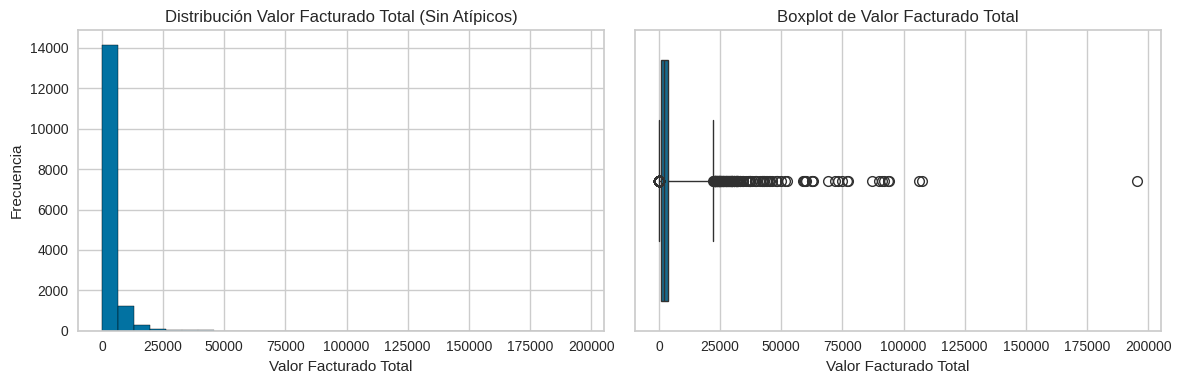

In [118]:
# Crear un lienzo con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Crear el histograma del nuevo DataFrame sin valores atípicos en el primer subgráfico
axes[0].hist(df_final['Valor facturado total'], bins=30, edgecolor='black')
axes[0].set_title('Distribución Valor Facturado Total (Sin Atípicos)')
axes[0].set_xlabel('Valor Facturado Total')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True)

# Crear el boxplot con límites personalizados en el segundo subgráfico
sns.boxplot(x='Valor facturado total', data=df_final, whis=[1, 99], orient='h', ax=axes[1])
axes[1].set_title('Boxplot de Valor Facturado Total')
axes[1].set_xlabel('Valor Facturado Total')

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Se observa colas a partir de los 25.000 USD, asi mismo un caso atípico de casi 200.000 usd


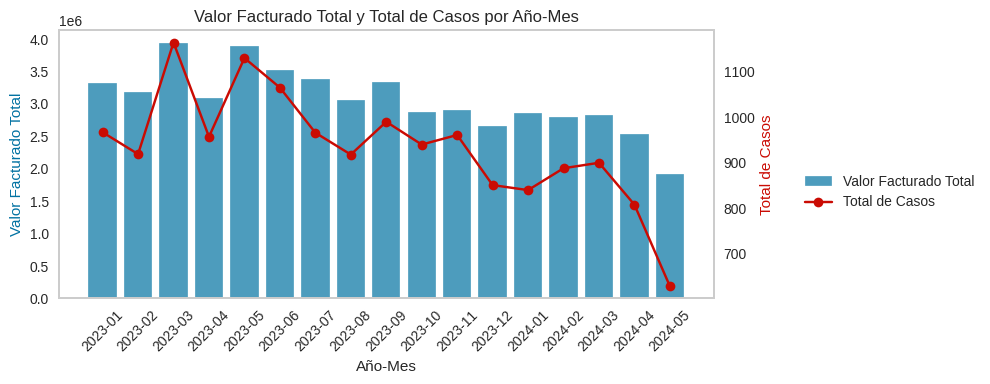

In [119]:
# Crear una nueva columna 'Año-Mes'
df_final['Año-Mes'] = df_final['Fecha Incurrencia'].dt.strftime('%Y-%m')

# Agrupar por año-mes y sumar los valores facturados
datos_agrupados_valor = df_final.groupby('Año-Mes')['Valor facturado total'].sum().reset_index()

# Agrupar por año-mes y contar los casos (filas)
datos_agrupados_casos = df_final.groupby('Año-Mes').size().reset_index(name='Total de Casos')

# Configurar el tamaño de la figura
fig, ax1 = plt.subplots(figsize=(8, 4))

# Crear el diagrama de barras para el Valor Facturado Total por Año-Mes
ax1.bar(datos_agrupados_valor['Año-Mes'], datos_agrupados_valor['Valor facturado total'], color='b', alpha=0.7, label='Valor Facturado Total')

# Crear el segundo eje y para la línea de tendencia de Total de Casos
ax2 = ax1.twinx()
ax2.plot(datos_agrupados_casos['Año-Mes'], datos_agrupados_casos['Total de Casos'], color='r', linestyle='-', marker='o', label='Total de Casos')

# Añadir títulos y etiquetas
ax1.set_title('Valor Facturado Total y Total de Casos por Año-Mes')
ax1.set_xlabel('Año-Mes')
ax1.set_ylabel('Valor Facturado Total', color='b')
ax2.set_ylabel('Total de Casos', color='r')

# Rotar etiquetas del eje x
ax1.tick_params(axis='x', rotation=45)

# Desactivar la cuadrícula interna
ax1.grid(False)
ax2.grid(False)

# Añadir leyendas en el recuadro a la derecha
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()




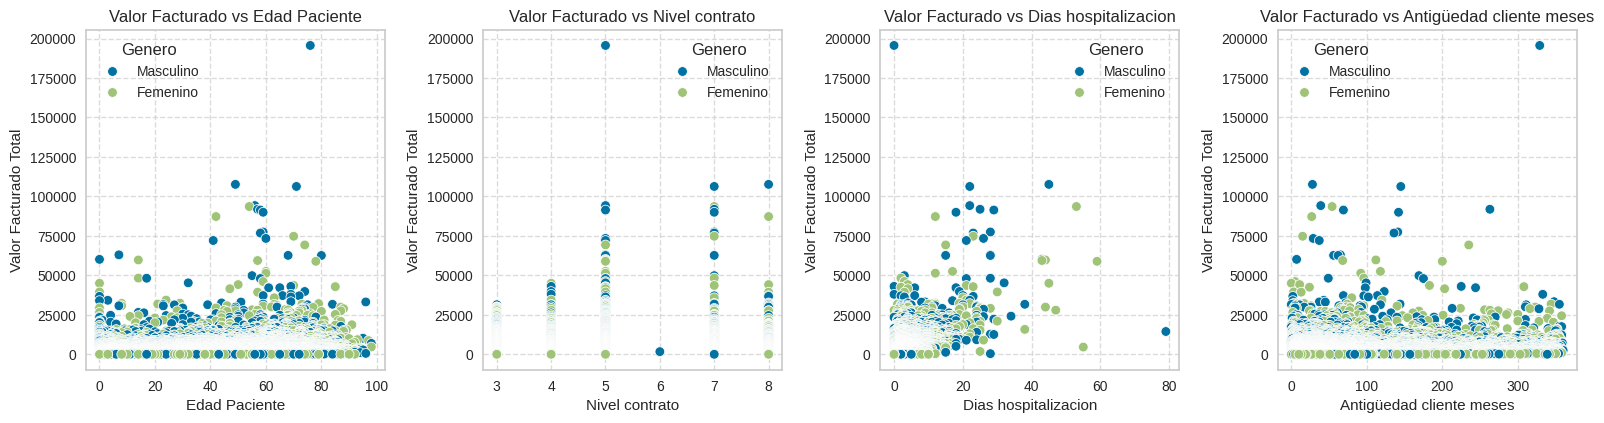

In [120]:
# Configurar el tamaño de la figura y la cuadrícula de subgráficos
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Lista de variables para comparar con 'Valor facturado total'
variables = [
    'Edad Paciente', 'Nivel contrato', 'Dias hospitalizacion',
    'Antigüedad cliente meses'
]

# Crear un gráfico para cada variable
for i, variable in enumerate(variables):
    sns.scatterplot(x=variable, y='Valor facturado total', hue='Genero', data=df_final, ax=axes[i])
    axes[i].set_title(f'Valor Facturado vs {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Valor Facturado Total')
    axes[i].legend(title='Genero')
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Eliminar los subgráficos restantes si hay más subgráficos de los necesarios
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()

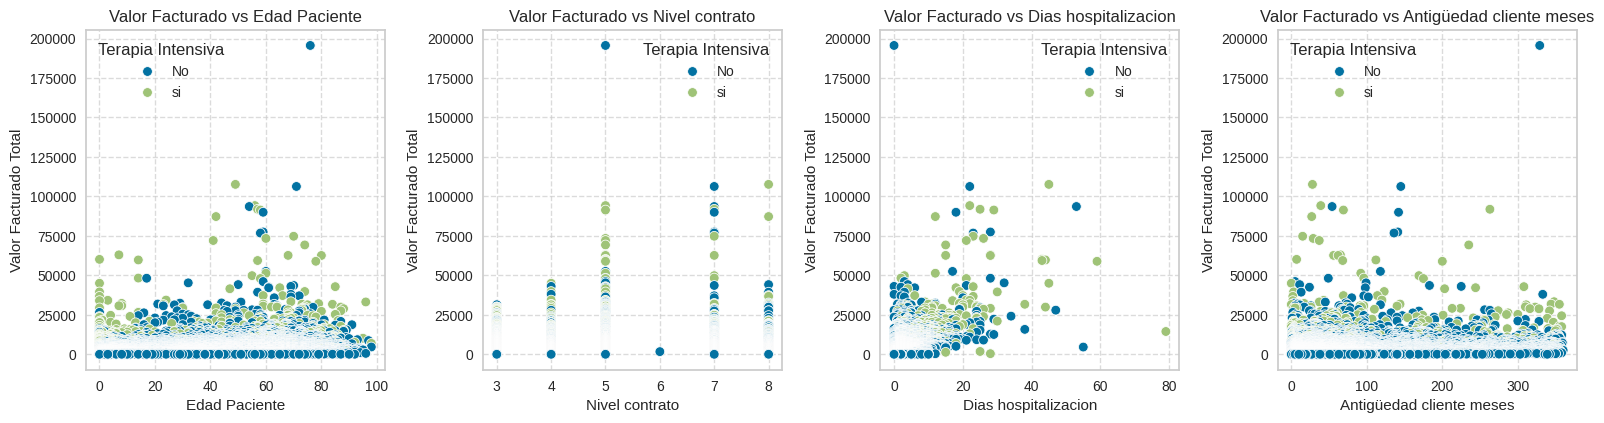

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura y la cuadrícula de subgráficos
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Lista de variables para comparar con 'Valor facturado total'
variables = [
    'Edad Paciente', 'Nivel contrato', 'Dias hospitalizacion',
    'Antigüedad cliente meses'
]

# Crear un gráfico para cada variable
for i, variable in enumerate(variables):
    sns.scatterplot(x=variable, y='Valor facturado total', hue='Terapia Intensiva', data=df_final, ax=axes[i])
    axes[i].set_title(f'Valor Facturado vs {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Valor Facturado Total')
    axes[i].legend(title='Terapia Intensiva')
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Eliminar los subgráficos restantes si hay más subgráficos de los necesarios
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [122]:
import pandas as pd

# Suponiendo que df_final es tu DataFrame con las variables categóricas
categorical_columns = df_final.select_dtypes(include=['object']).columns

# Crear una lista vacía para almacenar los resultados
classes_count_list = []

# Iterar sobre las columnas categóricas y contar los valores únicos
for col in categorical_columns:
    num_classes = df_final[col].nunique()
    if num_classes > 50:
        classes_count_list.append({'Variable Categórica': col, 'Cantidad de Clases': num_classes})

# Convertir la lista de diccionarios a un DataFrame
classes_count_df = pd.DataFrame(classes_count_list)

# Ordenar el DataFrame por 'Cantidad de Clases' de mayor a menor
classes_count_df = classes_count_df.sort_values(by='Cantidad de Clases', ascending=False)

# Mostrar la tabla resultante
print(classes_count_df)




          Variable Categórica  Cantidad de Clases
0                      IdCaso               15893
1             Codigo paciente               12564
3          Codigo Diagnostico                1813
6                    Dx Final                1807
5                 Dx Primario                 793
4          Codigo dx primario                 792
2  Codigo prestador principal                 649
7     Familia dx relacionados                 427
8  Agrupacion Dx relacionados                  78


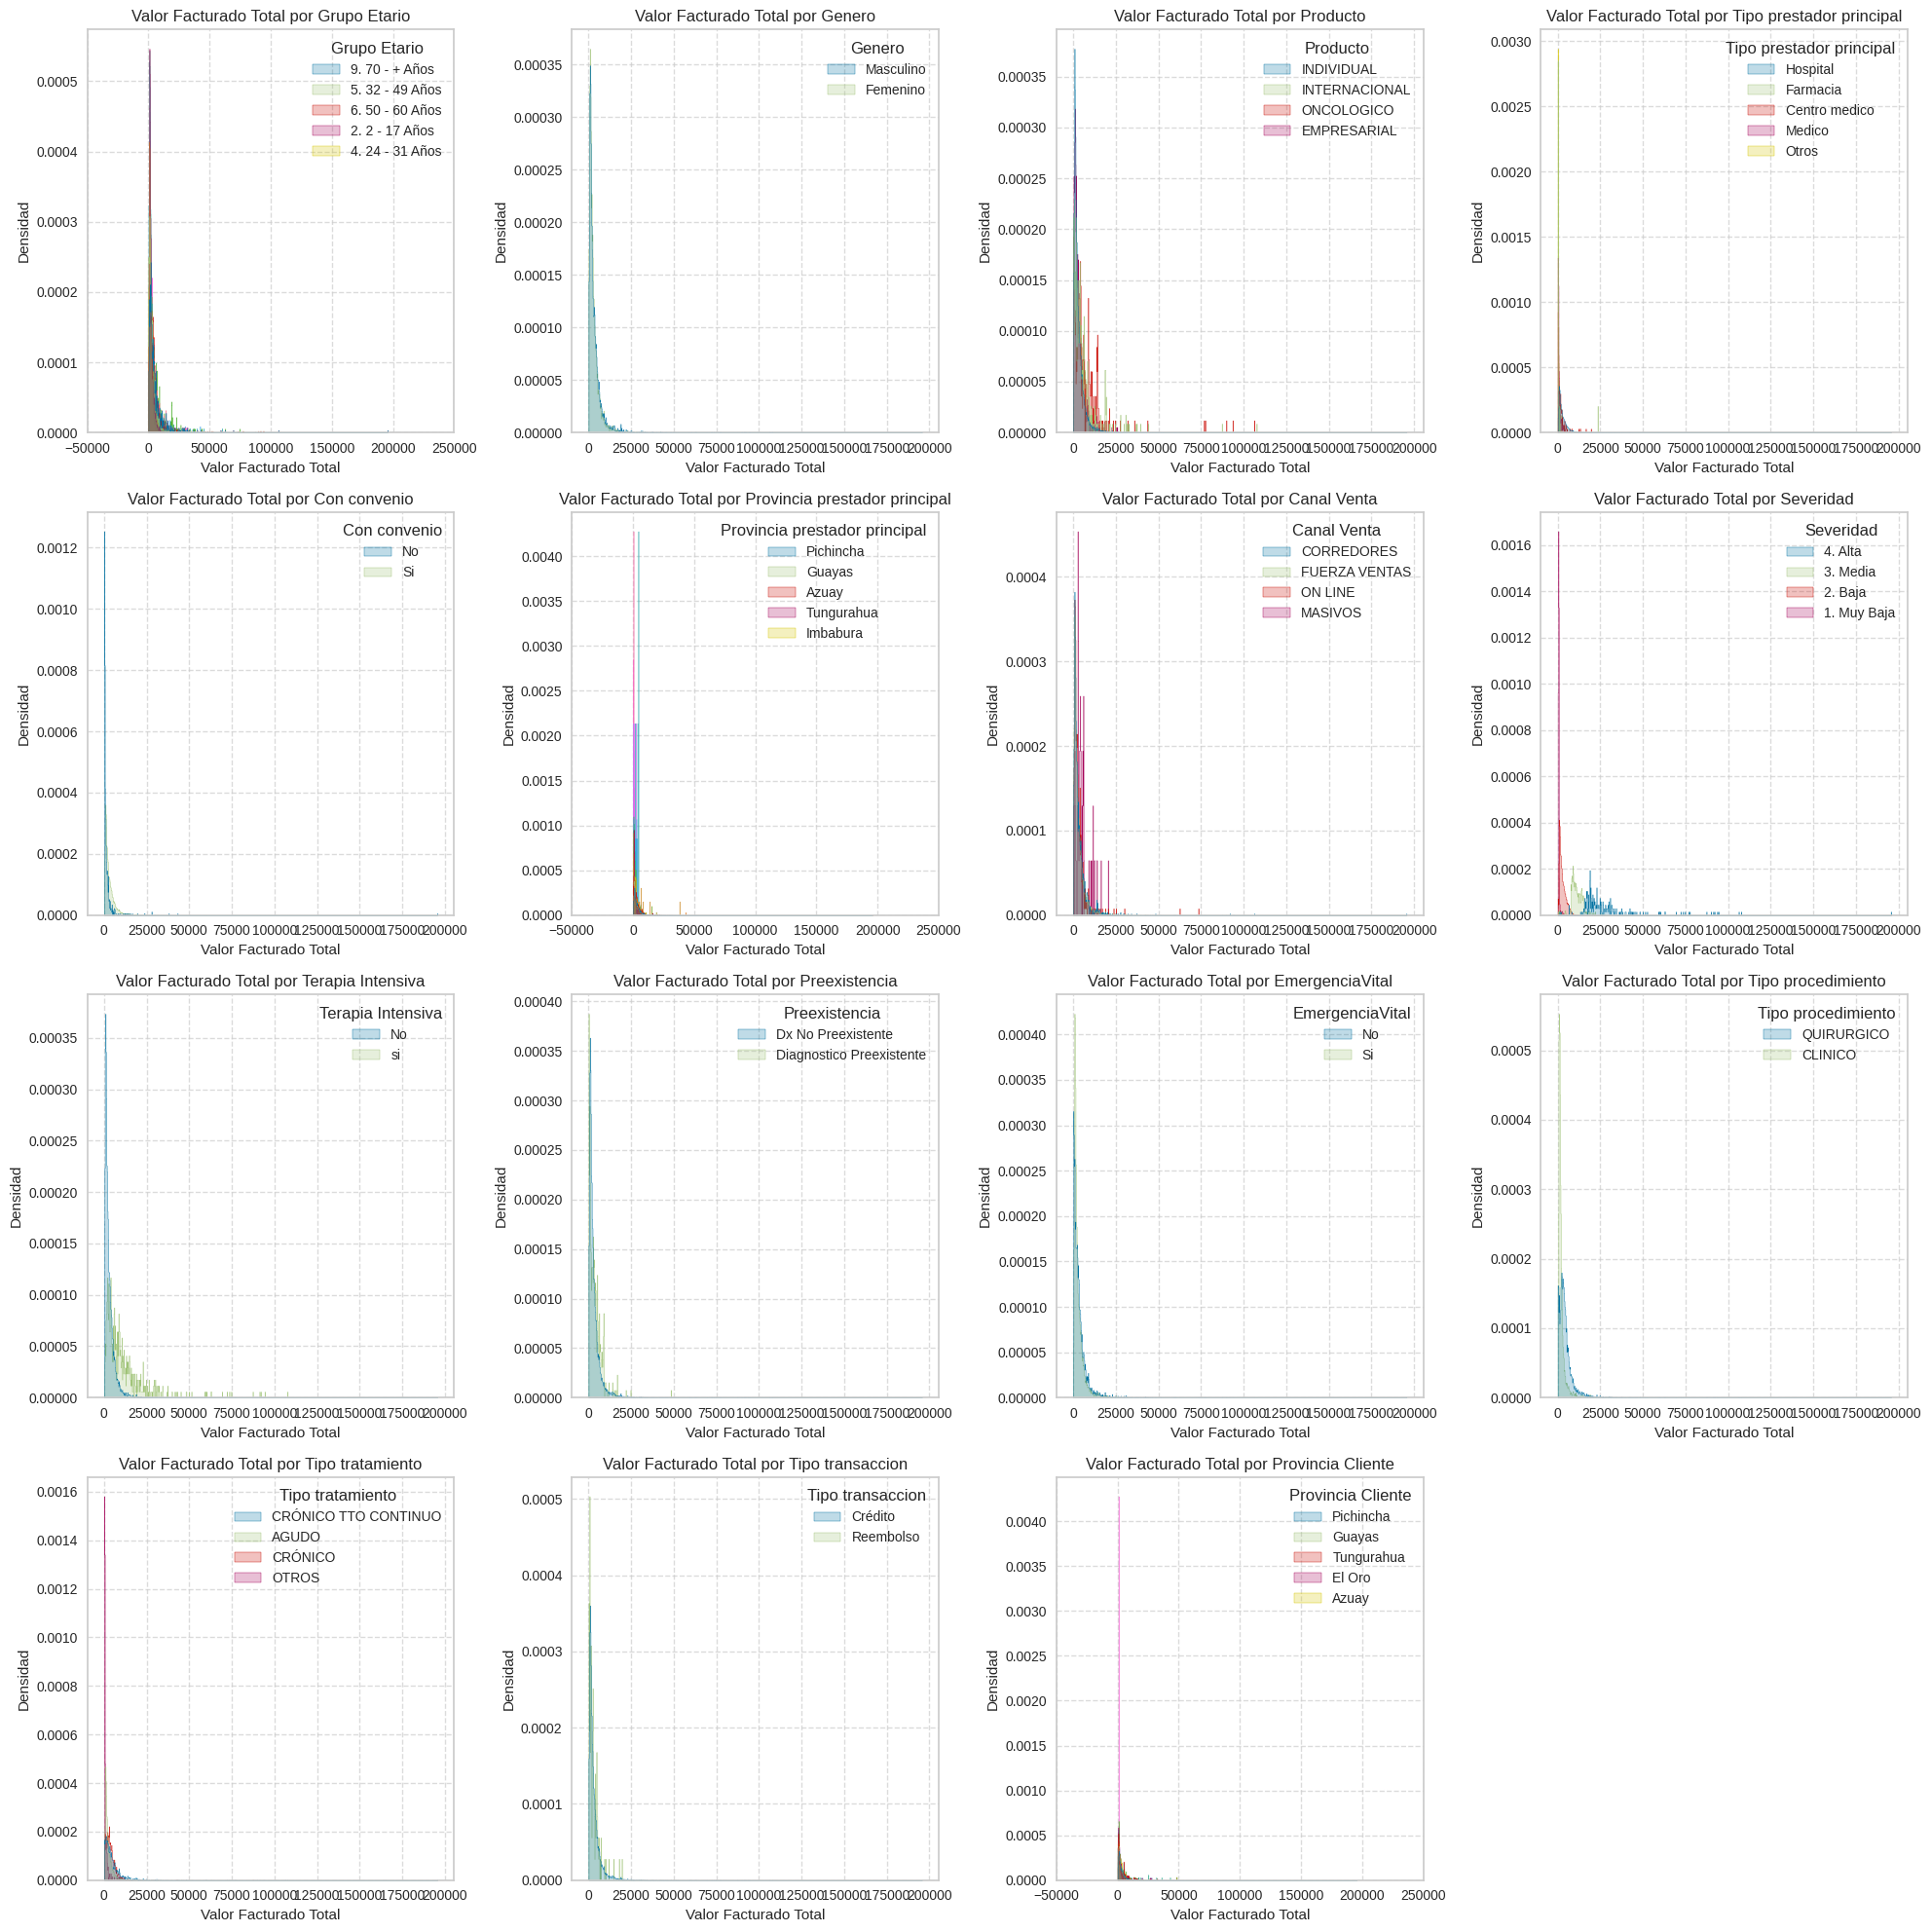

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables categóricas
categorical_vars = [
    'Grupo Etario', 'Genero', 'Producto', 'Tipo prestador principal',
    'Con convenio', 'Provincia prestador principal', 'Canal Venta',
    'Severidad', 'Terapia Intensiva', 'Preexistencia', 'EmergenciaVital',
    'Tipo procedimiento', 'Tipo tratamiento', 'Tipo transaccion', 'Provincia Cliente'
]

# Configurar el tamaño de la figura y la cuadrícula de subgráficos
num_vars = len(categorical_vars)
num_cols = 4  # Número de columnas por fila
num_rows = (num_vars + num_cols - 1) // num_cols  # Calcular el número de filas necesario

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Crear un histograma para cada variable categórica
for i, var in enumerate(categorical_vars):
    ax = axes[i]

    # Crear el histograma
    sns.histplot(data=df_final, x='Valor facturado total', hue=var, element='step', stat='density', common_norm=False, ax=ax)

    # Configurar el título y las etiquetas
    ax.set_title(f'Valor Facturado Total por {var}')
    ax.set_xlabel('Valor Facturado Total')
    ax.set_ylabel('Densidad')
    ax.grid(True, linestyle='--', alpha=0.7)

    # Ajustar las etiquetas del eje x para mostrar solo las 5 primeras clases
    if len(df_final[var].unique()) > 5:
        # Obtener las 5 primeras clases
        top_classes = df_final[var].value_counts().index[:5]

        # Filtrar los datos para mostrar solo las 5 primeras clases
        filtered_data = df_final[df_final[var].isin(top_classes)]

        # Re-crear el histograma con los datos filtrados
        sns.histplot(data=filtered_data, x='Valor facturado total', hue=var, element='step', stat='density', common_norm=False, ax=ax)

        # Ajustar las etiquetas del eje x para que sean más legibles
        ax.set_xticks(ax.get_xticks()[::len(ax.get_xticks()) // 5])  # Mostrar solo algunas etiquetas para evitar el solapamiento

# Eliminar los subgráficos restantes si hay más subgráficos de los necesarios
for j in range(num_vars, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()



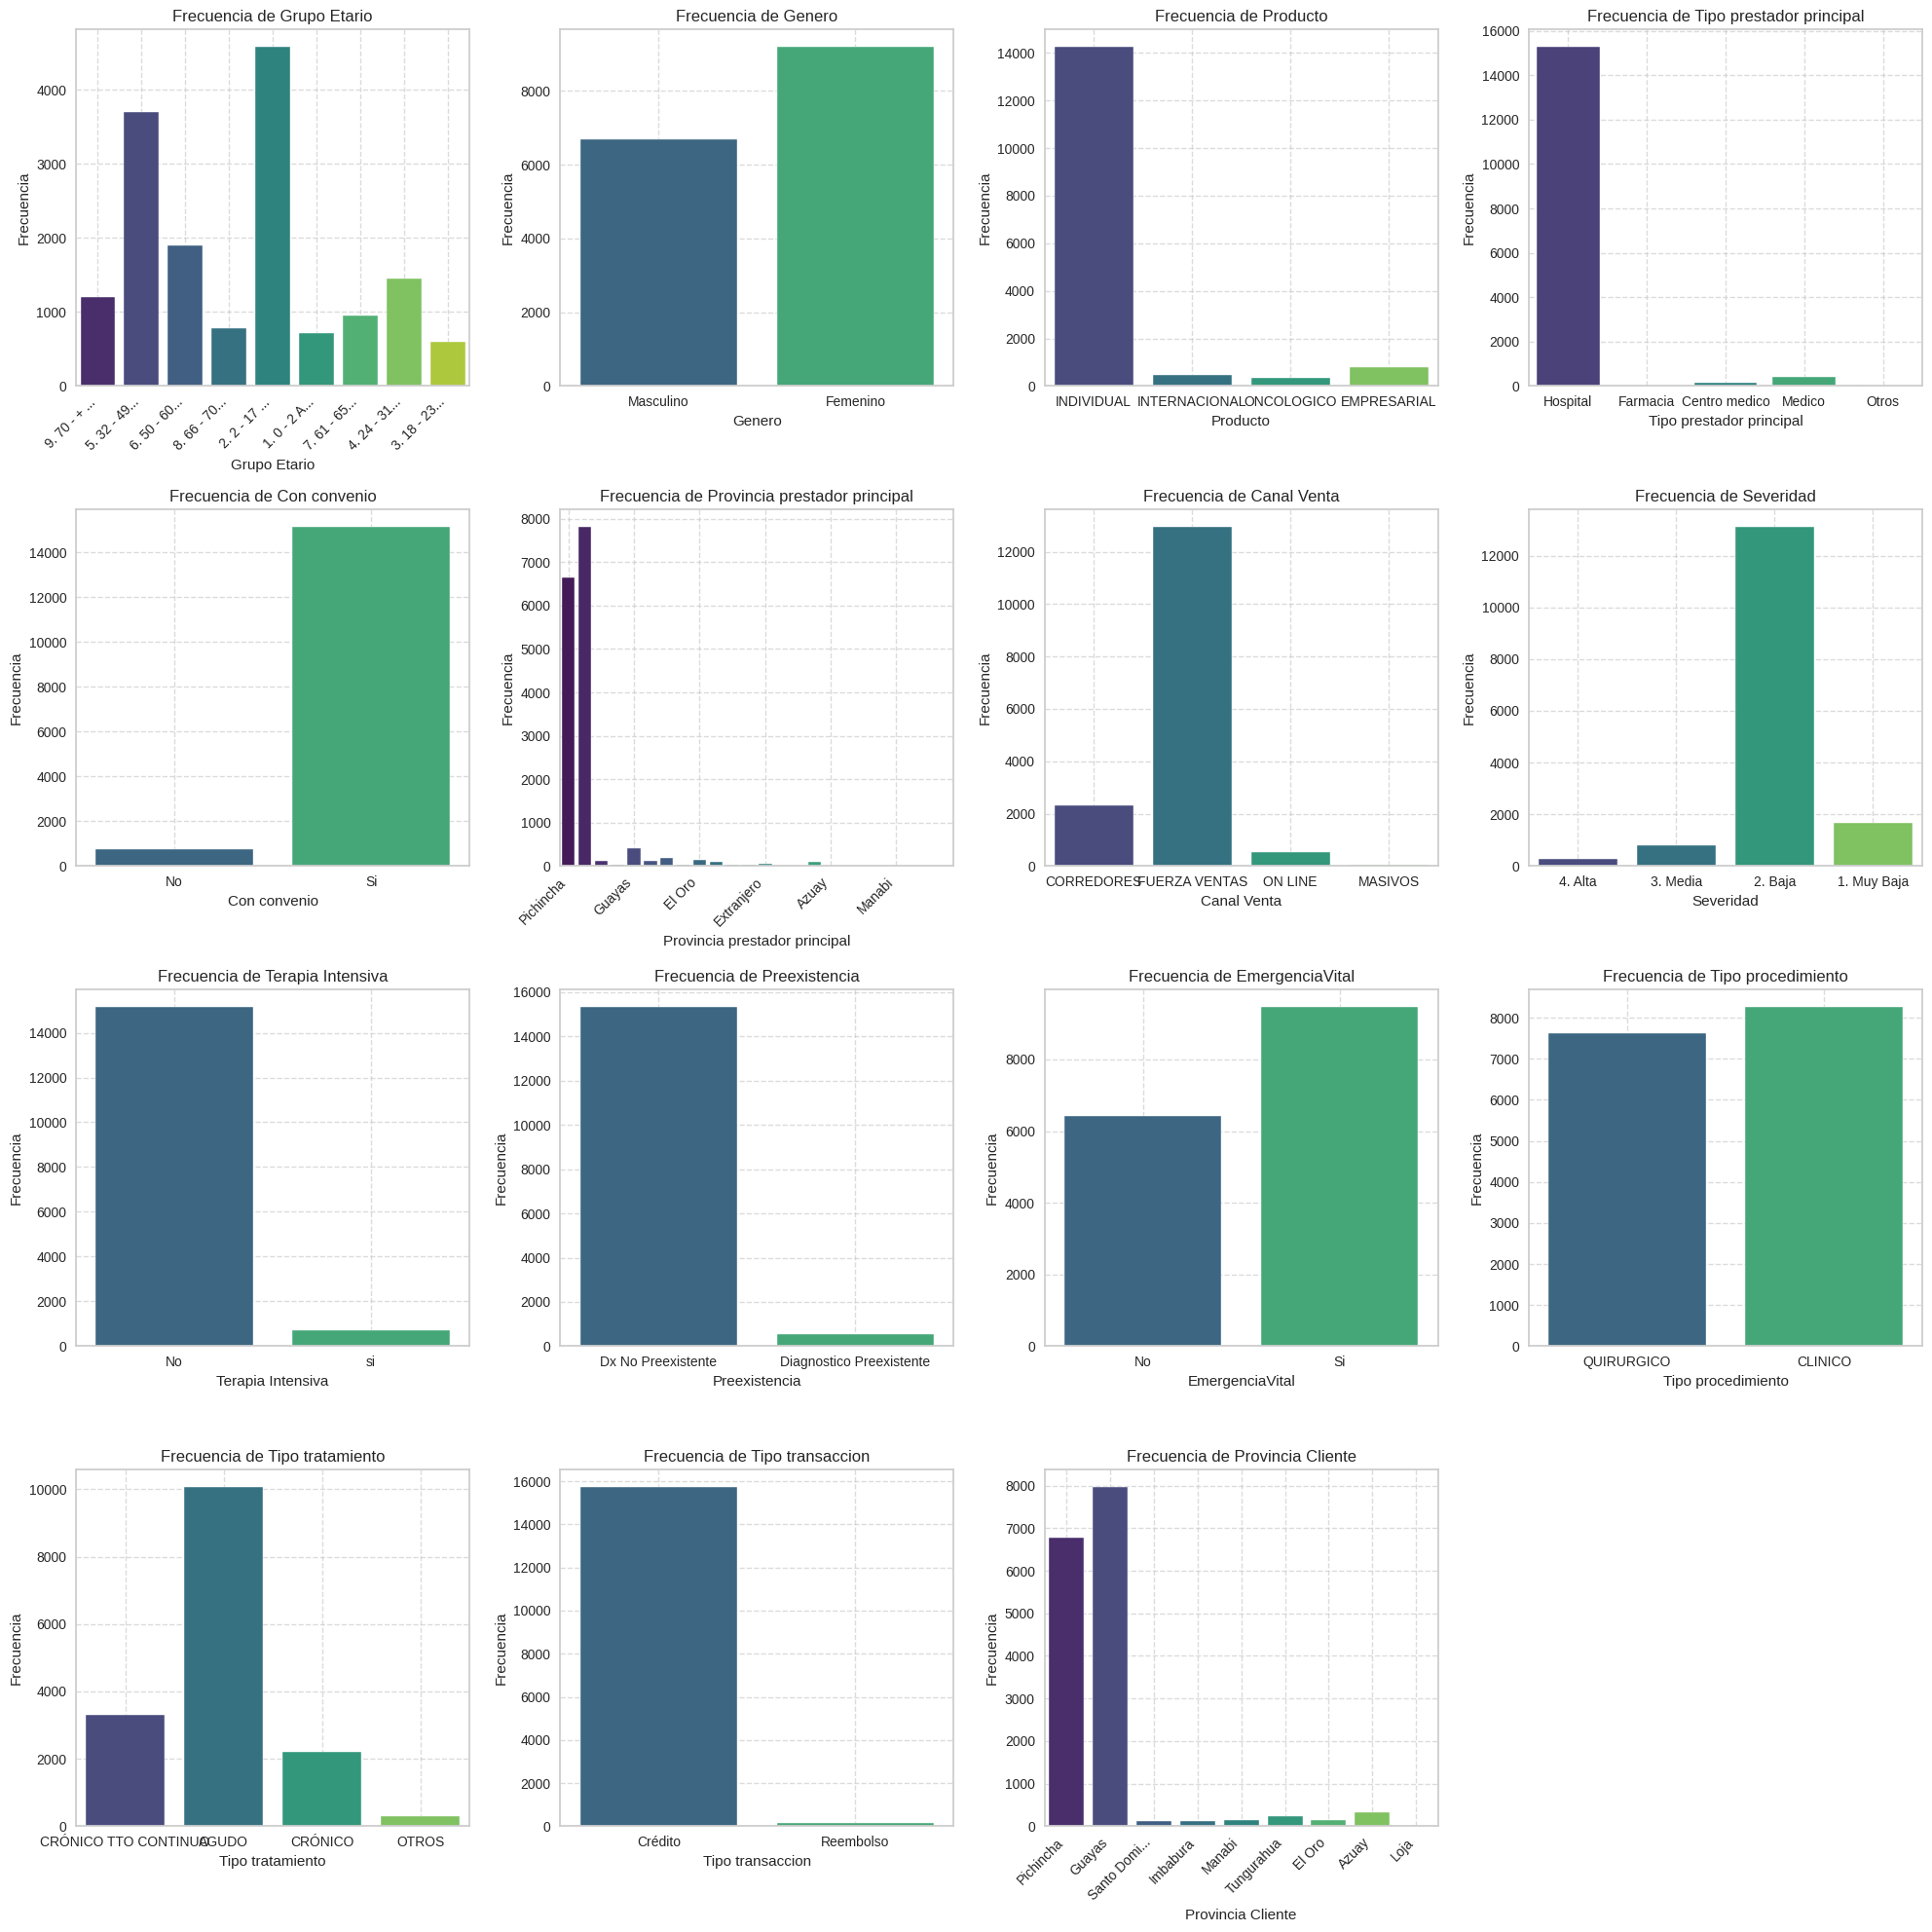

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para truncar etiquetas largas
def truncate_labels(labels, max_len=10):
    return [label if len(label) <= max_len else f"{label[:max_len]}..." for label in labels]

# Lista de variables categóricas
categorical_vars = [
    'Grupo Etario', 'Genero', 'Producto', 'Tipo prestador principal',
    'Con convenio', 'Provincia prestador principal', 'Canal Venta',
    'Severidad', 'Terapia Intensiva', 'Preexistencia', 'EmergenciaVital',
    'Tipo procedimiento', 'Tipo tratamiento', 'Tipo transaccion', 'Provincia Cliente'
]

# Configurar el tamaño de la figura y la cuadrícula de subgráficos
num_vars = len(categorical_vars)
num_cols = 4  # Número de columnas por fila
num_rows = (num_vars + num_cols - 1) // num_cols  # Calcular el número de filas necesario

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Crear un diagrama de barras para cada variable categórica
for i, var in enumerate(categorical_vars):
    ax = axes[i]

    # Crear el diagrama de barras sin hue
    sns.countplot(data=df_final, x=var, ax=ax, palette='viridis')

    # Configurar el título y las etiquetas
    ax.set_title(f'Frecuencia de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid(True, linestyle='--', alpha=0.7)

    # Ajustar las etiquetas del eje x para que no se sobrepongan
    if len(df_final[var].unique()) > 5:
        labels = [label.get_text() for label in ax.get_xticklabels()]
        truncated_labels = truncate_labels(labels, max_len=10)  # Ajustar max_len según sea necesario
        ax.set_xticklabels(truncated_labels, rotation=45, ha='right')
        ax.set_xticks(ax.get_xticks()[::len(ax.get_xticks()) // 5])  # Mostrar solo algunas etiquetas para evitar el solapamiento

# Eliminar los subgráficos restantes si hay más subgráficos de los necesarios
for j in range(num_vars, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()




**TRATAMIENTO DE OUTLIERS**

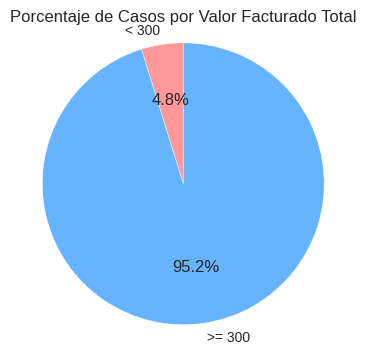

In [125]:
import matplotlib.pyplot as plt

# Contar los casos con valor facturado total < 300 y >= 300
menos_300 = df_final[df_final['Valor facturado total'] < 300].shape[0]
mas_300 = df_final[df_final['Valor facturado total'] >= 300].shape[0]

# Crear una lista con las cuentas
counts = [menos_300, mas_300]

# Etiquetas para el gráfico de tarta
labels = ['< 300', '>= 300']

# Colores para cada sección del gráfico
colors = ['#ff9999','#66b3ff']

# Crear el gráfico de tarta
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Casos por Valor Facturado Total')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()


De nuestra experiencia decidimos eliminar aquellos casos con valores menos a USD 300,00 porque se podrían considerar como reclamos ambulatorios que no requerían una hospitalización.

In [126]:
# Crear un nuevo DataFrame excluyendo los registros con Valor facturado total < 300
df_final_filtered = df_final[df_final['Valor facturado total'] >= 300]
df_final_filtered.describe(include='number')



Antigüedad cliente meses  Edad Paciente  Dias hospitalizacion  \
count              15131.000000   15131.000000          15131.000000   
mean                  65.882295      34.409358              2.803450   
std                   79.294333      24.557052              3.006552   
min                    0.000000       0.000000              0.000000   
25%                   13.000000       9.000000              1.000000   
50%                   37.000000      34.000000              2.000000   
75%                   78.000000      56.000000              3.000000   
max                  360.000000      98.000000             79.000000   

       Nivel contrato  HONORARIOS MEDICOS  INSUMOS Y SUMINISTROS  \
count    15131.000000        15131.000000           15131.000000   
mean         4.230454          964.841281             385.472236   
std          1.393626         1453.838433            1433.210699   
min          3.000000            0.000000               0.000000   
25%          3.000000          200.000000               0.605000   
50%          4.000000          482.220000              72.000000   
75%          5.000000         1280.000000             302.600000   
max          8.000000        53193.530000           65617.220000   

       LABORATORIOS     MEDICINAS         OTROS      PROTESIS  \
count  15131.000000  15131.000000  15131.000000  15131.000000   
mean     316.542544    614.612156     37.641065    160.770116   
std      561.184445   1731.467285    266.999570    922.982117   
min        0.000000      0.000000      0.000000      0.000000   
25%       54.240000     77.015000      0.000000      0.000000   
50%      161.600000    245.260000      0.000000      0.000000   
75%      362.300000    593.835000      0.000000      0.000000   
max    16805.380000  72701.160000  22200.730000  28746.530000   

       SERVICIOS HOSPITALARIOS  TERAPIA INTENSIVA  Valor facturado total  \
count             15131.000000       15131.000000           15131.000000   
mean                898.635162          59.387529            3437.902088   
std                1672.679679         467.866526            5223.626580   
min                   0.000000           0.000000             300.000000   
25%                 299.635000           0.000000            1047.480000   
50%                 531.420000           0.000000            2055.370000   
75%                1007.355000           0.000000            4023.070000   
max               76806.470000       18450.000000          195617.220000   

       Valor cubierto total  Valor pagado total  
count          15131.000000        15131.000000  
mean            3210.304116         3017.363898  
std             4758.603479         4580.672930  
min                0.000000            0.000000  
25%              979.690000          898.285000  
50%             1920.760000         1791.550000  
75%             3752.220000         3537.400000  
max           107617.270000       107617.270000

**Revisamos los outliers por valor facturado**

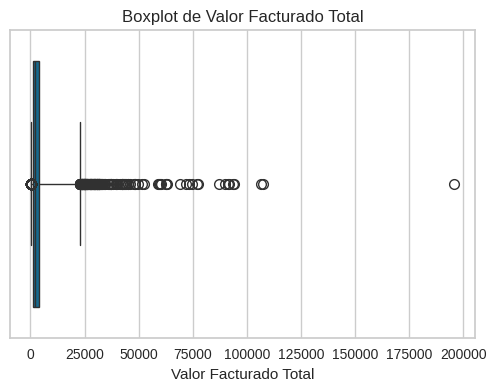

In [127]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(6, 4))

# Crear el boxplot con límites personalizados
sns.boxplot(x='Valor facturado total', data=df_final_filtered, whis=[1, 99], orient='h')

# Configurar título y etiquetas
plt.title('Boxplot de Valor Facturado Total')
plt.xlabel('Valor Facturado Total')

# Mostrar el gráfico
plt.show()


In [128]:
import pandas as pd

# Calcular los percentiles
Q1 = df_final_filtered['Valor facturado total'].quantile(0.25)
Q2 = df_final_filtered['Valor facturado total'].quantile(0.50)
Q3 = df_final_filtered['Valor facturado total'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Determinar los límites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 2 * IQR

print(f"Percentil 25% (Q1): {Q1}")
print(f"Percentil 50% (Q2): {Q2}")
print(f"Percentil 75% (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")



Percentil 25% (Q1): 1047.48
Percentil 50% (Q2): 2055.37
Percentil 75% (Q3): 4023.0699999999997
IQR: 2975.5899999999997
Límite inferior: -3415.9049999999993
Límite superior: 9974.25


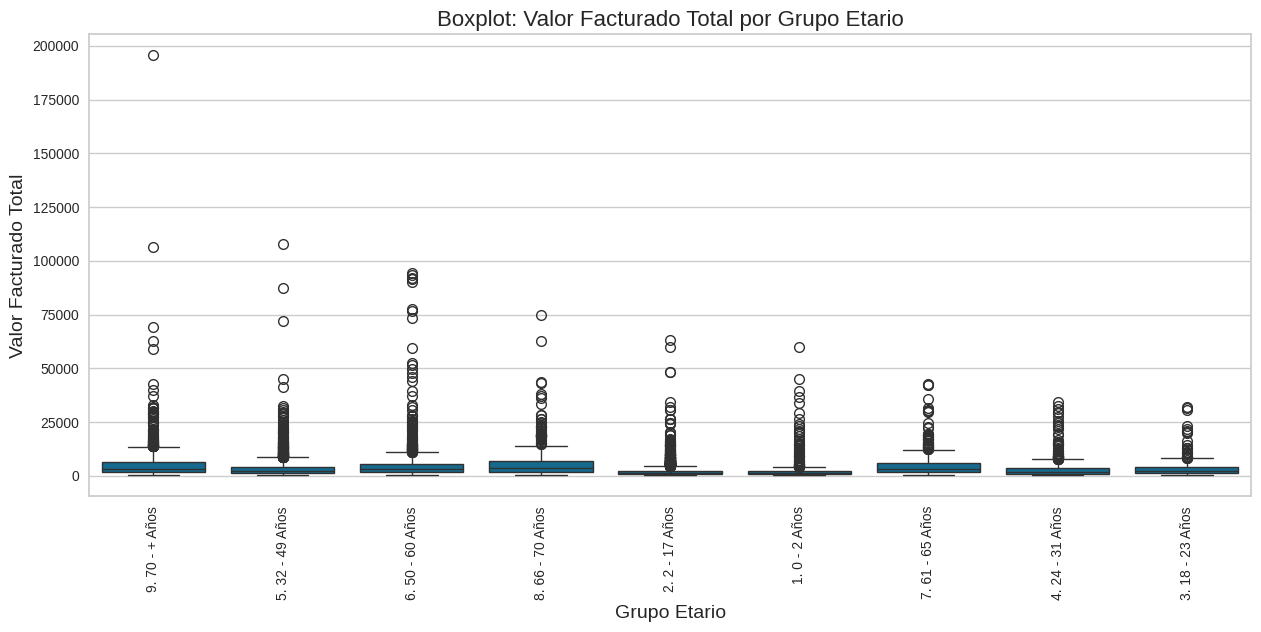

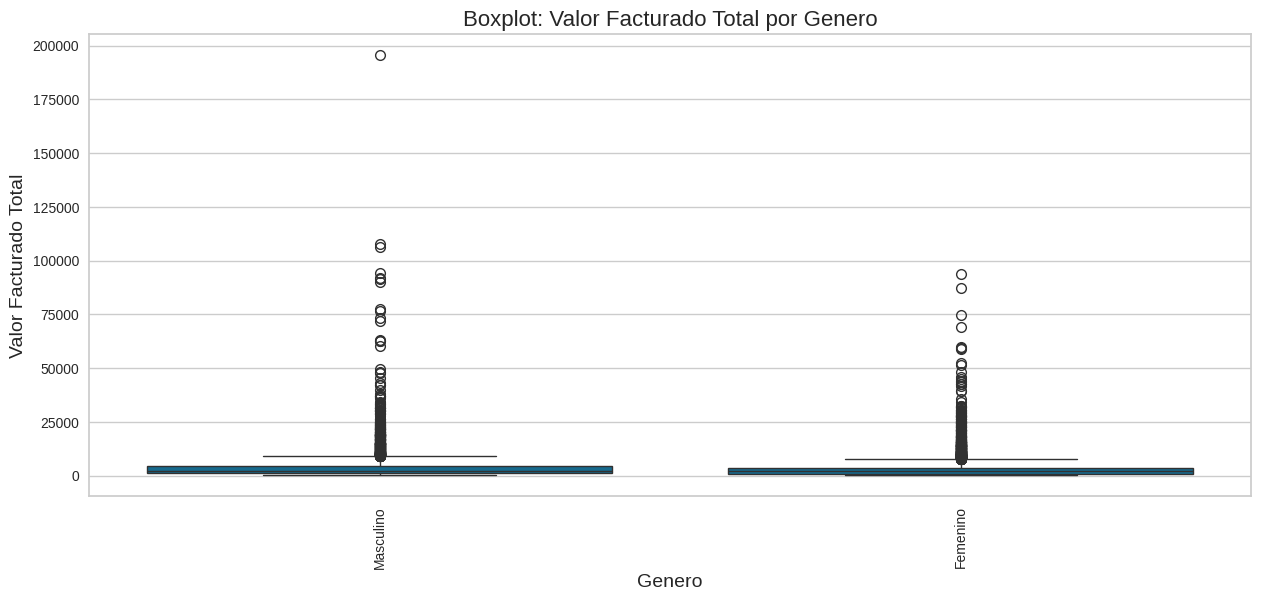

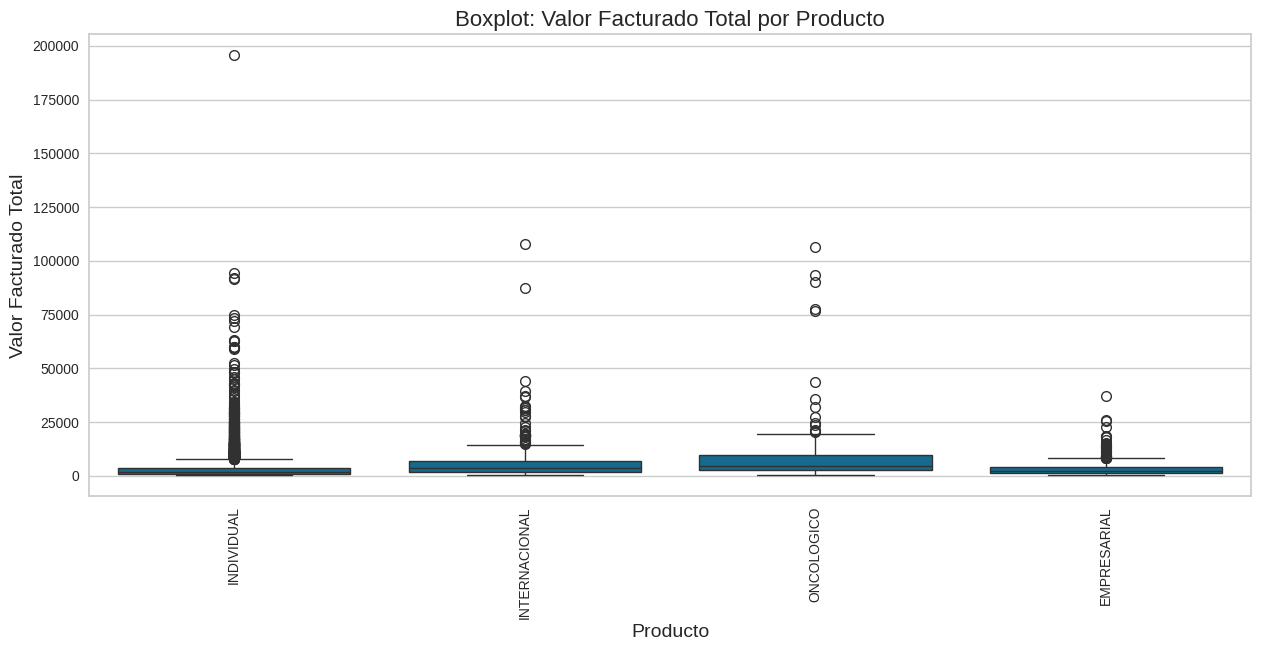

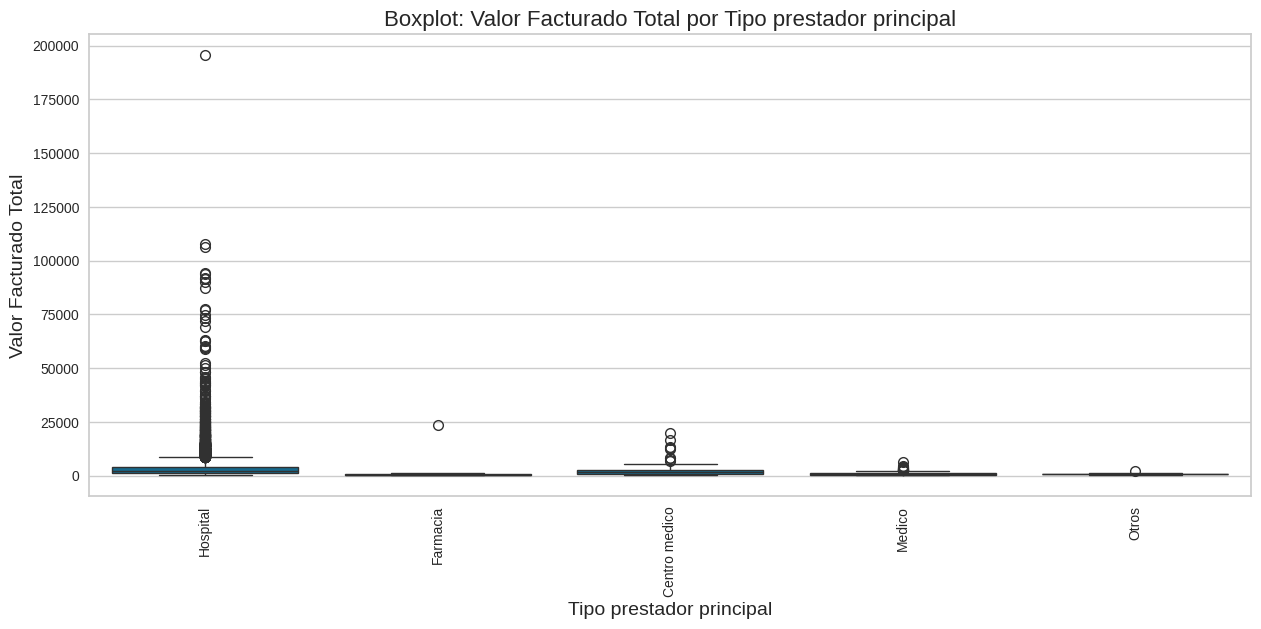

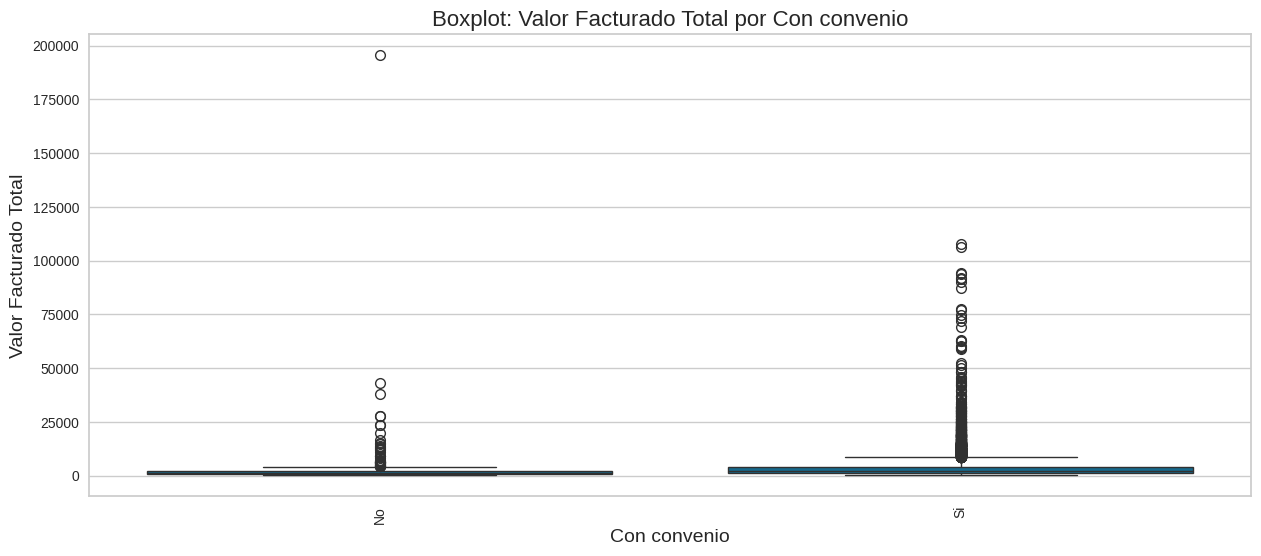

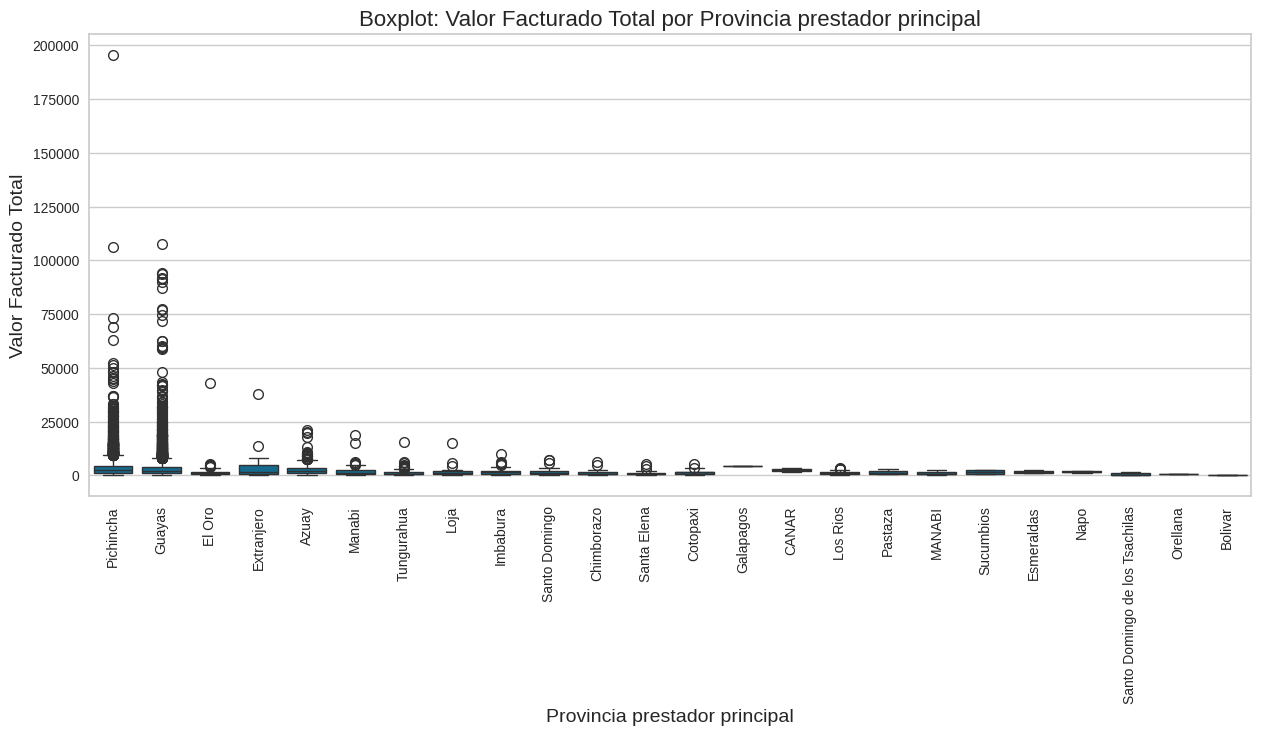

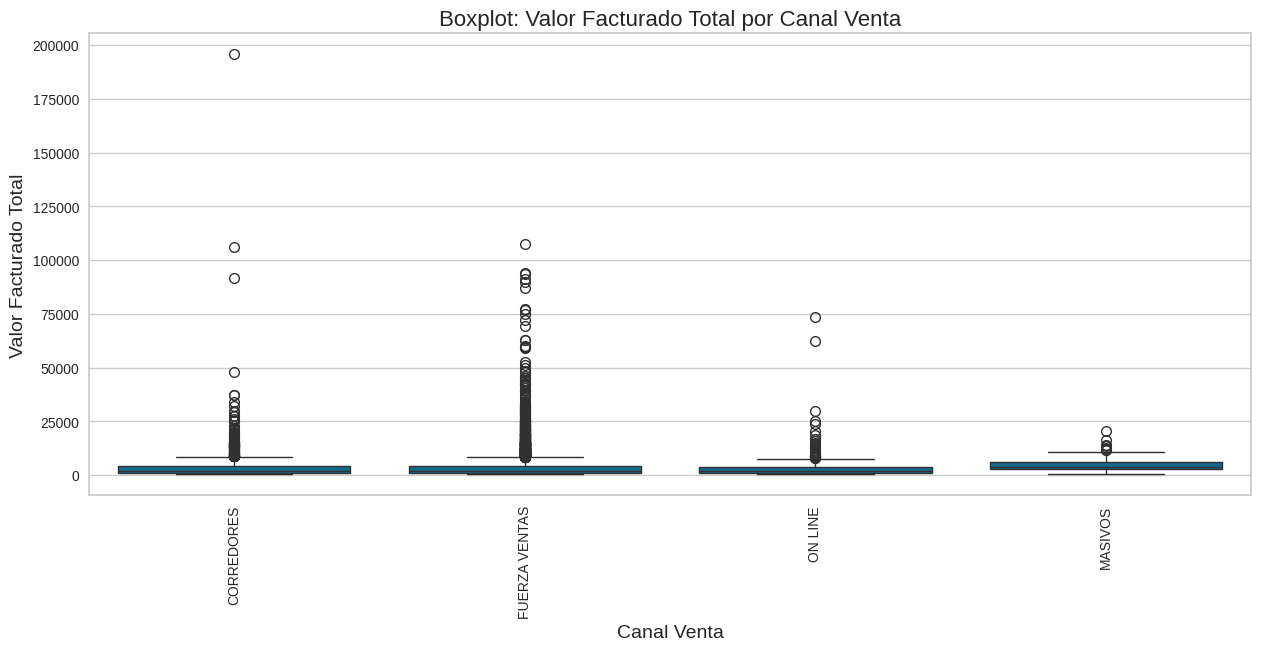

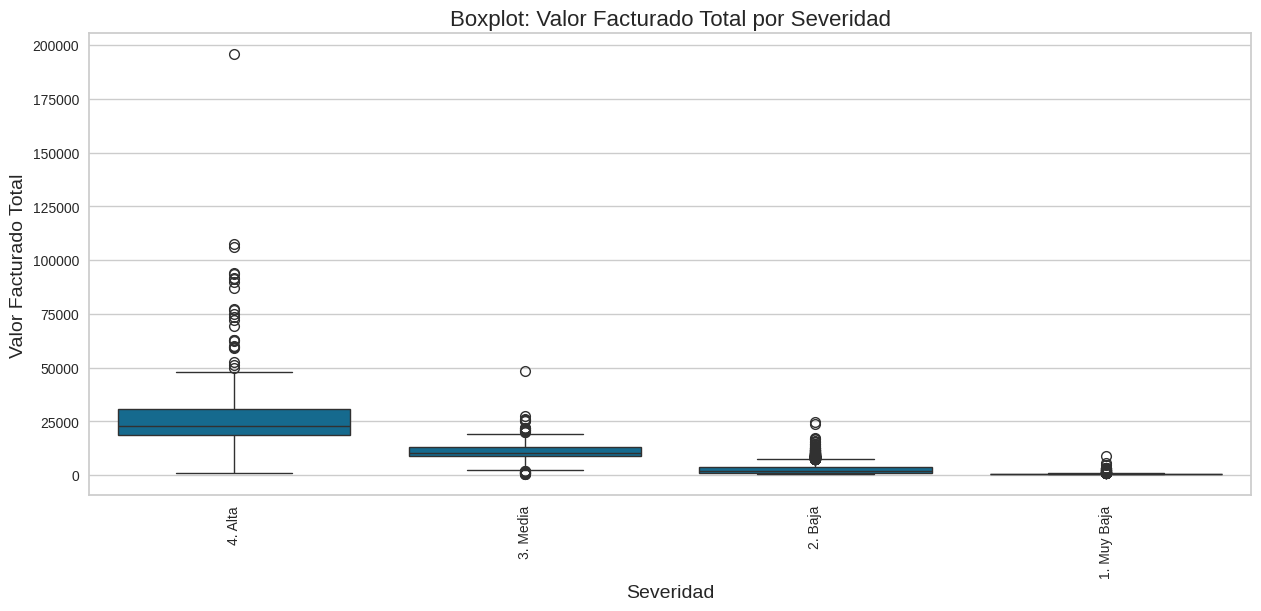

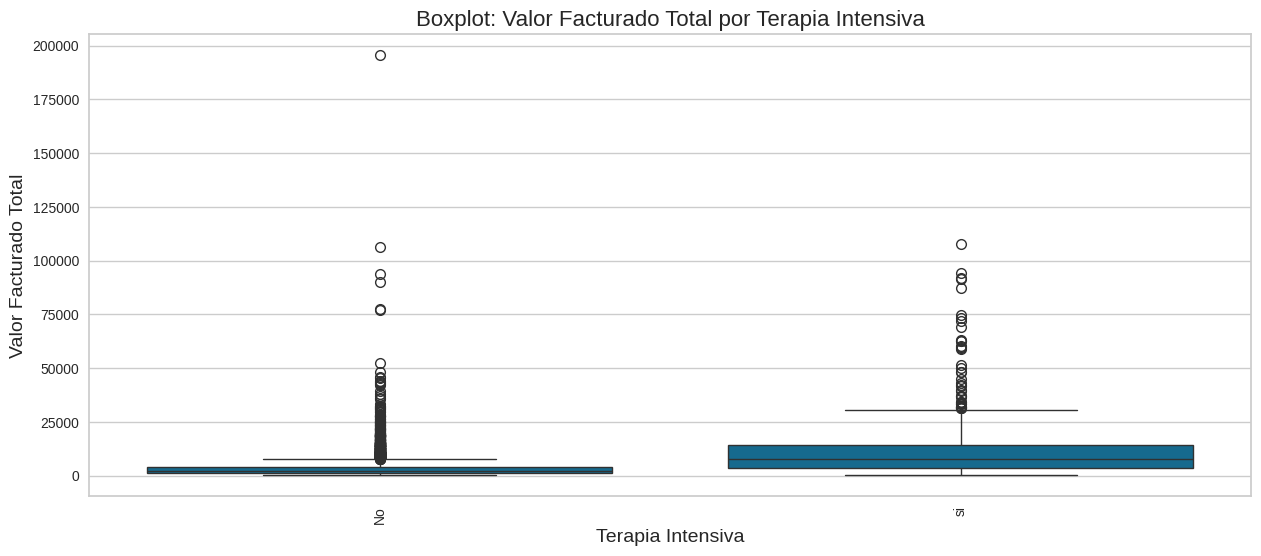

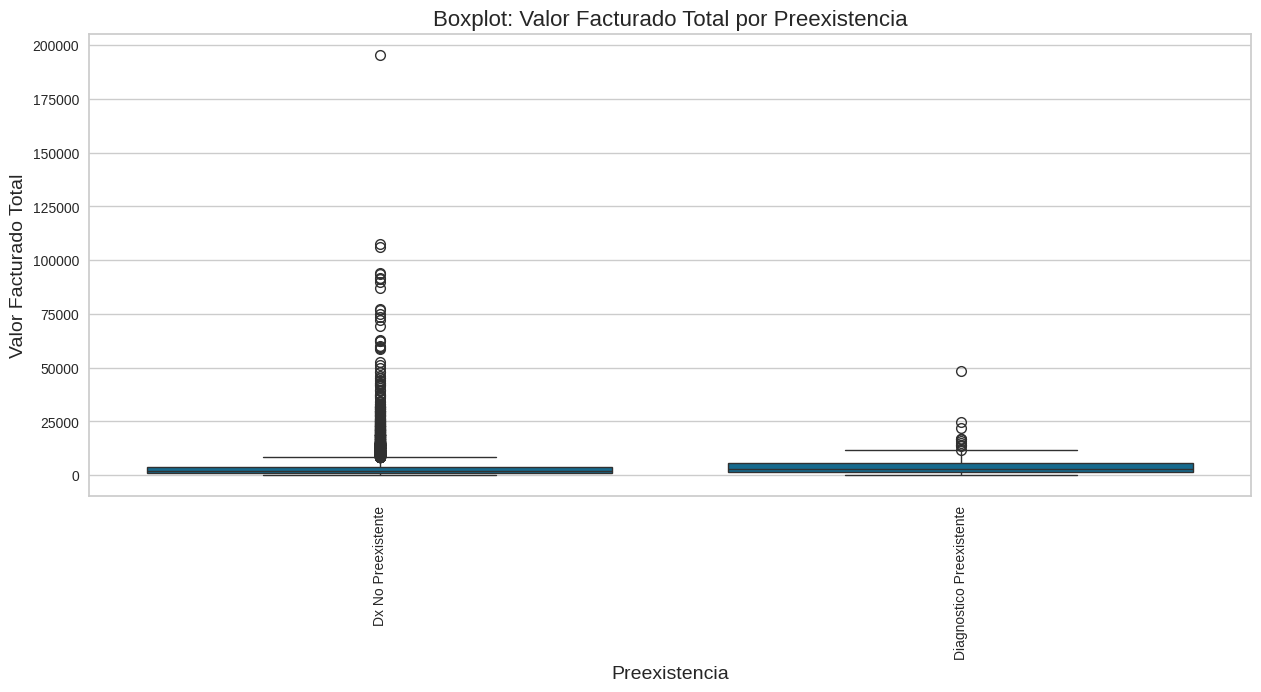

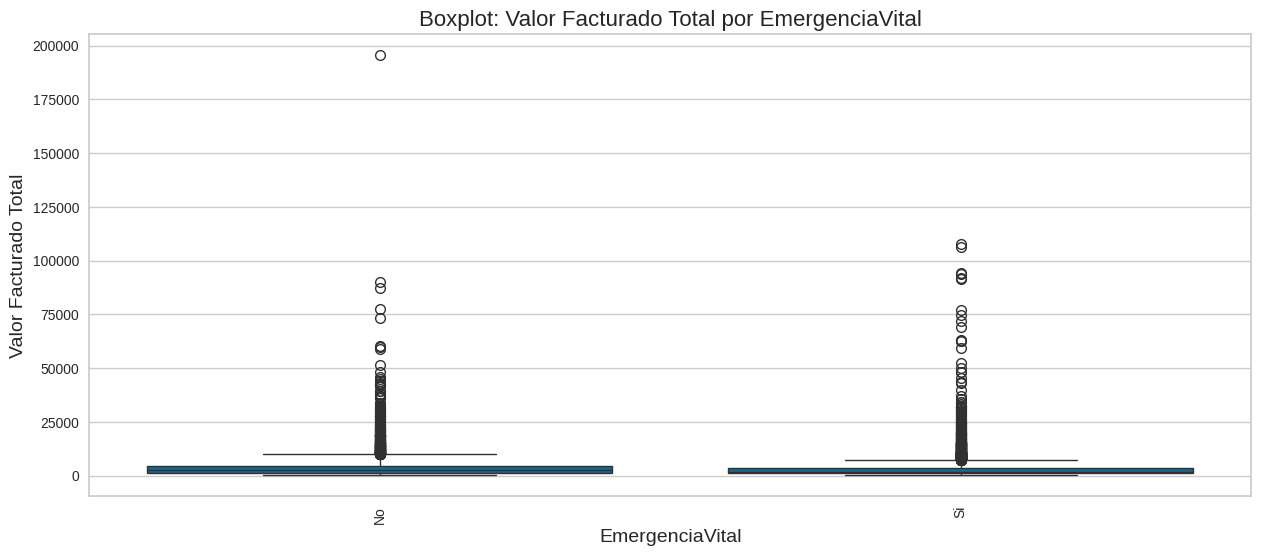

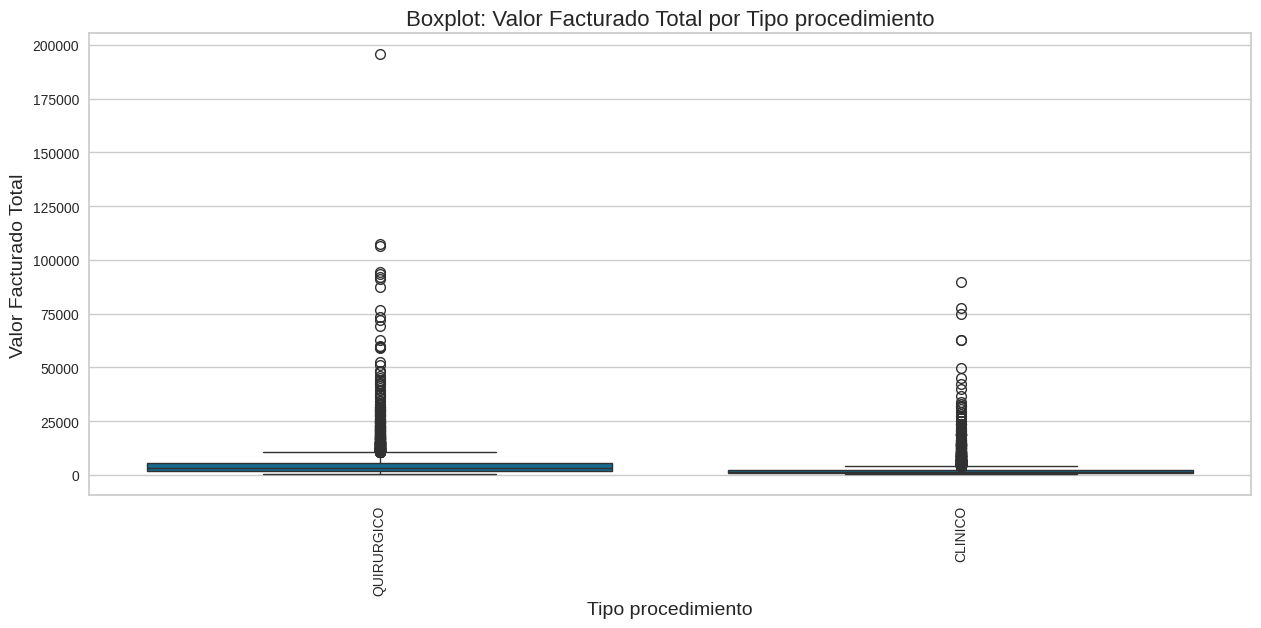

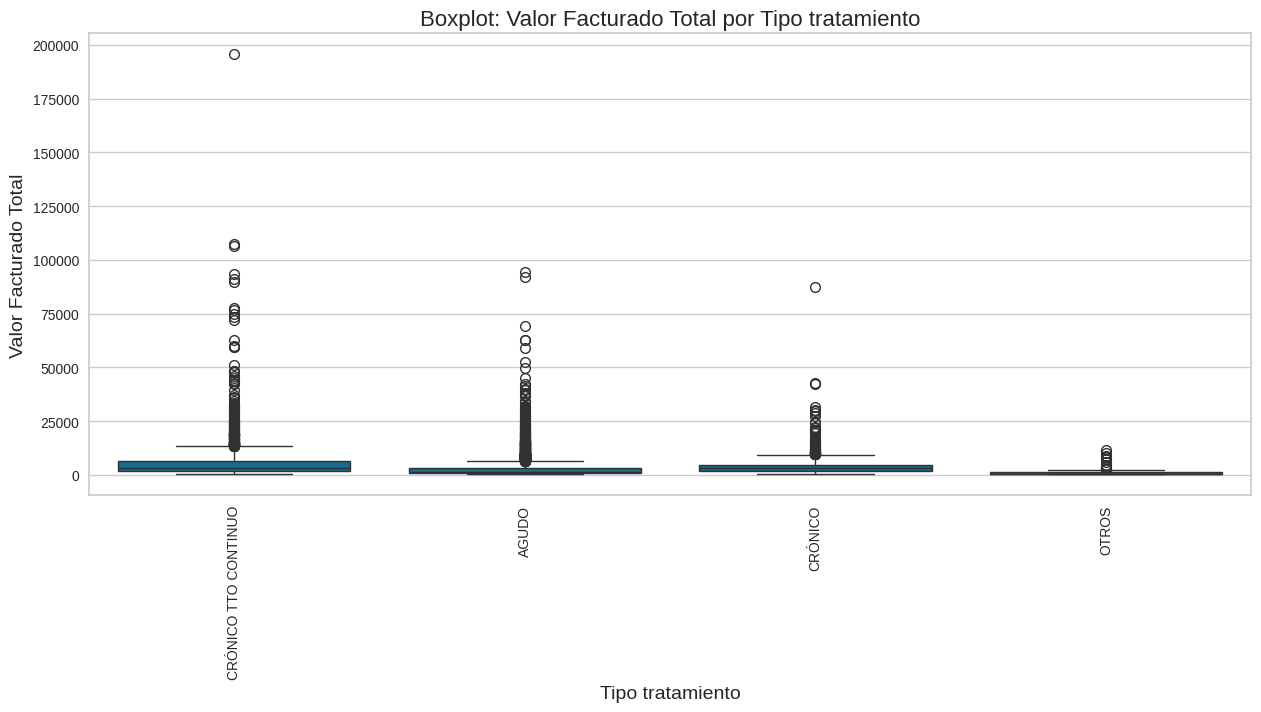

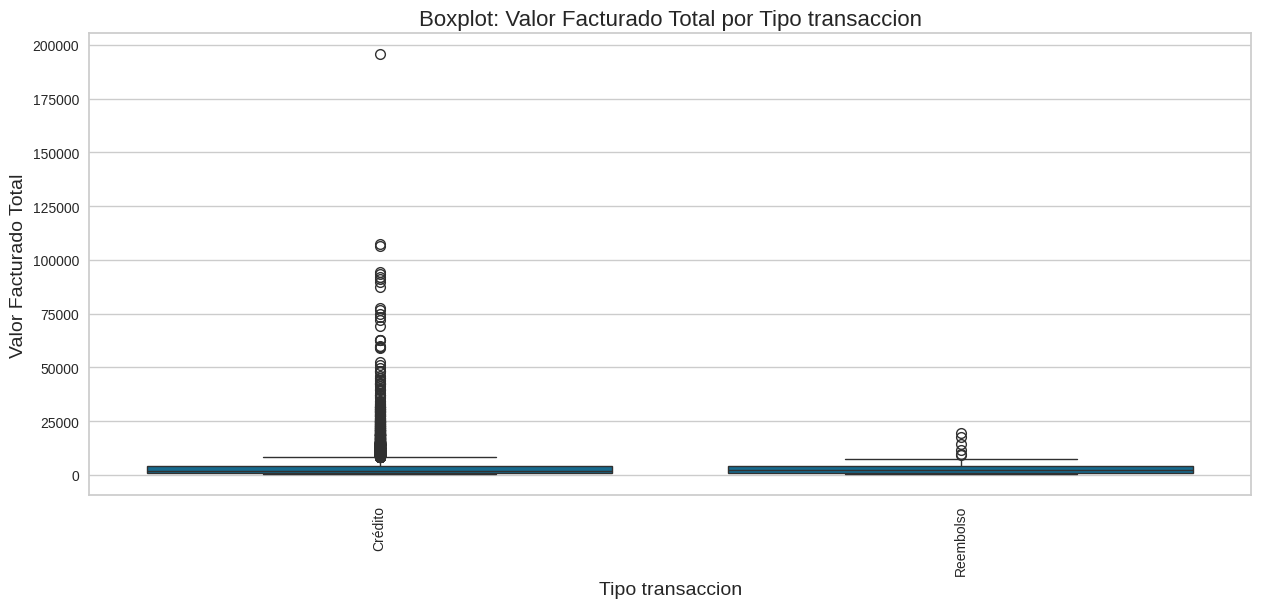

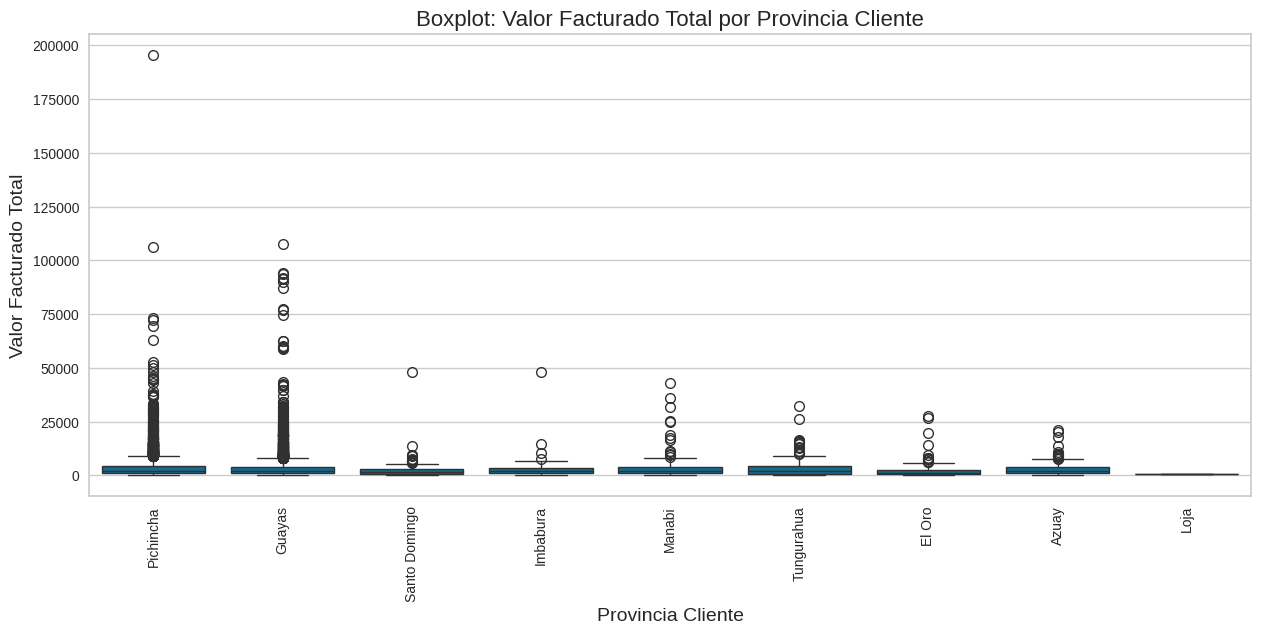

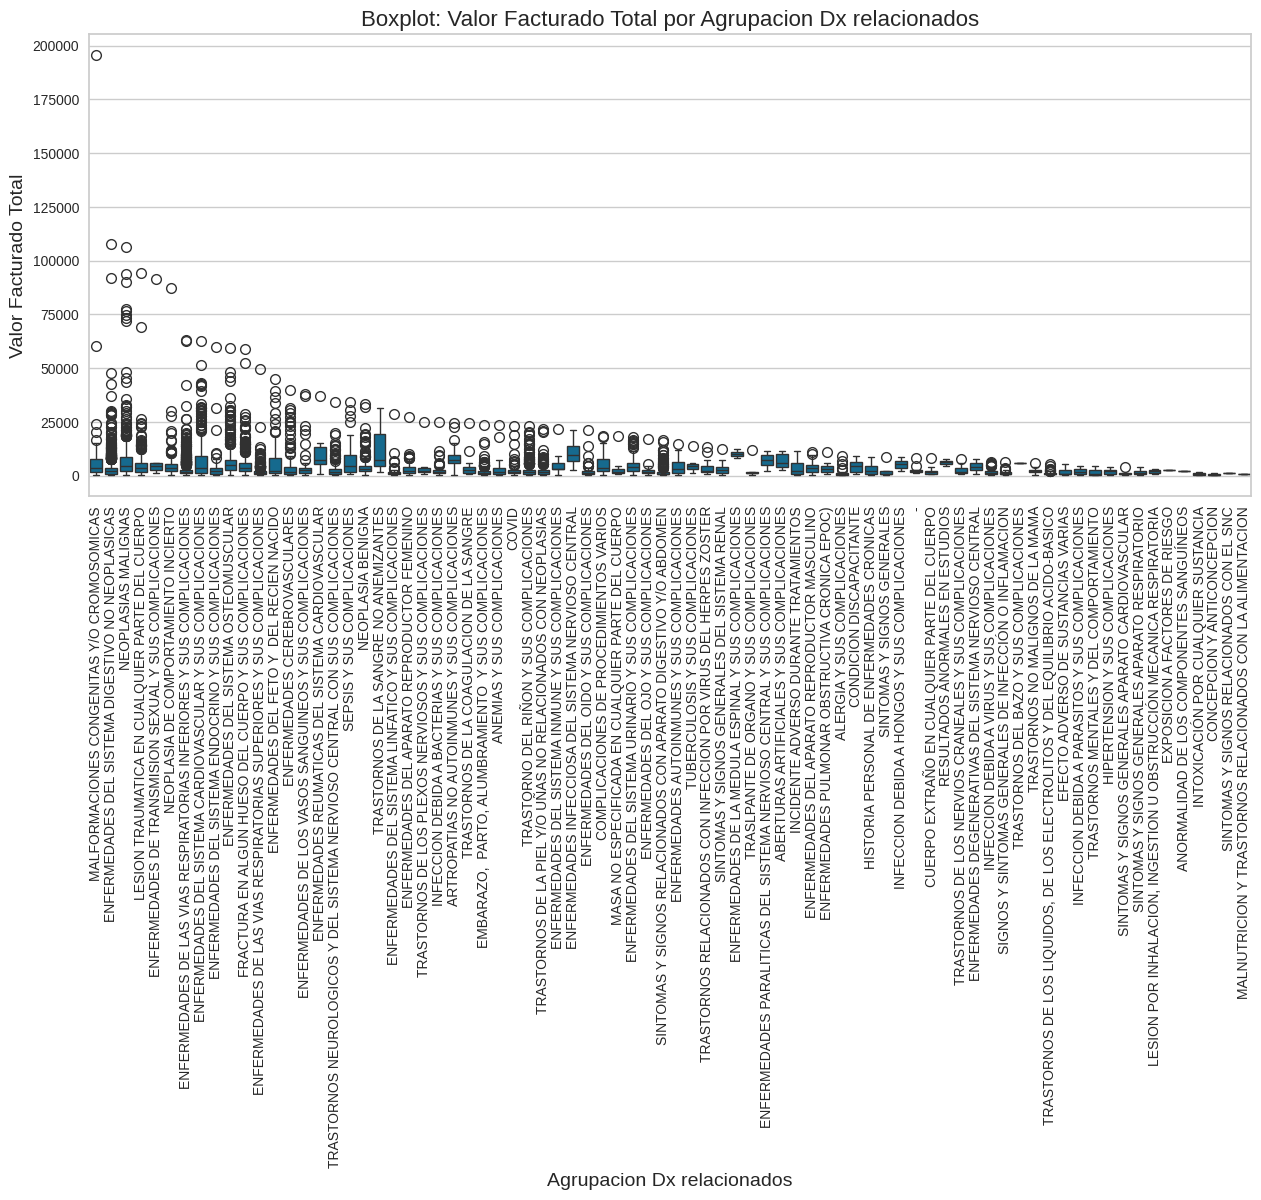

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir las variables categóricas con menos de 50 clases
categorical_vars = [
    'Grupo Etario', 'Genero', 'Producto', 'Tipo prestador principal',
    'Con convenio', 'Provincia prestador principal', 'Canal Venta',
    'Severidad', 'Terapia Intensiva', 'Preexistencia', 'EmergenciaVital',
    'Tipo procedimiento', 'Tipo tratamiento', 'Tipo transaccion', 'Provincia Cliente'
]

# Agregar la variable 'Agrupacion Dx relacionados' a la lista de variables categóricas
categorical_vars.append('Agrupacion Dx relacionados')

# Iterar sobre cada variable categórica y generar un gráfico de caja
for var in categorical_vars:
    # Crear un DataFrame con las columnas 'Valor facturado total' y la variable categórica actual
    data = pd.concat([df_final_filtered['Valor facturado total'], df_final_filtered[var]], axis=1)

    # Crear el gráfico de caja (boxplot)
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=var, y="Valor facturado total", data=data)
    plt.title(f'Boxplot: Valor Facturado Total por {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Valor Facturado Total', fontsize=14)
    plt.xticks(rotation=90)
    plt.show()


Eliminamos atípicos por cada agrupación de DX

In [130]:
# Agrupar por 'Agrupacion Dx relacionados' y calcular los percentiles
percentiles_por_grupo = df_final_filtered.groupby('Agrupacion Dx relacionados')['Valor facturado total'].quantile([0.25, 0.5, 0.75]).unstack()

# Calcular el IQR por grupo
Q1_grupo = percentiles_por_grupo[0.25]
Q3_grupo = percentiles_por_grupo[0.75]
IQR_grupo = Q3_grupo - Q1_grupo

# Determinar los límites superior e inferior por grupo
limite_inferior_grupo = Q1_grupo - 1.5 * IQR_grupo
limite_superior_grupo = Q3_grupo + 1.5 * IQR_grupo

# Crear un DataFrame con los resultados
limites_df = pd.DataFrame({
    'Q1': Q1_grupo,
    'Q3': Q3_grupo,
    'IQR': IQR_grupo,
    'Límite inferior': limite_inferior_grupo,
    'Límite superior': limite_superior_grupo
})

# Función para eliminar outliers basada en los límites por grupo
def eliminar_outliers(df):
    grupo = df.name
    lower = limites_df.loc[grupo, 'Límite inferior']
    upper = limites_df.loc[grupo, 'Límite superior']
    return df[(df['Valor facturado total'] >= lower) & (df['Valor facturado total'] <= upper)]

# Aplicar la función a cada grupo de 'Agrupacion Dx relacionados'
df_final_filtered_sin_outliers = df_final_filtered.groupby('Agrupacion Dx relacionados').apply(eliminar_outliers).reset_index(drop=True)


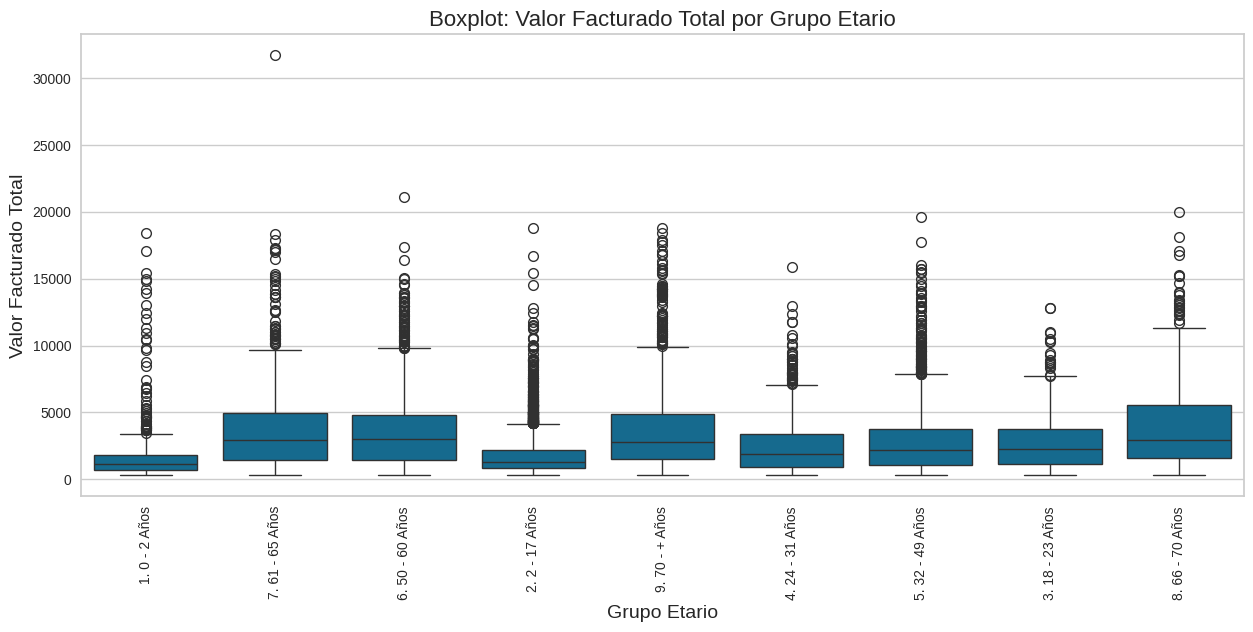

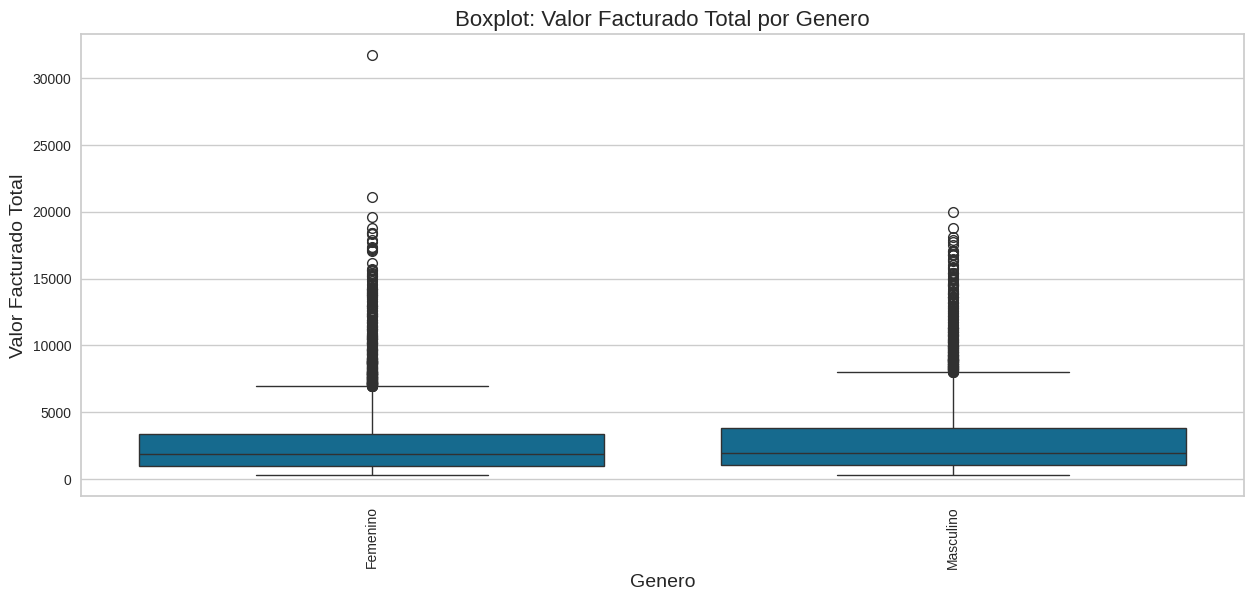

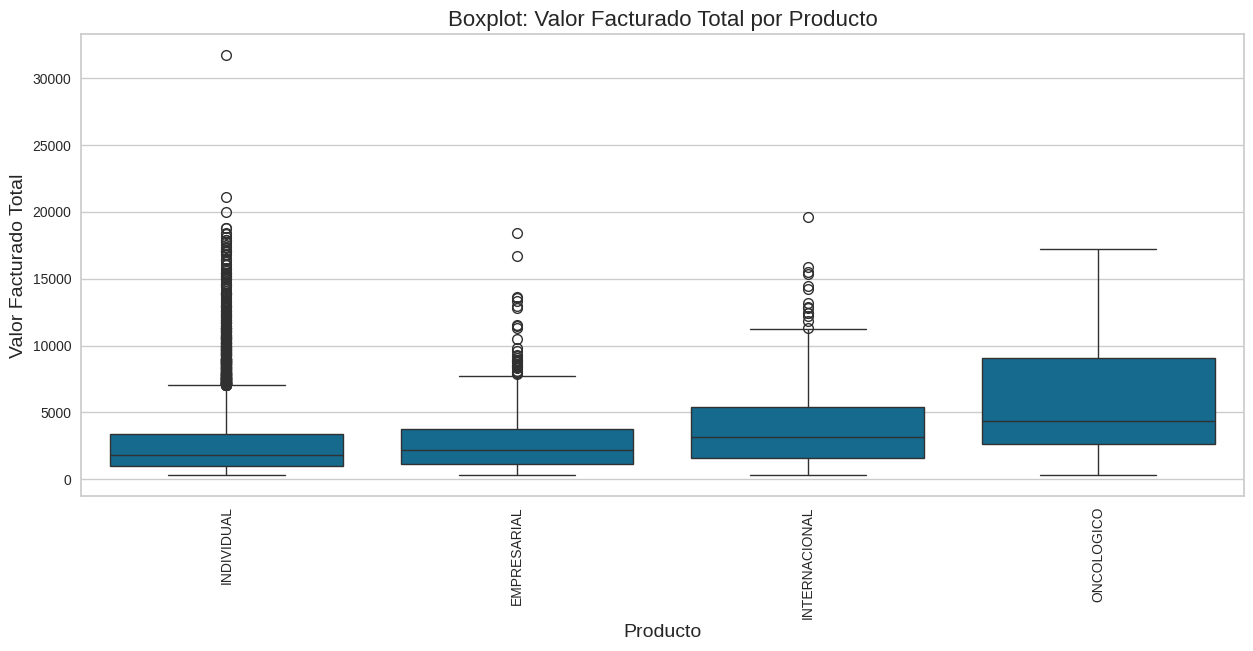

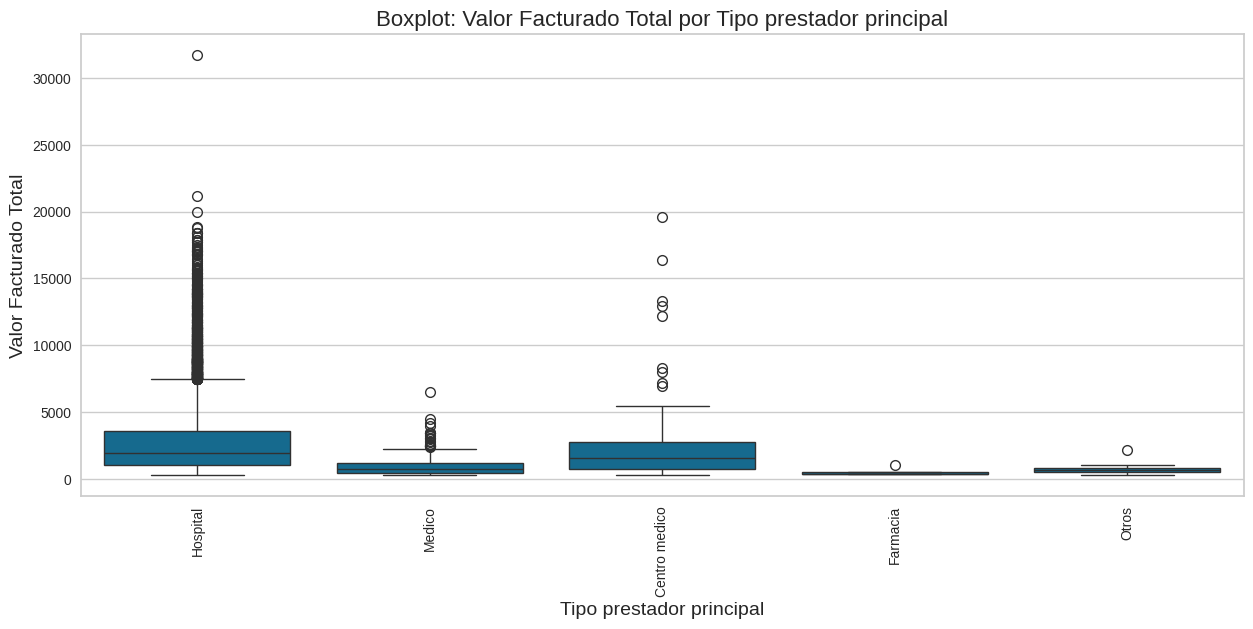

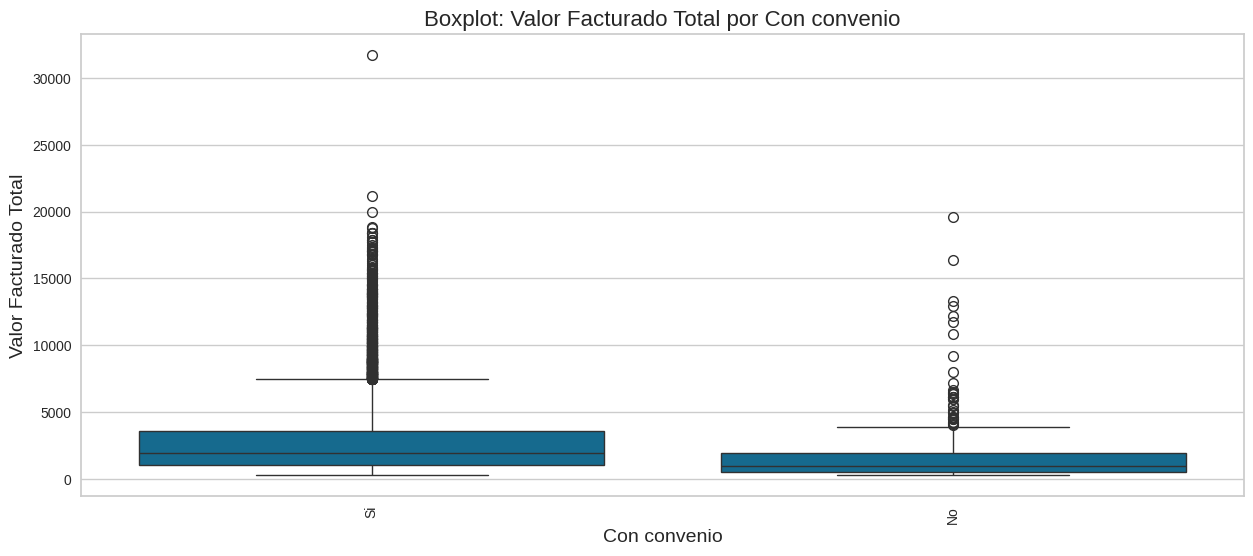

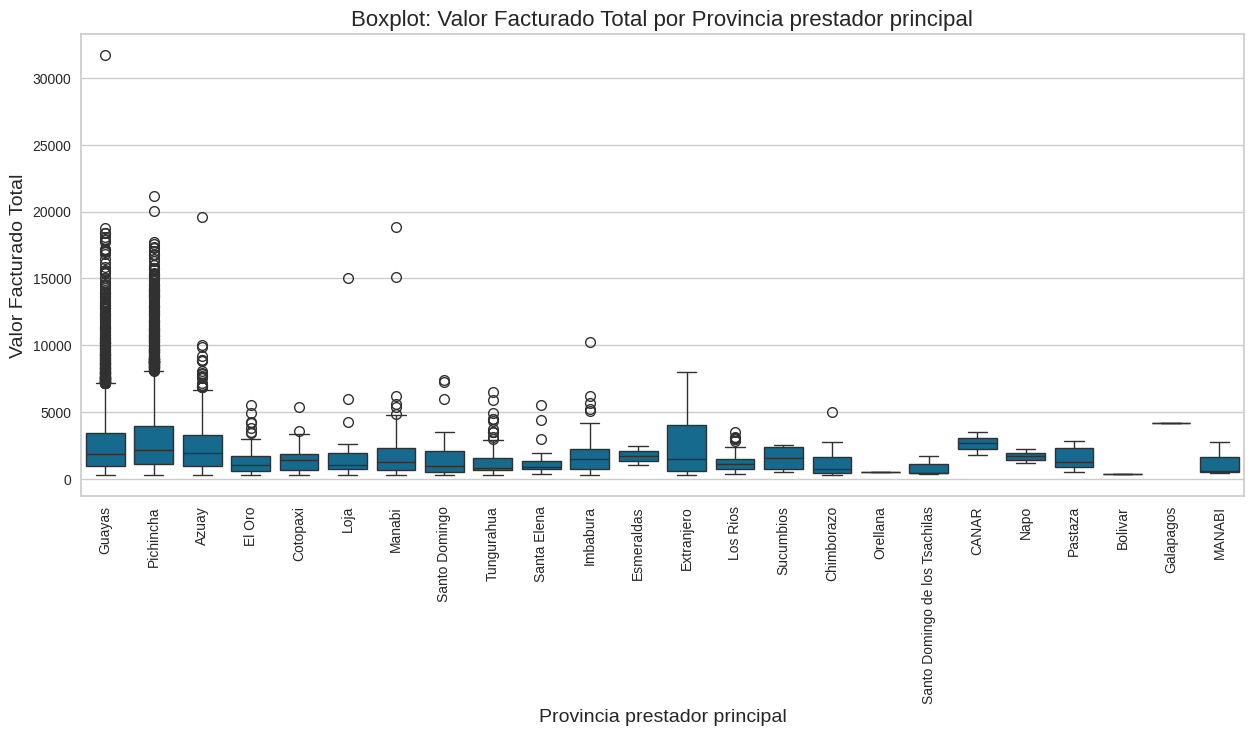

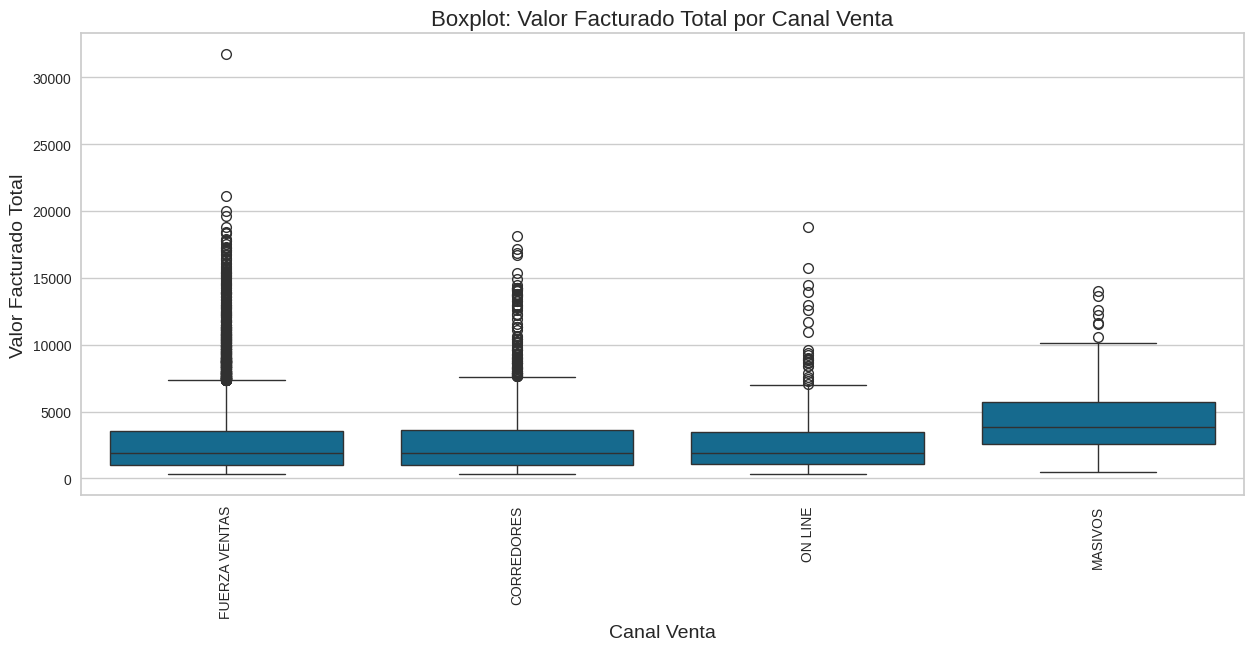

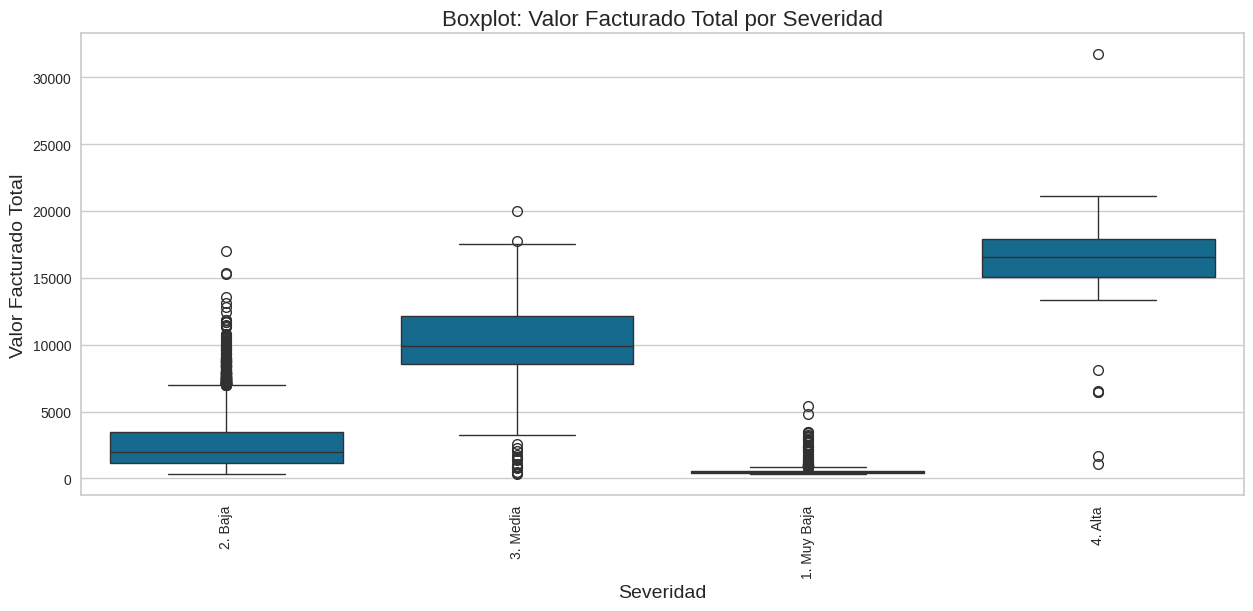

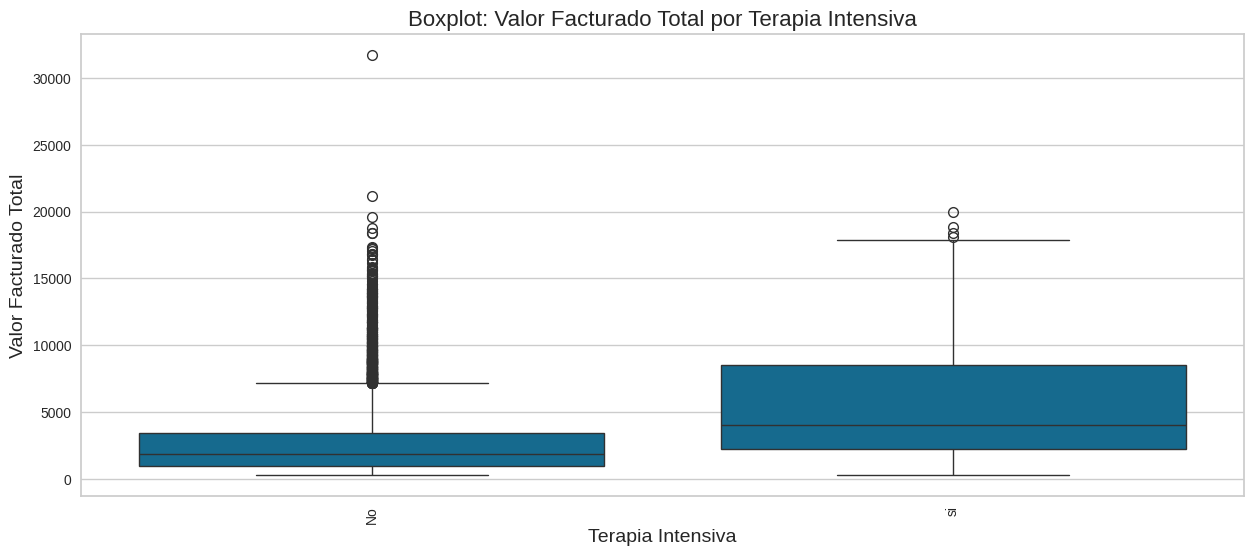

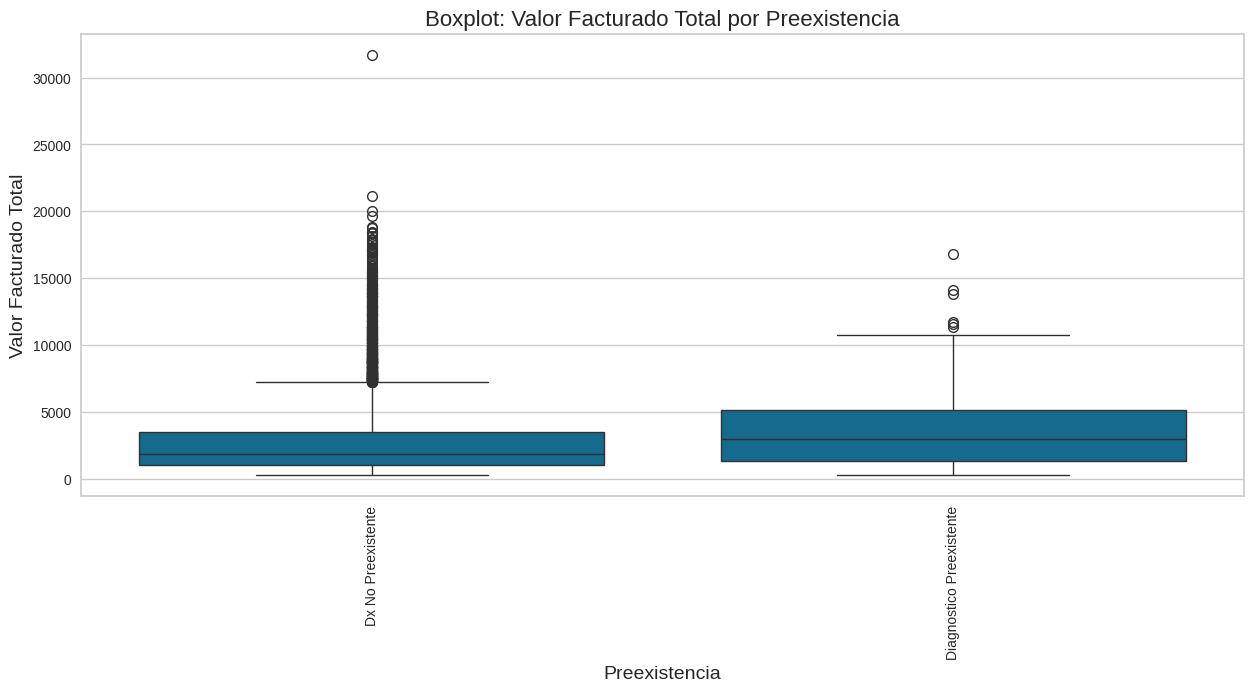

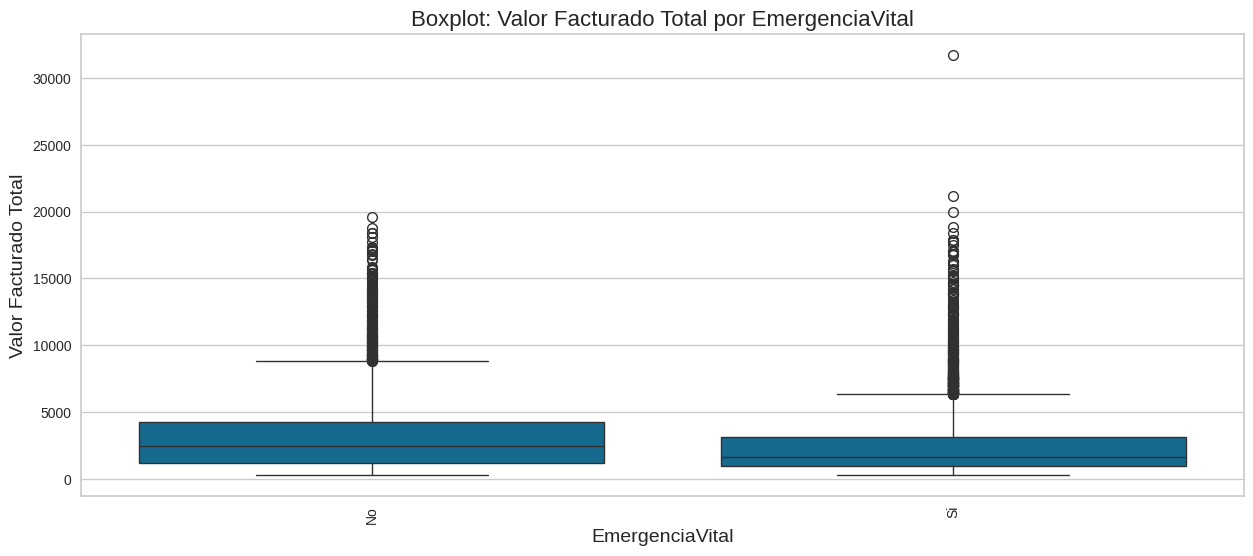

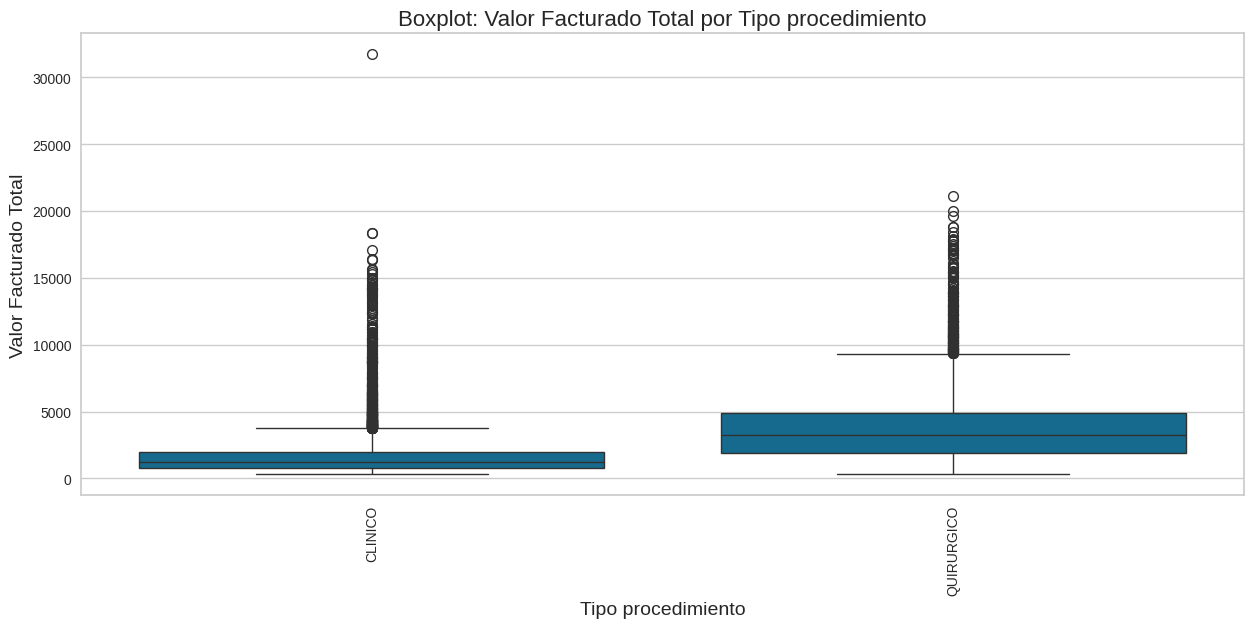

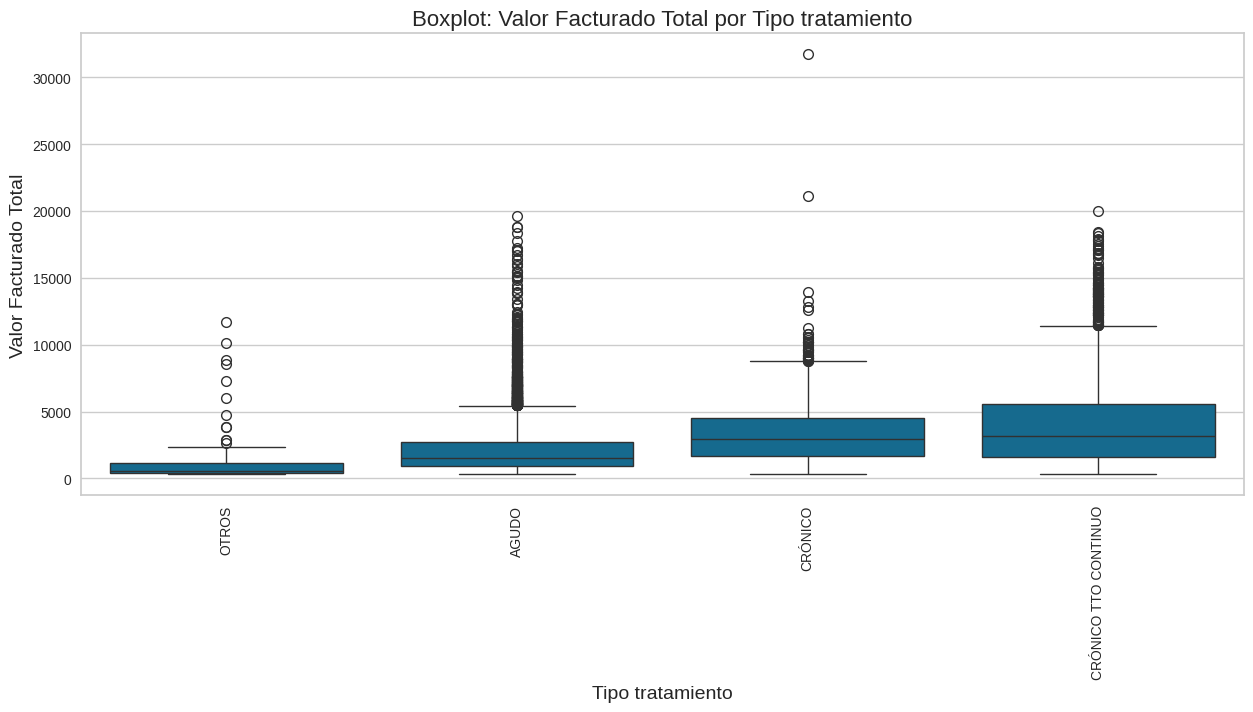

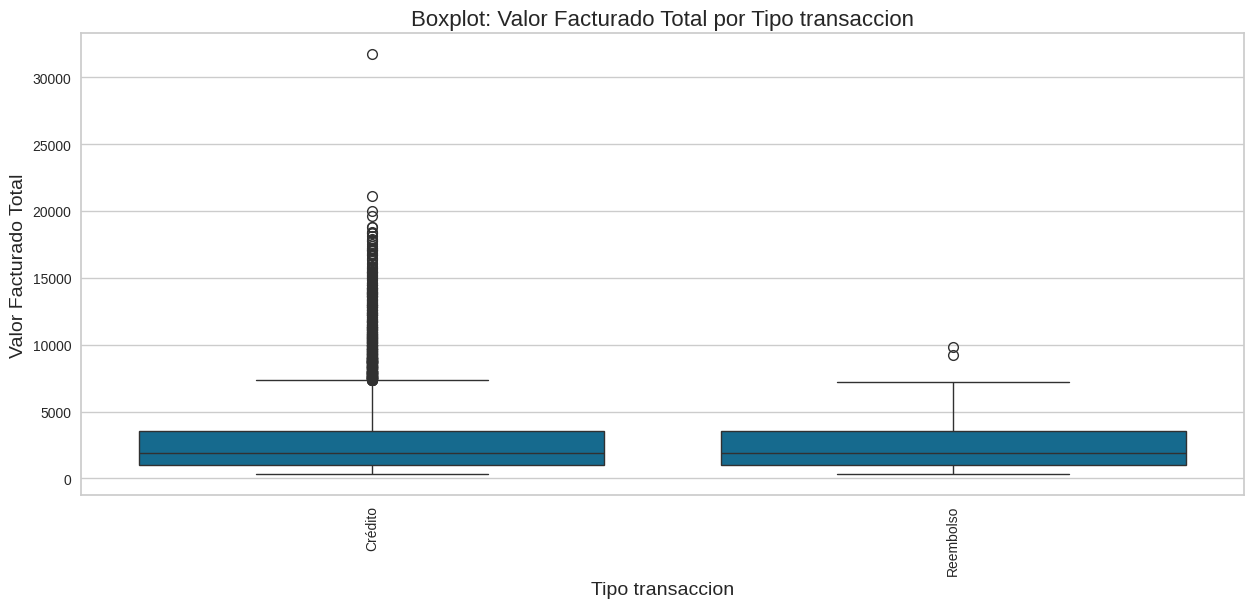

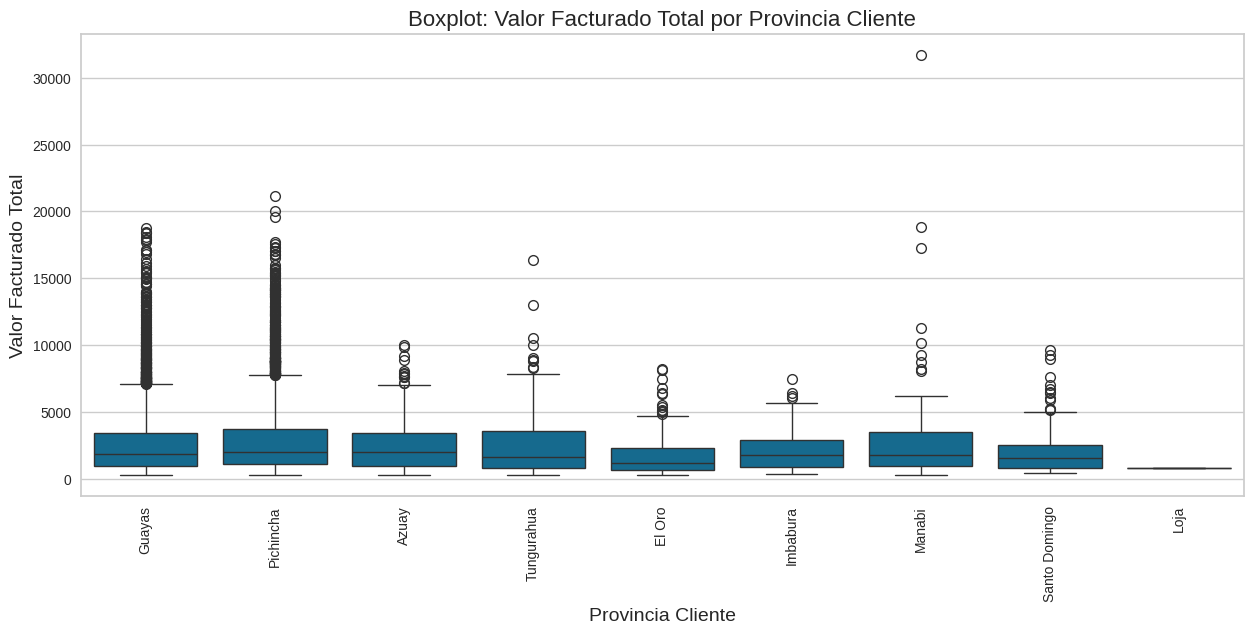

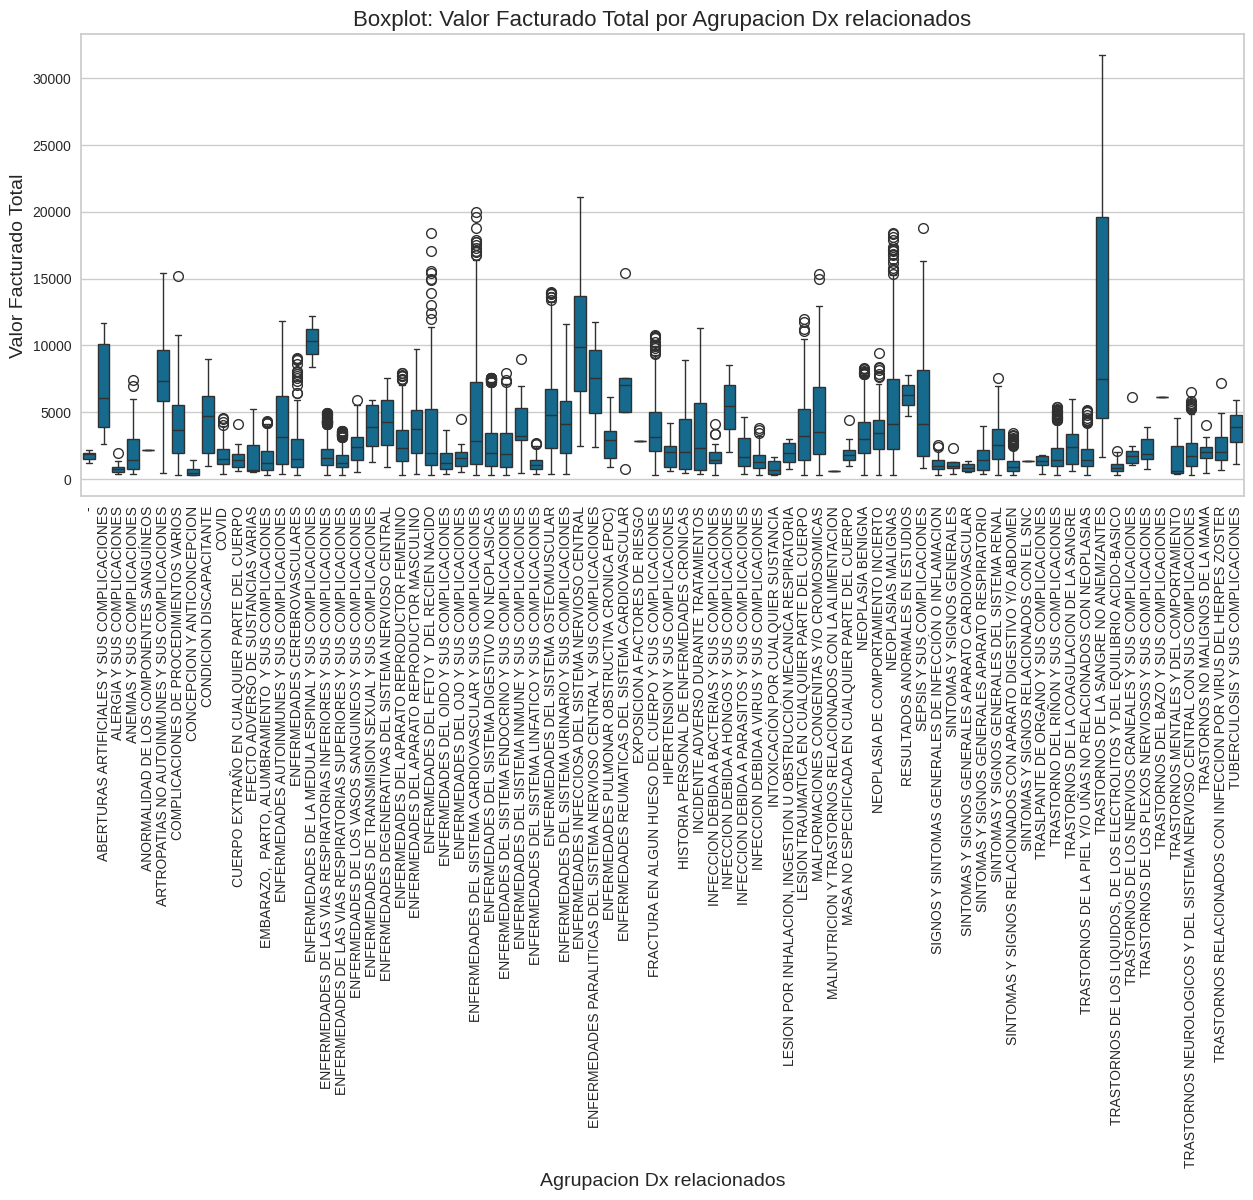

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir las variables categóricas con menos de 50 clases
categorical_vars = [
    'Grupo Etario', 'Genero', 'Producto', 'Tipo prestador principal',
    'Con convenio', 'Provincia prestador principal', 'Canal Venta',
    'Severidad', 'Terapia Intensiva', 'Preexistencia', 'EmergenciaVital',
    'Tipo procedimiento', 'Tipo tratamiento', 'Tipo transaccion', 'Provincia Cliente'
]

# Agregar la variable 'Agrupacion Dx relacionados' a la lista de variables categóricas
categorical_vars.append('Agrupacion Dx relacionados')

# Iterar sobre cada variable categórica y generar un gráfico de caja
for var in categorical_vars:
    # Crear un DataFrame con las columnas 'Valor facturado total' y la variable categórica actual
    data = pd.concat([df_final_filtered_sin_outliers['Valor facturado total'], df_final_filtered_sin_outliers[var]], axis=1)

    # Crear el gráfico de caja (boxplot)
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=var, y="Valor facturado total", data=data)
    plt.title(f'Boxplot: Valor Facturado Total por {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Valor Facturado Total', fontsize=14)
    plt.xticks(rotation=90)
    plt.show()



Revisamos atípicos en cuanto a los días de hospitalización

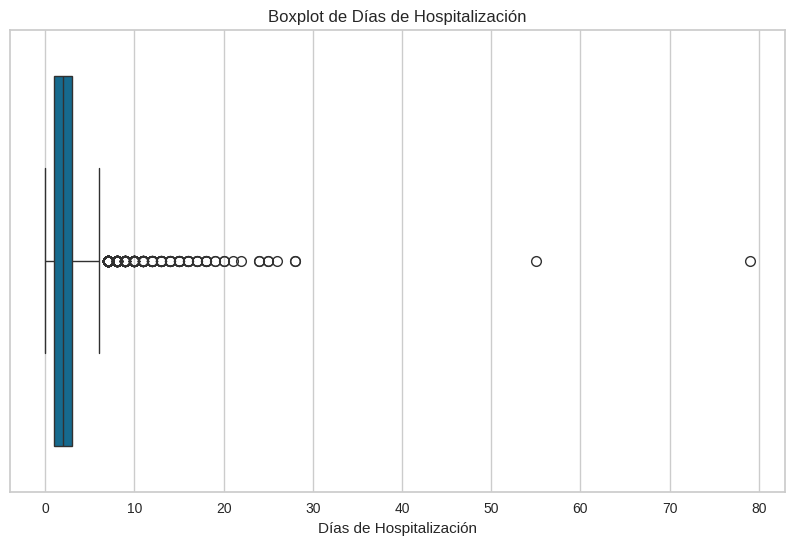

Primer cuartil (Q1): 1.0
Tercer cuartil (Q3): 3.0
IQR: -2.0
Límite inferior: -2.0
Límite superior: 6.0
   Percentile  Value  Count
0        0.10    1.0   4964
1        0.25    1.0   4964
2        0.50    2.0   8986
3        0.75    3.0  11336
4        0.90    5.0  13266
5        0.95    6.0  13652
6        0.99   10.0  14123
7        1.00   79.0  14222


In [132]:
# Suponiendo que df_nuevo es tu DataFrame
# Crear un boxplot de la variable 'dias hospitalizacion'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final_filtered_sin_outliers, x='Dias hospitalizacion')
plt.title('Boxplot de Días de Hospitalización')
plt.xlabel('Días de Hospitalización')
plt.show()


dias_hospitalizacion = df_final_filtered_sin_outliers['Dias hospitalizacion']

# Calcular Q1 (primer cuartil)
Q1 = dias_hospitalizacion.quantile(0.25)

# Calcular Q3 (tercer cuartil)
Q3 = dias_hospitalizacion.quantile(0.75)

# Calcular el IQR
IQR = Q1 - Q3

# Calcular los límites inferior y superior
lower_bound = Q1 + 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

print(f'Primer cuartil (Q1): {Q1}')
print(f'Tercer cuartil (Q3): {Q3}')
print(f'IQR: {IQR}')
print(f'Límite inferior: {lower_bound}')
print(f'Límite superior: {upper_bound}')

# Calcular los percentiles
percentiles = [0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.00]
percentiles_values = dias_hospitalizacion.quantile(percentiles).values

# Calcular los conteos acumulados de registros en cada percentil
percentile_counts = []
for value in percentiles_values:
    count = dias_hospitalizacion[dias_hospitalizacion <= value].count()
    percentile_counts.append(count)

# Crear un DataFrame con los resultados
percentiles_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentiles_values,
    'Count': percentile_counts
})

# Imprimir los resultados
print(percentiles_df)

Vemos que el 99% de los datos tienen hospitalizaciones de hasta 10 días, pasado esto tenemos una brecha muy grande ( 10-79 ) que se puede considerar atípicos, vamos a eliminar esos registros

In [133]:
df_final_filtered_sin_outliers = df_final_filtered_sin_outliers[df_final_filtered_sin_outliers['Dias hospitalizacion'] < 11]

# Mostrar las primeras filas del nuevo DataFrame para verificar
df_final_filtered_sin_outliers.describe()

Fecha Incurrencia          Fecha inicio vigencia  \
count                          14123                          14123   
mean   2023-08-31 06:53:51.664660736  2018-04-22 14:28:54.872194304   
min              2023-01-01 00:00:00            1994-01-18 00:00:00   
25%              2023-04-26 00:00:00            2017-05-01 00:00:00   
50%              2023-08-25 00:00:00            2020-07-28 00:00:00   
75%              2024-01-02 00:00:00            2022-07-16 00:00:00   
max              2024-05-31 00:00:00            2024-04-29 00:00:00   
std                              NaN                            NaN   

       Antigüedad cliente meses  Edad Paciente  Dias hospitalizacion  \
count              14123.000000   14123.000000          14123.000000   
mean                  63.887488      33.764214              2.410182   
min                    0.000000       0.000000              0.000000   
25%                   13.000000       9.000000              1.000000   
50%                   36.000000      33.000000              2.000000   
75%                   76.000000      54.000000              3.000000   
max                  360.000000      98.000000             10.000000   
std                   77.584380      24.290264              1.713778   

       Nivel contrato  HONORARIOS MEDICOS  INSUMOS Y SUMINISTROS  \
count    14123.000000        14123.000000           14123.000000   
mean         4.192735          795.012897             265.796010   
min          3.000000            0.000000               0.000000   
25%          3.000000          183.875000               0.000000   
50%          4.000000          420.000000              64.990000   
75%          5.000000         1161.165000             256.305000   
max          8.000000        10146.000000           19613.100000   
std          1.370615          905.120917             646.309671   

       LABORATORIOS     MEDICINAS         OTROS      PROTESIS  \
count  14123.000000  14123.000000  14123.000000  14123.000000   
mean     250.770169    460.941583     24.813850    111.331272   
min        0.000000      0.000000      0.000000      0.000000   
25%       50.000000     70.555000      0.000000      0.000000   
50%      148.870000    218.800000      0.000000      0.000000   
75%      321.435000    522.285000      0.000000      0.000000   
max     6238.220000  14442.930000   4168.140000   9387.360000   
std      336.828592    864.532834    107.939463    562.854420   

       SERVICIOS HOSPITALARIOS  TERAPIA INTENSIVA  Valor facturado total  \
count             14123.000000       14123.000000           14123.000000   
mean                720.013617          19.188722            2647.868121   
min                   0.000000           0.000000             300.000000   
25%                 287.225000           0.000000            1000.000000   
50%                 500.000000           0.000000            1877.200000   
75%                 897.040000           0.000000            3508.085000   
max               12943.000000        9440.000000           20002.810000   
std                 744.679071         168.747392            2387.105135   

       Valor cubierto total  Valor pagado total  
count          14123.000000        14123.000000  
mean            2481.276293         2324.885657  
min                0.000000            0.000000  
25%              934.955000          854.370000  
50%             1750.440000         1640.540000  
75%             3292.330000         3089.170000  
max            19613.100000        18777.270000  
std             2253.839678         2153.546015

Visualizamos la normaización de la variable objetivo

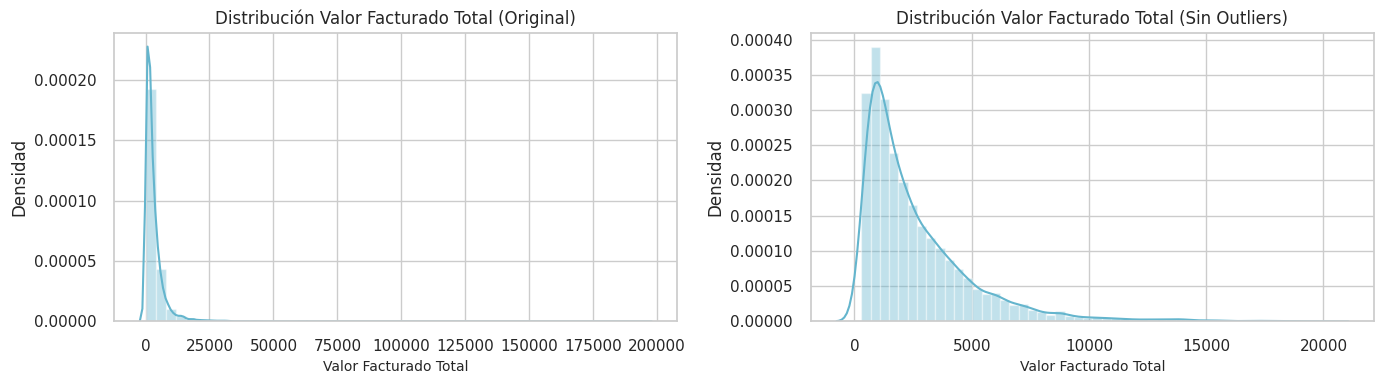

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de seaborn
sns.set(style='whitegrid')

# Crear figuras y ejes para los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Graficar la distribución de Valor facturado total en el DataFrame original (df_final)
sns.distplot(df_final['Valor facturado total'], kde=True, color='c', ax=axes[0])
axes[0].set_title('Distribución Valor Facturado Total (Original)')
axes[0].set_xlabel('Valor Facturado Total', fontsize=10)  # Ajustar tamaño de la etiqueta x
axes[0].set_ylabel('Densidad')

# Graficar la distribución de Valor facturado total en el DataFrame sin outliers (df_final_filtered_sin_outliers)
sns.distplot(df_final_filtered_sin_outliers['Valor facturado total'], kde=True, color='c', ax=axes[1])
axes[1].set_title('Distribución Valor Facturado Total (Sin Outliers)')
axes[1].set_xlabel('Valor Facturado Total', fontsize=10)  # Ajustar tamaño de la etiqueta x
axes[1].set_ylabel('Densidad')

# Ajustar el diseño general de la figura
plt.tight_layout()
plt.show()



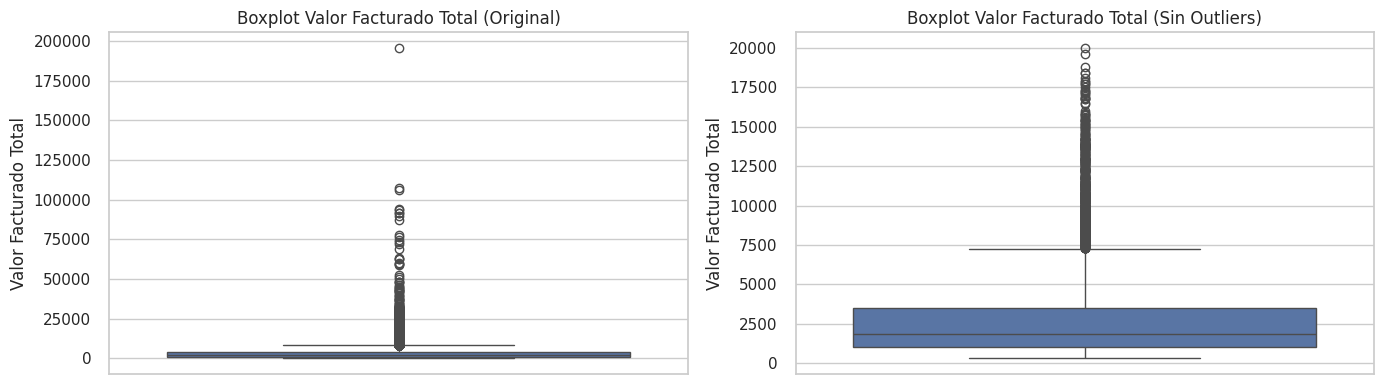

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de seaborn
sns.set(style='whitegrid')

# Crear figuras y ejes para los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Boxplot del DataFrame original (df_final)
sns.boxplot(y='Valor facturado total', data=df_final, ax=axes[0])
axes[0].set_title('Boxplot Valor Facturado Total (Original)')
axes[0].set_ylabel('Valor Facturado Total')

# Boxplot del DataFrame sin outliers (df_final_filtered_sin_outliers)
sns.boxplot(y='Valor facturado total', data=df_final_filtered_sin_outliers, ax=axes[1])
axes[1].set_title('Boxplot Valor Facturado Total (Sin Outliers)')
axes[1].set_ylabel('Valor Facturado Total')

# Ajustar el diseño general de la figura
plt.tight_layout()
plt.show()


**Normalizamos las clases de variables categóricas que tienen pocos datos y eliminamos aquellas variables que son repetitivas como codigos de DX de los cuales ya se tiene la descripción**

In [136]:
import pandas as pd
import re

# Suponiendo que df_nuevo es tu DataFrame original
df_nuevo = df_final_filtered_sin_outliers.copy()

# Función para categorizar las provincias
def categorize_province(province):
    if province in ['Pichincha', 'Guayas']:
        return province
    else:
        return 'Otros'

# Función para categorizar los productos
def categorize_product(product):
    if product == 'INDIVIDUAL':
        return product
    else:
        return 'Otros'

# Función para categorizar tipo de prestador
def categorize_provider(provider):
    if provider == 'Hospital':
        return provider
    else:
        return 'Otros'

# Función para categorizar canal de venta
def categorize_sales_channel(channel):
    if channel == 'FUERZA VENTAS':
        return channel
    else:
        return 'OTROS'

# Función para categorizar antigüedad
def categorize_antiquity(months):
    if months <= 6:
        return '0 a 6 meses'
    elif 7 <= months <= 12:
        return '7 a 12 meses'
    elif 13 <= months <= 24:
        return '13 a 24 meses'
    elif 25 <= months <= 36:
        return '25 a 36 meses'
    else:
        return 'más de 36 meses'

# Aplicar las funciones de categorización a las columnas correspondientes
df_nuevo['Provincia prestador principal'] = df_nuevo['Provincia prestador principal'].apply(categorize_province)
df_nuevo['Provincia Cliente'] = df_nuevo['Provincia Cliente'].apply(categorize_province)
df_nuevo['Producto'] = df_nuevo['Producto'].apply(categorize_product)
df_nuevo['Tipo prestador principal'] = df_nuevo['Tipo prestador principal'].apply(categorize_provider)
df_nuevo['Canal Venta'] = df_nuevo['Canal Venta'].apply(categorize_sales_channel)
df_nuevo['Antigüedad Clase'] = df_nuevo['Antigüedad cliente meses'].apply(categorize_antiquity)
# Función para eliminar prefijos numéricos y espacios en blanco

def remove_prefix(text):
    return re.sub(r'^\d+\.\s*', '', text)

# Aplicar la función a las columnas 'Severidad' y 'Grupo Etario'
df_nuevo['Severidad'] = df_nuevo['Severidad'].apply(remove_prefix)
df_nuevo['Grupo Etario'] = df_nuevo['Grupo Etario'].apply(remove_prefix)

# Reemplazar los valores en la columna 'Preexistencia'
df_nuevo['Preexistencia'] = df_nuevo['Preexistencia'].replace({
    'Dx No Preexistente': 'No',
    'Diagnostico Preexistente': 'Si'
})

# Lista de columnas a eliminar
columns_to_drop = [
   'IdCaso' ,'Codigo paciente', 'Codigo prestador principal', 'Tipo reclamo',
    'Codigo Diagnostico', 'Codigo dx primario', 'lugar-atencion']

    # Eliminar las columnas
df_nuevo = df_nuevo.drop(columns=columns_to_drop)

# Mostrar las primeras filas del DataFrame para verificar
df_nuevo.head()


Fecha Incurrencia Fecha inicio vigencia  Antigüedad cliente meses  \
0        2024-01-27            2022-11-28                        13   
1        2024-02-27            2008-08-01                       186   
2        2023-01-16            2022-09-16                         4   
3        2024-02-14            2012-12-16                       133   
4        2023-05-11            1996-03-24                       325   

   Edad Paciente  Grupo Etario     Genero Provincia Cliente    Producto  \
0              1    0 - 2 Años   Femenino            Guayas  INDIVIDUAL   
1             65  61 - 65 Años  Masculino            Guayas       Otros   
2             51  50 - 60 Años   Femenino            Guayas  INDIVIDUAL   
3             13   2 - 17 Años  Masculino            Guayas  INDIVIDUAL   
4             82   70 - + Años   Femenino         Pichincha  INDIVIDUAL   

  Tipo prestador principal Con convenio  ... MEDICINAS  OTROS  PROTESIS  \
0                 Hospital           Si  ...     26.47    0.0       0.0   
1                 Hospital           Si  ...    128.15    0.0       0.0   
2                 Hospital           Si  ...    377.01    0.0       0.0   
3                 Hospital           Si  ...    193.92   90.0       0.0   
4                 Hospital           Si  ...    321.10    0.0       0.0   

  SERVICIOS HOSPITALARIOS TERAPIA INTENSIVA Valor facturado total  \
0                 1250.00               0.0               2192.48   
1                  513.00               0.0               1979.61   
2                  449.50               0.0               1976.48   
3                  564.09               0.0               1791.65   
4                  502.40               0.0               1450.82   

  Valor cubierto total Valor pagado total  Año-Mes Antigüedad Clase  
0              2192.48            2102.48  2024-01    13 a 24 meses  
1              1979.61            1641.28  2024-02  más de 36 meses  
2              1955.58            1955.58  2023-01      0 a 6 meses  
3              1791.45            1791.45  2024-02  más de 36 meses  
4              1433.73            1433.73  2023-05  más de 36 meses  

[5 rows x 38 columns]

In [137]:
print(df_nuevo.dtypes)

Fecha Incurrencia                datetime64[ns]
Fecha inicio vigencia            datetime64[ns]
Antigüedad cliente meses                  int64
Edad Paciente                             int64
Grupo Etario                             object
Genero                                   object
Provincia Cliente                        object
Producto                                 object
Tipo prestador principal                 object
Con convenio                             object
Provincia prestador principal            object
Dias hospitalizacion                      int64
Nivel contrato                            int64
Canal Venta                              object
Severidad                                object
Dx Primario                              object
Dx Final                                 object
Familia dx relacionados                  object
Agrupacion Dx relacionados               object
Terapia Intensiva                        object
Preexistencia                           

Visualizamos nuevamente la relación entre la variable objetivo y las variables numéricas


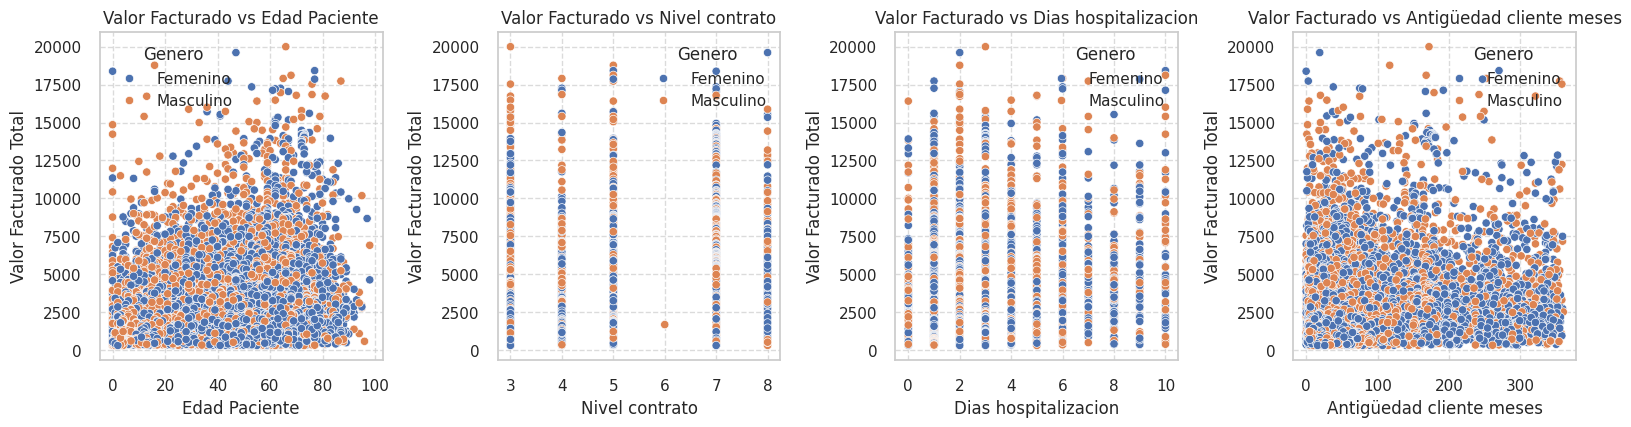

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura y la cuadrícula de subgráficos
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Lista de variables para comparar con 'Valor facturado total'
variables = [
    'Edad Paciente', 'Nivel contrato', 'Dias hospitalizacion',
    'Antigüedad cliente meses'
]

# Crear un gráfico para cada variable
for i, variable in enumerate(variables):
    sns.scatterplot(x=variable, y='Valor facturado total', hue='Genero', data=df_nuevo, ax=axes[i])

    axes[i].set_title(f'Valor Facturado vs {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Valor Facturado Total')
    axes[i].legend(title='Genero')
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Eliminar los subgráficos restantes si hay más subgráficos de los necesarios
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()


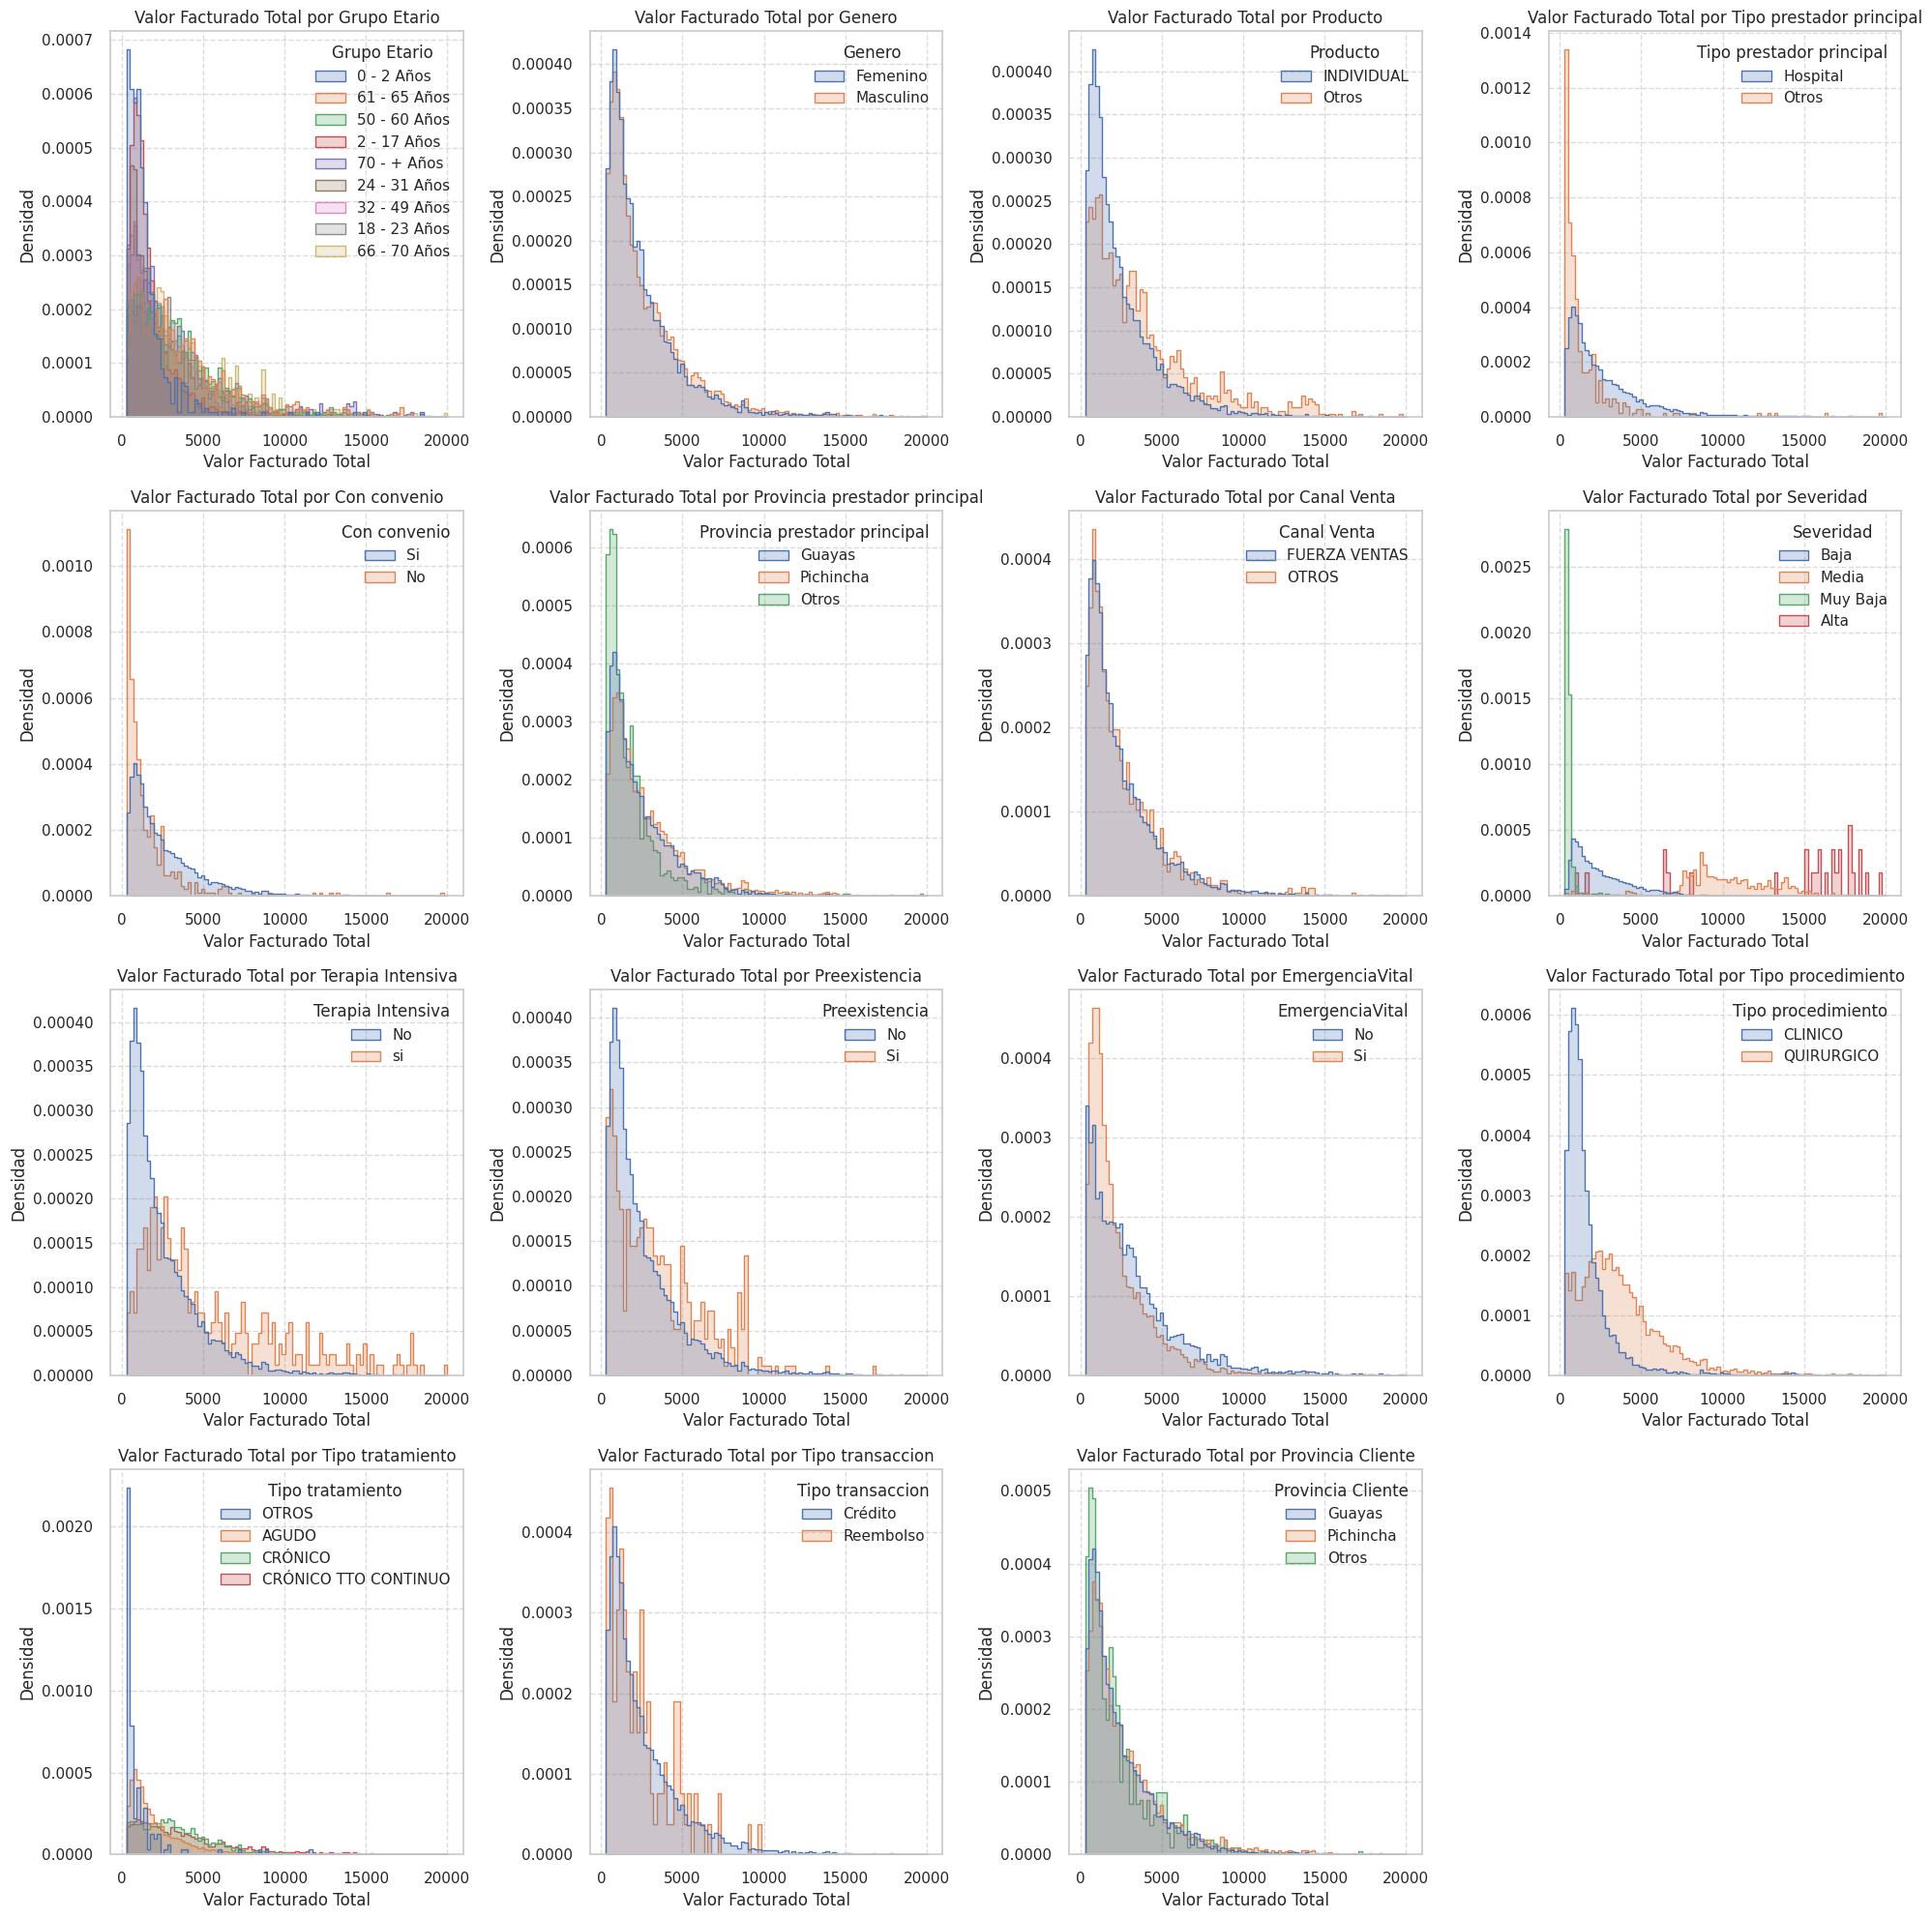

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables categóricas
categorical_vars = [
    'Grupo Etario', 'Genero', 'Producto', 'Tipo prestador principal',
    'Con convenio', 'Provincia prestador principal', 'Canal Venta',
    'Severidad', 'Terapia Intensiva', 'Preexistencia', 'EmergenciaVital',
    'Tipo procedimiento', 'Tipo tratamiento', 'Tipo transaccion', 'Provincia Cliente'
]

# Configurar el tamaño de la figura y la cuadrícula de subgráficos
num_vars = len(categorical_vars)
num_cols = 4  # Número de columnas por fila
num_rows = (num_vars + num_cols - 1) // num_cols  # Calcular el número de filas necesario

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Crear un histograma para cada variable categórica
for i, var in enumerate(categorical_vars):
    sns.histplot(data=df_nuevo, x='Valor facturado total', hue=var, element='step', stat='density', common_norm=False, ax=axes[i])
    axes[i].set_title(f'Valor Facturado Total por {var}')
    axes[i].set_xlabel('Valor Facturado Total')
    axes[i].set_ylabel('Densidad')
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Eliminar los subgráficos restantes si hay más subgráficos de los necesarios
for j in range(num_vars, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()


**CODIFICACION DE VARIABLES NUMERICAS POR METODOS ORDNAL ENDCODER, BINARY ENCODER Y TARGET ENCODER**

In [140]:
# Lista de columnas de tipo object
object_columns = df_nuevo.select_dtypes(include='object').columns

# Obtener la cantidad de clases únicas para cada columna de tipo object
unique_counts = df_nuevo[object_columns].nunique()

# Ordenar los resultados de mayor a menor
sorted_unique_counts = unique_counts.sort_values(ascending=False)

# Mostrar los resultados
print("\nCantidad de clases únicas por variable de tipo object (ordenadas de mayor a menor):")
print(sorted_unique_counts)



Cantidad de clases únicas por variable de tipo object (ordenadas de mayor a menor):
Dx Final                         1644
Dx Primario                       739
Familia dx relacionados           407
Agrupacion Dx relacionados         78
Año-Mes                            17
Grupo Etario                        9
Antigüedad Clase                    5
Severidad                           4
Tipo tratamiento                    4
Provincia prestador principal       3
Provincia Cliente                   3
Canal Venta                         2
Con convenio                        2
Genero                              2
Tipo prestador principal            2
Producto                            2
Terapia Intensiva                   2
Preexistencia                       2
EmergenciaVital                     2
Tipo procedimiento                  2
Tipo transaccion                    2
dtype: int64


In [141]:
import pandas as pd

# Diccionario de variables categóricas y sus cantidades de clases
variables_con_mas_de_uno = {

     'Dx Final':                         1644  ,
    'Grupo Etario': 9,
     'Antigüedad Clase': 5,
    'Severidad': 4,
    'Tipo tratamiento': 4,
    'Provincia prestador principal': 3,
    'Provincia Cliente': 3,
    'Producto': 2,
    'Preexistencia': 2,
    'Tipo transaccion': 2,
    'Tipo procedimiento': 2,
    'EmergenciaVital': 2,
    'Genero': 2,
      'Terapia Intensiva': 2,
    'Canal Venta': 2,
    'Tipo prestador principal': 2,
    'Con convenio': 2
}

# Crear una lista para almacenar los datos de cada variable
data = []

# Iterar sobre las variables y recopilar la cantidad de registros por clase
for variable in variables_con_mas_de_uno.keys():
    # Contar la cantidad de registros por clase
    class_counts = df_nuevo[variable].value_counts()

    # Agregar los datos a la lista
    for index, value in class_counts.items():
        data.append([variable, index, value])

# Crear un DataFrame con los datos recopilados
df_summary = pd.DataFrame(data, columns=['Variable', 'Clase', 'Cantidad de Registros'])

# Mostrar el DataFrame
df_summary


Variable  \
0                     Dx Final   
1                     Dx Final   
2                     Dx Final   
3                     Dx Final   
4                     Dx Final   
...                        ...   
1687               Canal Venta   
1688  Tipo prestador principal   
1689  Tipo prestador principal   
1690              Con convenio   
1691              Con convenio   

                                                  Clase  Cantidad de Registros  
0     DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...                   1075  
1                                     APENDICITIS AGUDA                    595  
2                               PARTO UNICO POR CESAREA                    535  
3     INFECCION DE VIAS URINARIAS, SITIO NO ESPECIFI...                    359  
4                                          COLELITIASIS                    351  
...                                                 ...                    ...  
1687                                              OTROS                   2630  
1688                                           Hospital                  13763  
1689                                              Otros                    360  
1690                                                 Si                  13668  
1691                                                 No                    455  

[1692 rows x 3 columns]

In [142]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14123 entries, 0 to 14221
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Fecha Incurrencia              14123 non-null  datetime64[ns]
 1   Fecha inicio vigencia          14123 non-null  datetime64[ns]
 2   Antigüedad cliente meses       14123 non-null  int64         
 3   Edad Paciente                  14123 non-null  int64         
 4   Grupo Etario                   14123 non-null  object        
 5   Genero                         14123 non-null  object        
 6   Provincia Cliente              14123 non-null  object        
 7   Producto                       14123 non-null  object        
 8   Tipo prestador principal       14123 non-null  object        
 9   Con convenio                   14123 non-null  object        
 10  Provincia prestador principal  14123 non-null  object        
 11  Dias hospitalizacion

In [143]:


# Variables a evaluar
variables_evaluar = ['PROTESIS', 'HONORARIOS MEDICOS', 'INSUMOS Y SUMINISTROS', 'LABORATORIOS', 'MEDICINAS', 'OTROS', 'SERVICIOS HOSPITALARIOS', 'TERAPIA INTENSIVA']

# Crear nuevas columnas con el prefijo APLICA_
for var in variables_evaluar:
    df_nuevo[f'APLICA_{var}'] = (df_nuevo[var] > 0).astype(int)


# Mostrar las primeras filas del DataFrame resultante
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14123 entries, 0 to 14221
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Fecha Incurrencia               14123 non-null  datetime64[ns]
 1   Fecha inicio vigencia           14123 non-null  datetime64[ns]
 2   Antigüedad cliente meses        14123 non-null  int64         
 3   Edad Paciente                   14123 non-null  int64         
 4   Grupo Etario                    14123 non-null  object        
 5   Genero                          14123 non-null  object        
 6   Provincia Cliente               14123 non-null  object        
 7   Producto                        14123 non-null  object        
 8   Tipo prestador principal        14123 non-null  object        
 9   Con convenio                    14123 non-null  object        
 10  Provincia prestador principal   14123 non-null  object        
 11  Dias ho

**Convertir variables categóricas en numéricas**

In [144]:
import pandas as pd

# Supongamos que df_nuevo es tu DataFrame original
# Cargar tu DataFrame (reemplaza esta línea con la carga de tu DataFrame real)
# df_nuevo = pd.read_csv('ruta_a_tu_archivo.csv')  # Ejemplo de carga de datos

# Diccionarios de codificación
ordinal_econde = {
    'Preexistencia': {'No': 0, 'Si': 1},
    'EmergenciaVital': {'No': 0, 'Si': 1},
    'Terapia Intensiva': {'No': 0, 'si': 1},  # Considera la variación en minúsculas
    'Con convenio': {'No': 0, 'Si': 1}
}

specific_encoding = {
    'Grupo Etario': {
        '0 - 2 Años': 0,
        '2 - 17 Años': 1,
        '18 - 23 Años': 2,
        '24 - 31 Años': 3,
        '32 - 49 Años': 4,
        '50 - 60 Años': 5,
        '61 - 65 Años': 6,
        '66 - 70 Años': 7,
        '70 - + Años': 8
    },
    'Antigüedad Clase': {
        '0 a 6 meses': 0,
        '7 a 12 meses': 1,
        '13 a 24 meses': 2,
        '25 a 36 meses': 3,
        'más de 36 meses': 4
    },
    'Severidad': {
        'Muy Baja': 0,
        'Baja': 1,
        'Media': 2,
        'Alta': 3
    },
    'Tipo tratamiento': {
        'AGUDO': 0,
        'CRÓNICO TTO CONTINUO': 1,
        'CRÓNICO': 2,
        'OTROS': 3
    },
    'Producto': {
        'INDIVIDUAL': 1,
        'Otros': 0
    },
    'Tipo transaccion': {
        'Crédito': 1,
        'Reembolso': 0
    },
    'Tipo procedimiento': {
        'CLINICO': 0,
        'QUIRURGICO': 1
    },
    'Provincia prestador principal': {
        'Guayas': 0,
        'Pichincha': 1,
        'Otros': 2
    },
    'Provincia Cliente': {
        'Guayas': 0,
        'Pichincha': 1,
        'Otros': 2
    },
    'Genero': {
        'Femenino': 0,
        'Masculino': 1
    },
    'Canal Venta': {
        'FUERZA VENTAS': 1,
        'OTROS': 0
    },
    'Tipo prestador principal': {
        'Hospital': 1,
        'Otros': 0
    }
}

# Crear df1 copiando df_nuevo
df1 = df_nuevo.copy()

# Aplicar codificación binaria
for column, mapping in ordinal_econde.items():
    if column in df1.columns:
        df1[column] = df1[column].map(mapping)

# Aplicar codificación específica
for column, mapping in specific_encoding.items():
    if column in df1.columns:
        df1[column] = df1[column].map(mapping)

#Target endode para las variables con muchas clases

# Variables a aplicar target encoding
variables_target_encoding = ['Dx Final', 'Dx Primario', 'Familia dx relacionados','Agrupacion Dx relacionados']

# Aplicar target encoding a cada variable en la lista
for var in variables_target_encoding:
    mean_target_encoding = df1.groupby(var)['Valor facturado total'].mean()
    df1[var] = df1[var].map(mean_target_encoding)

# Mostrar las primeras filas del DataFrame resultante
df1.head()


Fecha Incurrencia Fecha inicio vigencia  Antigüedad cliente meses  \
0        2024-01-27            2022-11-28                        13   
1        2024-02-27            2008-08-01                       186   
2        2023-01-16            2022-09-16                         4   
3        2024-02-14            2012-12-16                       133   
4        2023-05-11            1996-03-24                       325   

   Edad Paciente  Grupo Etario  Genero  Provincia Cliente  Producto  \
0              1             0       0                  0         1   
1             65             6       1                  0         0   
2             51             5       0                  0         1   
3             13             1       1                  0         1   
4             82             8       0                  1         1   

   Tipo prestador principal  Con convenio  ...  Año-Mes  Antigüedad Clase  \
0                         1             1  ...  2024-01                 2   
1                         1             1  ...  2024-02                 4   
2                         1             1  ...  2023-01                 0   
3                         1             1  ...  2024-02                 4   
4                         1             1  ...  2023-05                 4   

   APLICA_PROTESIS  APLICA_HONORARIOS MEDICOS  APLICA_INSUMOS Y SUMINISTROS  \
0                0                          1                             1   
1                0                          1                             1   
2                0                          1                             1   
3                0                          1                             0   
4                0                          1                             1   

   APLICA_LABORATORIOS  APLICA_MEDICINAS  APLICA_OTROS  \
0                    1                 1             0   
1                    1                 1             0   
2                    1                 1             0   
3                    1                 1             1   
4                    1                 1             0   

   APLICA_SERVICIOS HOSPITALARIOS  APLICA_TERAPIA INTENSIVA  
0                               1                         0  
1                               1                         0  
2                               1                         0  
3                               1                         0  
4                               1                         0  

[5 rows x 46 columns]

**Matriz de correlación**

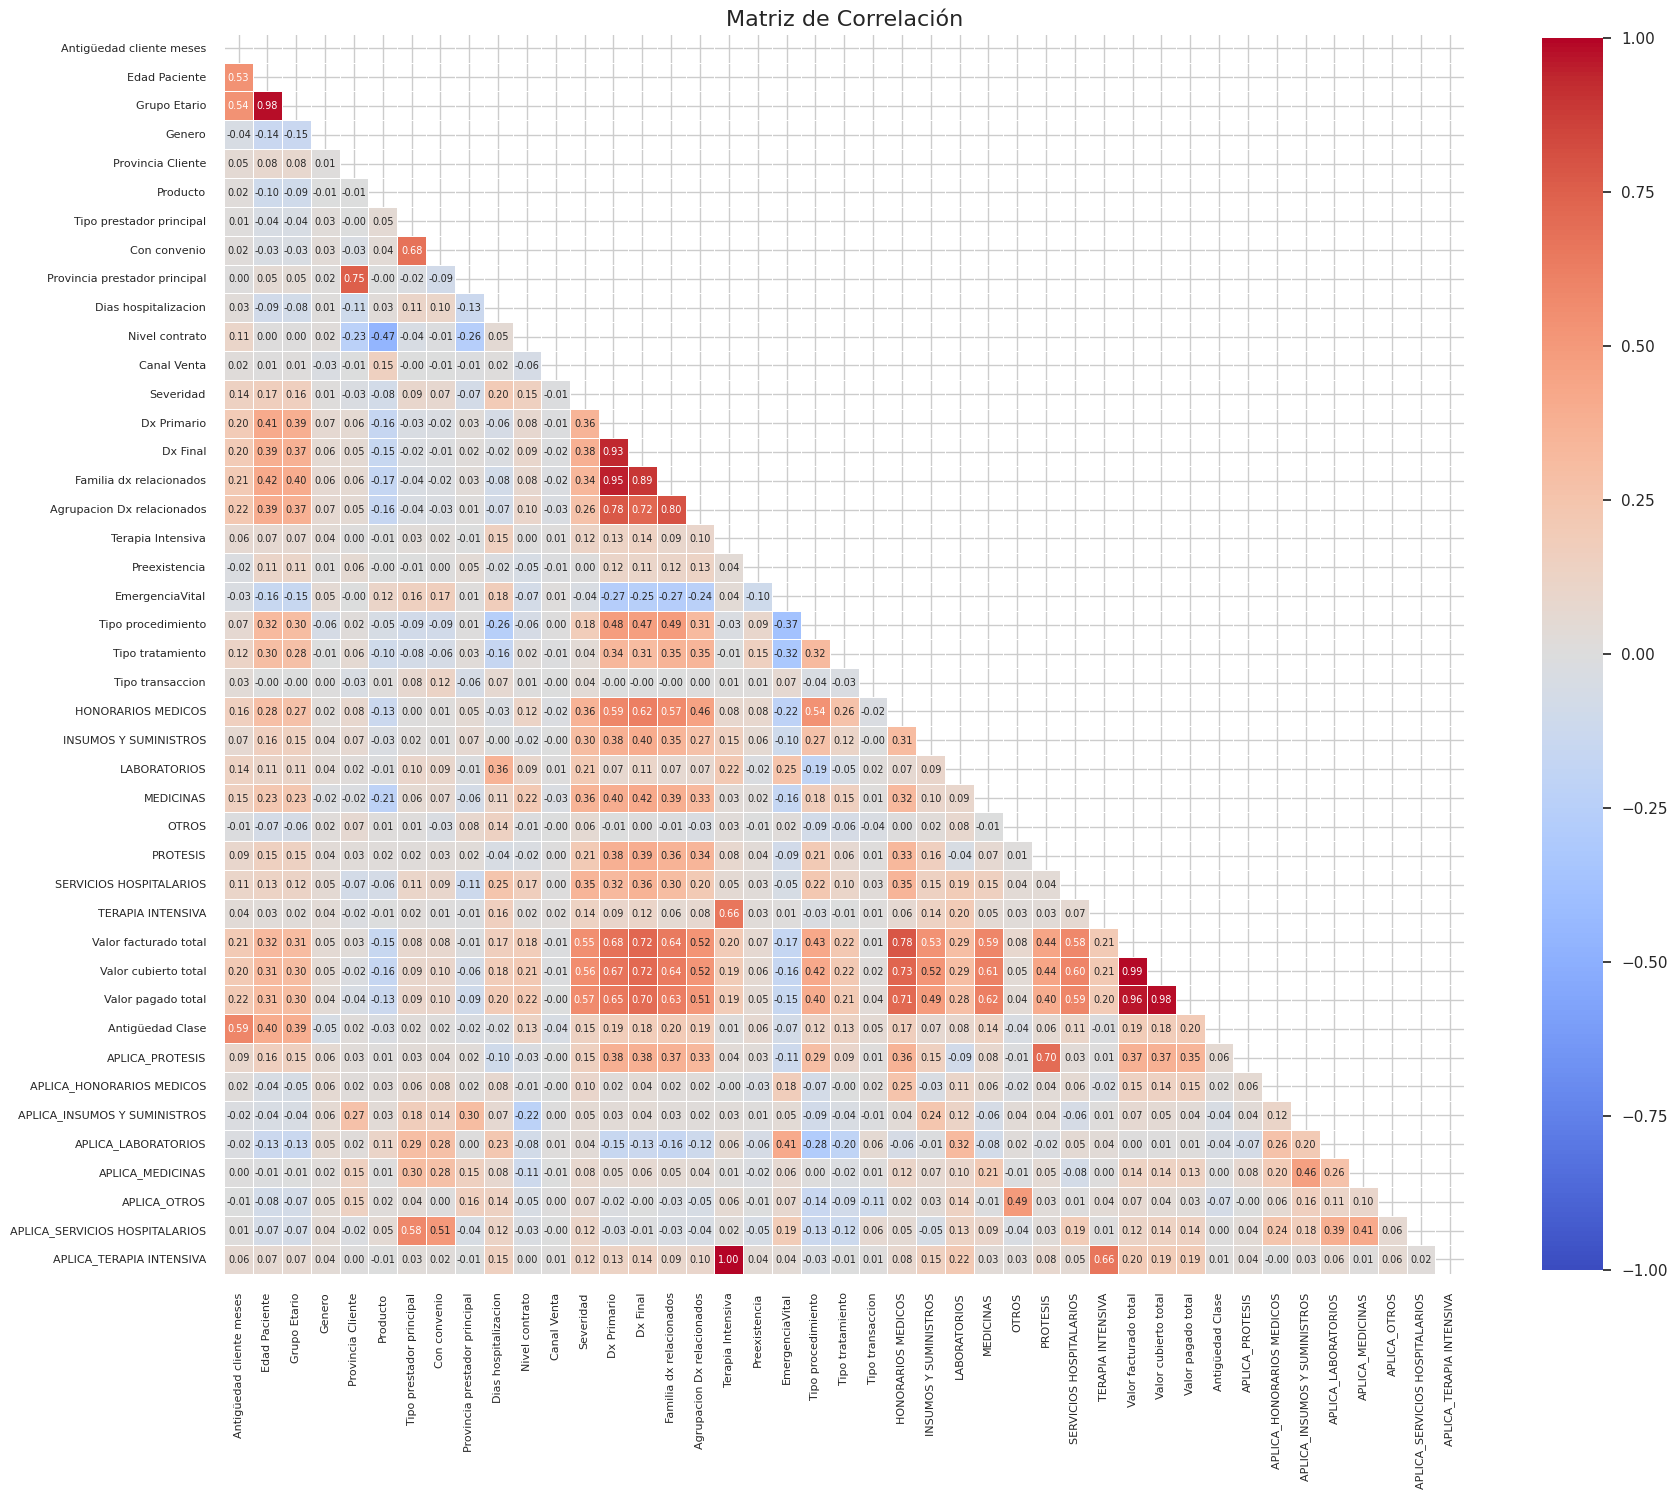

In [145]:
# Seleccionar solo las variables numéricas
numerical_df = df1.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr = numerical_df.corr()

# Crear una máscara para la parte superior de la matriz
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurar la figura de matplotlib
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura

# Dibujar el mapa de calor
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=.5,
    annot_kws={"size": 7},  # Ajusta el tamaño de las anotaciones
    cbar_kws={"shrink": .8}  # Ajusta el tamaño de la barra de color
)

# Configurar los títulos y etiquetas
plt.title('Matriz de Correlación', fontsize=16)  # Ajusta el tamaño del título
plt.xticks(rotation=90, fontsize=8)  # Ajusta el tamaño de las etiquetas del eje x
plt.yticks(rotation=0, fontsize=8)   # Ajusta el tamaño de las etiquetas del eje y

# Mostrar la gráfica
plt.show()



## **MODELO DE REGRESION LINEAL BAJO EL ENFOQUE ESTADÍSTICO**

Eliminamos columnas que no vamos a ocupar.


### MODELO 1. CON TODAS LAS VARIABLES

Vamos a aplicar el modelo a todas las variables para ver su comportamiento

In [146]:
import pandas as pd

# Supongamos que df1 es tu DataFrame original
# Eliminar columnas específicas
columns_to_drop = [
    'Fecha Incurrencia',
    'Fecha inicio vigencia',
    'Antigüedad cliente meses',
    'Edad Paciente',
    'Provincia Cliente',
    'Tipo prestador principal',
    'Año-Mes',
    'Valor cubierto total',
    'Valor pagado total'
]

dfmodel = df1.drop(columns=columns_to_drop)

# Verificar el DataFrame resultante
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14123 entries, 0 to 14221
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Grupo Etario                    14123 non-null  int64  
 1   Genero                          14123 non-null  int64  
 2   Producto                        14123 non-null  int64  
 3   Con convenio                    14123 non-null  int64  
 4   Provincia prestador principal   14123 non-null  int64  
 5   Dias hospitalizacion            14123 non-null  int64  
 6   Nivel contrato                  14123 non-null  int64  
 7   Canal Venta                     14123 non-null  int64  
 8   Severidad                       14123 non-null  int64  
 9   Dx Primario                     14123 non-null  float64
 10  Dx Final                        14123 non-null  float64
 11  Familia dx relacionados         14123 non-null  float64
 12  Agrupacion Dx relacionados      14123

In [147]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Supongamos que dfmodel es el DataFrame con las variables que vas a usar

# Define la variable dependiente (y) y las variables independientes (X)
y = dfmodel['Valor facturado total']
X = dfmodel.drop(columns=['Valor facturado total', 'APLICA_TERAPIA INTENSIVA'])

# Asegúrate de que X y y tengan el mismo índice
X, y = X.align(y, join='inner', axis=0)

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un nuevo DataFrame con las variables escaladas y el intercepto
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df = sm.add_constant(X_scaled_df, prepend=True)

# Calcular el VIF para cada variable en el DataFrame escalado
vif_data = pd.DataFrame()
vif_data['Variable'] = X_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Imprimir el VIF
print("VIF de las Variables:")
print(vif_data)

# Ajustar el modelo utilizando statsmodels
modelo = sm.OLS(endog=y, exog=X_scaled_df)
modelo_res = modelo.fit()

# Imprimir el resumen del modelo
print("\nResumen del Modelo:")
print(modelo_res.summary())




VIF de las Variables:
                          Variable        VIF
0                            const   1.000000
1                     Grupo Etario   1.530822
2                           Genero   1.067741
3                         Producto   1.410940
4                     Con convenio   1.421489
5    Provincia prestador principal   1.264701
6             Dias hospitalizacion   1.436781
7                   Nivel contrato   1.617895
8                      Canal Venta   1.029032
9                        Severidad   1.509082
10                     Dx Primario  16.389105
11                        Dx Final   8.887561
12         Familia dx relacionados  11.845850
13      Agrupacion Dx relacionados   3.077734
14               Terapia Intensiva   1.862272
15                   Preexistencia   1.048208
16                 EmergenciaVital   1.472787
17              Tipo procedimiento   2.169002
18                Tipo tratamiento   1.331932
19                Tipo transaccion   1.042243
20          

Con todas las variables podemos observar que el modelo presenta problemas, esto es de esperarse puesto a que las variables de valores por rubros están en función de la variable objetivo por lo que el modelo presenta un sobreajuste.
Estas variables por su fuerte relación no podrían servir como predictores, al contrario vamos a ocupar las variables creadas en donde se tiene si una atenci´ón tiene o no un servicio en específico.

También podemos verificar un VIF alto en las variables de Diagnóstico, esto es esperado puesto que están relacionados directamente.

Poodemos probar como funciona el modelo incluyendo cada una de esas variables a la vez.

### 2. MODELO AJUSTADO

In [148]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Supongamos que dfmodel es el DataFrame con las variables que vas a usar

# Define la variable dependiente (y) y las variables independientes (X)
y = dfmodel['Valor facturado total']
X = dfmodel.drop(columns=['Valor facturado total','' 'PROTESIS', 'HONORARIOS MEDICOS', 'INSUMOS Y SUMINISTROS', 'LABORATORIOS', 'MEDICINAS', 'OTROS', 'SERVICIOS HOSPITALARIOS', 'TERAPIA INTENSIVA',
                          'Dx Primario', 'Familia dx relacionados','Agrupacion Dx relacionados','Terapia Intensiva'])
# Asegúrate de que X y y tengan el mismo índice
X, y = X.align(y, join='inner', axis=0)

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un nuevo DataFrame con las variables escaladas y el intercepto
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df = sm.add_constant(X_scaled_df, prepend=True)

# Calcular el VIF para cada variable en el DataFrame escalado
vif_data = pd.DataFrame()
vif_data['Variable'] = X_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]


# Ajustar el modelo utilizando statsmodels
modelo = sm.OLS(endog=y, exog=X_scaled_df)
modelo_res = modelo.fit()

# Imprimir el resumen del modelo
print("\nResumen del Modelo:")
print(modelo_res.summary())


# Imprimir el VIF
print("* * * * * * * * * * * * * * *")
print("VIF de las Variables:")
print(vif_data)



Resumen del Modelo:
                              OLS Regression Results                             
Dep. Variable:     Valor facturado total   R-squared:                       0.690
Model:                               OLS   Adj. R-squared:                  0.689
Method:                    Least Squares   F-statistic:                     1307.
Date:                   Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                           03:06:46   Log-Likelihood:            -1.2162e+05
No. Observations:                  14123   AIC:                         2.433e+05
Df Residuals:                      14098   BIC:                         2.435e+05
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

En nuestro análisis de regresión lineal, el modelo ha demostrado un ajuste bastante sólido con un R-cuadrado de 0.690, lo que indica que alrededor del 69% de la variabilidad en el 'Valor facturado total' puede explicarse por las variables que hemos incluido. Este resultado sugiere que nuestro modelo es efectivo en capturar la relación entre el valor facturado y las variables predictoras. Entre las variables más influyentes, 'Dx Final' y 'Severidad' se destacan con los coeficientes más altos, lo que subraya su impacto significativo en el monto facturado. Además, variables como 'APLICA_PROTESIS' y 'APLICA_TERAPIA INTENSIVA' también muestran efectos positivos, indicando que la presencia de estos servicios aumenta el valor facturado.

También se observa variables con un p > 0.05 lo que indica que posiblemente estras variables no esten aportando al modelo.

### 3. MODELO APLICANDO OTRAS VARIABLES DE DIAGNOSTICO.

Ahora vamos a probar con otras variables de Diagnostico para evualuar cual es la mas efectiva de este grupo.

**Modelo con Dx Primario**


In [149]:

# Define la variable dependiente (y) y las variables independientes (X)
y = dfmodel['Valor facturado total']
X = dfmodel.drop(columns=['Valor facturado total','' 'PROTESIS', 'HONORARIOS MEDICOS', 'INSUMOS Y SUMINISTROS', 'LABORATORIOS', 'MEDICINAS', 'OTROS', 'SERVICIOS HOSPITALARIOS', 'TERAPIA INTENSIVA',
                          'Dx Final', 'Familia dx relacionados','Agrupacion Dx relacionados','Terapia Intensiva','Genero','Producto','Canal Venta','Preexistencia'])
# Asegúrate de que X y y tengan el mismo índice
X, y = X.align(y, join='inner', axis=0)

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un nuevo DataFrame con las variables escaladas y el intercepto
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df = sm.add_constant(X_scaled_df, prepend=True)

# Calcular el VIF para cada variable en el DataFrame escalado
vif_data = pd.DataFrame()
vif_data['Variable'] = X_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]


# Ajustar el modelo utilizando statsmodels
modelo = sm.OLS(endog=y, exog=X_scaled_df)
modelo_res = modelo.fit()

# Imprimir el resumen del modelo
print("\nResumen del Modelo:")
print(modelo_res.summary())


# Imprimir el VIF
print("* * * * * * * * * * * * * * *")
print("VIF de las Variables:")
print(vif_data)



Resumen del Modelo:
                              OLS Regression Results                             
Dep. Variable:     Valor facturado total   R-squared:                       0.662
Model:                               OLS   Adj. R-squared:                  0.662
Method:                    Least Squares   F-statistic:                     1383.
Date:                   Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                           03:06:47   Log-Likelihood:            -1.2222e+05
No. Observations:                  14123   AIC:                         2.445e+05
Df Residuals:                      14102   BIC:                         2.446e+05
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

En comparación con nuestro análisis previo, donde el modelo mostró un R-cuadrado de 0.690, el nuevo modelo con un R-cuadrado de 0.662 refleja una ligera disminución en la capacidad explicativa del modelo sobre la variabilidad del 'Valor facturado total'.

### Realicemos una última prueba con la agrupación de Dx


In [150]:

# Define la variable dependiente (y) y las variables independientes (X)
y = dfmodel['Valor facturado total']
X = dfmodel.drop(columns=['Valor facturado total','' 'PROTESIS', 'HONORARIOS MEDICOS', 'INSUMOS Y SUMINISTROS', 'LABORATORIOS', 'MEDICINAS', 'OTROS', 'SERVICIOS HOSPITALARIOS', 'TERAPIA INTENSIVA',
                          'Dx Final', 'Familia dx relacionados','Dx Primario','Terapia Intensiva','Genero','Producto','Canal Venta','Preexistencia'])
# Asegúrate de que X y y tengan el mismo índice
X, y = X.align(y, join='inner', axis=0)

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un nuevo DataFrame con las variables escaladas y el intercepto
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df = sm.add_constant(X_scaled_df, prepend=True)

# Calcular el VIF para cada variable en el DataFrame escalado
vif_data = pd.DataFrame()
vif_data['Variable'] = X_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]


# Ajustar el modelo utilizando statsmodels
modelo = sm.OLS(endog=y, exog=X_scaled_df)
modelo_res = modelo.fit()

# Imprimir el resumen del modelo
print("\nResumen del Modelo:")
print(modelo_res.summary())


# Imprimir el VIF
print("* * * * * * * * * * * * * * *")
print("VIF de las Variables:")
print(vif_data)



Resumen del Modelo:
                              OLS Regression Results                             
Dep. Variable:     Valor facturado total   R-squared:                       0.617
Model:                               OLS   Adj. R-squared:                  0.616
Method:                    Least Squares   F-statistic:                     1136.
Date:                   Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                           03:06:47   Log-Likelihood:            -1.2311e+05
No. Observations:                  14123   AIC:                         2.463e+05
Df Residuals:                      14102   BIC:                         2.464e+05
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

En comparación con el modelo anterior que presentó un R-cuadrado de 0.662, el nuevo modelo, que incluye la variable 'Agrupacion Dx relacionados', muestra un R-cuadrado de 0.617. Esta disminución en la capacidad explicativa del modelo indica que la adición de esta variable ha reducido levemente la proporción de variabilidad en el 'Valor facturado total' que el modelo puede explicar.

**Mejor modelo con la variable Dx Final**

In [151]:

# Define la variable dependiente (y) y las variables independientes (X)
y = dfmodel['Valor facturado total']
X = dfmodel.drop(columns=['Valor facturado total','' 'PROTESIS', 'HONORARIOS MEDICOS', 'INSUMOS Y SUMINISTROS', 'LABORATORIOS', 'MEDICINAS', 'OTROS', 'SERVICIOS HOSPITALARIOS', 'TERAPIA INTENSIVA',
                          'Dx Primario', 'Familia dx relacionados','Agrupacion Dx relacionados','Terapia Intensiva','Genero','Producto','Canal Venta','Preexistencia'])
# Asegúrate de que X y y tengan el mismo índice
X, y = X.align(y, join='inner', axis=0)

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un nuevo DataFrame con las variables escaladas y el intercepto
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df = sm.add_constant(X_scaled_df, prepend=True)

# Calcular el VIF para cada variable en el DataFrame escalado
vif_data = pd.DataFrame()
vif_data['Variable'] = X_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]


# Ajustar el modelo utilizando statsmodels
modelo = sm.OLS(endog=y, exog=X_scaled_df)
modelo_best = modelo.fit()

# Imprimir el resumen del modelo
print("\nResumen del Modelo:")
print(modelo_best.summary())


# Imprimir el VIF
print("* * * * * * * * * * * * * * *")
print("VIF de las Variables:")
print(vif_data)



Resumen del Modelo:
                              OLS Regression Results                             
Dep. Variable:     Valor facturado total   R-squared:                       0.690
Model:                               OLS   Adj. R-squared:                  0.689
Method:                    Least Squares   F-statistic:                     1568.
Date:                   Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                           03:06:48   Log-Likelihood:            -1.2162e+05
No. Observations:                  14123   AIC:                         2.433e+05
Df Residuals:                      14102   BIC:                         2.434e+05
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

### **Comparemos usando Label encoder para las variables categóricas.**


In [152]:
# Inicializar LabelEncoder
label_encoder = LabelEncoder()

# Crear una copia de df_nuevo para no modificar el DataFrame original
df_temporal = df_nuevo.copy()

# Aplicar Label Encoding a cada columna categórica
for column in df_temporal.select_dtypes(include=['object']).columns:
    df_temporal[column] = label_encoder.fit_transform(df_temporal[column])

import pandas as pd

# Eliminar columnas específicas
columns_to_drop = [
    'Fecha Incurrencia',
    'Fecha inicio vigencia',
    'Antigüedad cliente meses',
    'Edad Paciente',
    'Provincia Cliente',
    'Tipo prestador principal',
    'Año-Mes',
    'Valor cubierto total',
    'Valor pagado total'
]

df_model = df_temporal.drop(columns=columns_to_drop)

# Define la variable dependiente (y) y las variables independientes (X)
y = df_model['Valor facturado total']
X = df_model.drop(columns=['Valor facturado total','' 'PROTESIS', 'HONORARIOS MEDICOS', 'INSUMOS Y SUMINISTROS', 'LABORATORIOS', 'MEDICINAS', 'OTROS', 'SERVICIOS HOSPITALARIOS', 'TERAPIA INTENSIVA',
                          'Dx Primario', 'Familia dx relacionados','Agrupacion Dx relacionados','Terapia Intensiva','Genero','Producto','Canal Venta','Preexistencia'])
# Asegúrate de que X y y tengan el mismo índice
X, y = X.align(y, join='inner', axis=0)

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un nuevo DataFrame con las variables escaladas y el intercepto
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df = sm.add_constant(X_scaled_df, prepend=True)

# Calcular el VIF para cada variable en el DataFrame escalado
vif_data = pd.DataFrame()
vif_data['Variable'] = X_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]


# Ajustar el modelo utilizando statsmodels
modelo = sm.OLS(endog=y, exog=X_scaled_df)
modelo_best2 = modelo.fit()

# Imprimir el resumen del modelo
print("\nResumen del Modelo:")
print(modelo_best2.summary())


# Imprimir el VIF
print("* * * * * * * * * * * * * * *")
print("VIF de las Variables:")
print(vif_data)


Resumen del Modelo:
                              OLS Regression Results                             
Dep. Variable:     Valor facturado total   R-squared:                       0.504
Model:                               OLS   Adj. R-squared:                  0.503
Method:                    Least Squares   F-statistic:                     715.3
Date:                   Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                           03:06:48   Log-Likelihood:            -1.2494e+05
No. Observations:                  14123   AIC:                         2.499e+05
Df Residuals:                      14102   BIC:                         2.501e+05
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

Podemos ver que el mejor método de para codificar las variables categóricas como DX es usando Target Encoder

### Visualización de los residuos.

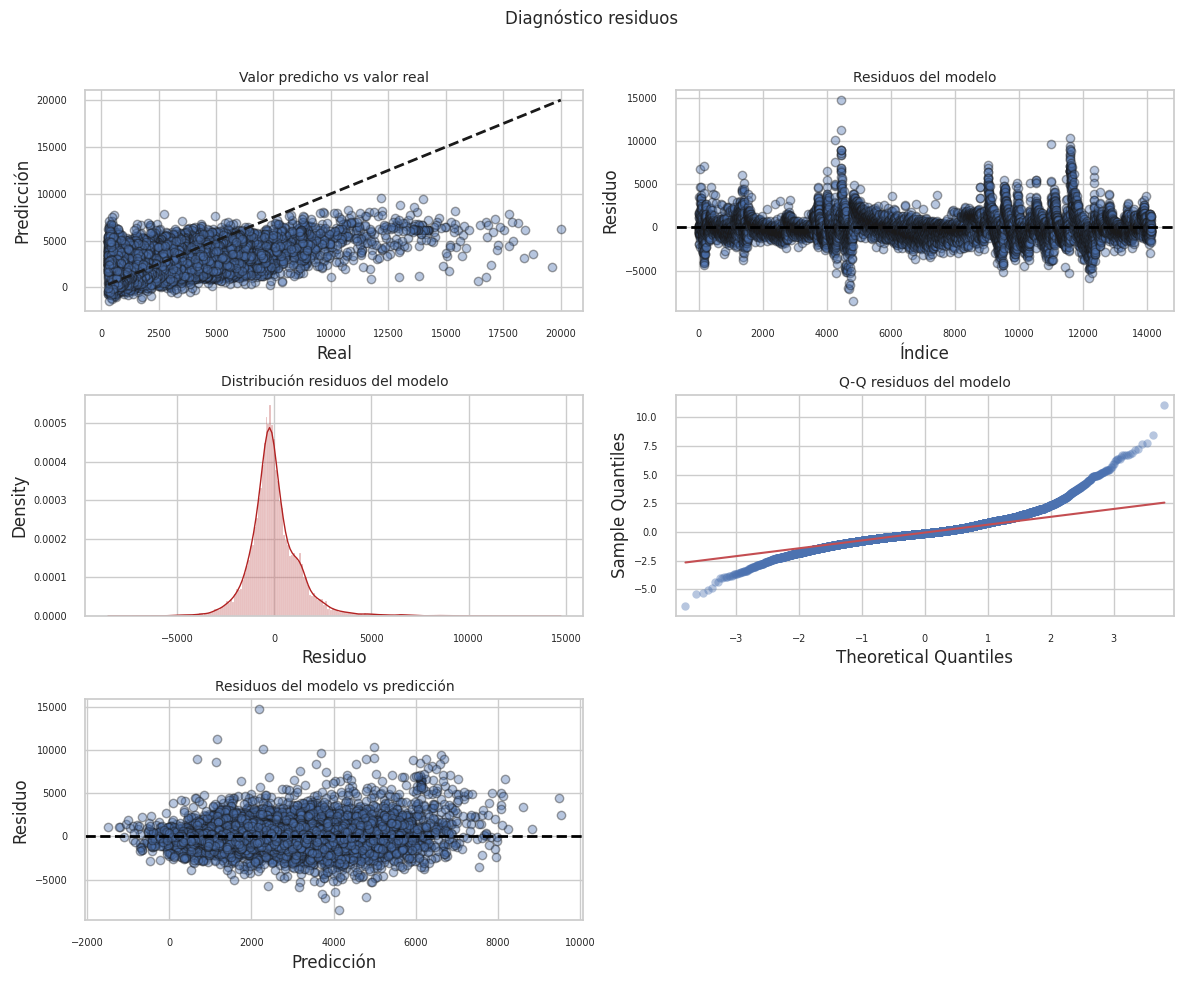

In [153]:
# Residuos del modelo
residuos = modelo_best.resid

# Predicciones de entrenamiento
prediccion_train = modelo_best.predict(X_scaled_df)

# Inspección visual

# Gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Valor predicho vs valor real
axes[0, 0].scatter(y, prediccion_train, edgecolors='k', alpha=0.4)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize=10)
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize=7)

# Residuos del modelo
axes[0, 1].scatter(range(len(y)), residuos, edgecolors='k', alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize=10)
axes[0, 1].set_xlabel('Índice')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize=7)

# Distribución de residuos del modelo
sns.histplot(
    data=residuos,
    stat="density",
    kde=True,
    line_kws={'linewidth': 1},
    color="firebrick",
    alpha=0.3,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Distribución residuos del modelo', fontsize=10)
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize=7)

# Q-Q residuos del modelo
sm.qqplot(
    residuos,
    fit=True,
    line='q',
    ax=axes[1, 1],
    color='firebrick',
    alpha=0.4,
    lw=2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize=10)
axes[1, 1].tick_params(labelsize=7)

# Residuos del modelo vs predicción
axes[2, 0].scatter(prediccion_train, residuos, edgecolors='k', alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize=10)
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize=7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2, 1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12)

# Mostrar gráficos
plt.show()


El análisis de los gráficos de residuos indica que el modelo de regresión se ajusta razonablemente bien a los datos. La mayoría de los supuestos de la regresión lineal parecen cumplirse: los errores se distribuyen de forma aproximadamente normal y no se observan patrones evidentes en los residuos que sugieran problemas graves con el modelo. Sin embargo, se ha detectado heterocedasticidad, lo que significa que la variabilidad de los errores no es constante a lo largo de todos los valores predichos.

Aunque esta limitación es importante, el modelo sigue siendo útil para entender la relación entre las variables estudiadas. Para mejorar la precisión de las predicciones y obtener resultados más confiables, sería beneficioso realizar ajustes adicionales, como explorar transformaciones de las variables o emplear técnicas de modelado que puedan manejar la heterocedasticidad.

### **MODELO DE DATOS BAJO ENFOQUE DE MACHINE LEARNING**

Una de las principales diferencias entre el enfoque de econometría y la Ciencia de Datos por Machine Learning, es que por el enfoque de ML nos centramos en la analítica predictiva más que en las relaciones entre variables. Por ello, que a lo largo de este script no centraremos nuestros esfuerzos en interpretar coeficientes, o encontar relaciones entre variables, sino entrenar de manera óptima a nuestros algoritmos para que alcancen niveles predictivos altos.

Como regla general, los algoritmos de ML son más flexibles que el marco econométrico, ya que nos enfocamos en predecir, por ello muchos de los supuestos que cubrimos en la primera parte no aplican a este enfoque a excepción de que si vamos a aplicar una Regresión Lineal, requerimos haya linealidad en los parámetros ya que scikit learn, que es el module en Python para modelar por ML, ajusta una línea recta a los datos de entrenamiento.

Para la aplicación de nuestro modelo se ocupará el Df que contiene las variables categóricas realizada la transformación numérica

In [154]:
dfmodel.head()

Grupo Etario  Genero  Producto  Con convenio  \
0             0       0         1             1   
1             6       1         0             1   
2             5       0         1             1   
3             1       1         1             1   
4             8       0         1             1   

   Provincia prestador principal  Dias hospitalizacion  Nivel contrato  \
0                              0                     5               5   
1                              0                     4               5   
2                              0                     2               3   
3                              0                     3               7   
4                              1                     1               3   

   Canal Venta  Severidad  Dx Primario  ...  Valor facturado total  \
0            1          1  1766.179307  ...                2192.48   
1            1          1  2166.436154  ...                1979.61   
2            1          1  1976.480000  ...                1976.48   
3            1          1  1766.179307  ...                1791.65   
4            1          1  1766.179307  ...                1450.82   

   Antigüedad Clase  APLICA_PROTESIS  APLICA_HONORARIOS MEDICOS  \
0                 2                0                          1   
1                 4                0                          1   
2                 0                0                          1   
3                 4                0                          1   
4                 4                0                          1   

   APLICA_INSUMOS Y SUMINISTROS  APLICA_LABORATORIOS  APLICA_MEDICINAS  \
0                             1                    1                 1   
1                             1                    1                 1   
2                             1                    1                 1   
3                             0                    1                 1   
4                             1                    1                 1   

   APLICA_OTROS  APLICA_SERVICIOS HOSPITALARIOS  APLICA_TERAPIA INTENSIVA  
0             0                               1                         0  
1             0                               1                         0  
2             0                               1                         0  
3             1                               1                         0  
4             0                               1                         0  

[5 rows x 37 columns]

In [155]:
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14123 entries, 0 to 14221
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Grupo Etario                    14123 non-null  int64  
 1   Genero                          14123 non-null  int64  
 2   Producto                        14123 non-null  int64  
 3   Con convenio                    14123 non-null  int64  
 4   Provincia prestador principal   14123 non-null  int64  
 5   Dias hospitalizacion            14123 non-null  int64  
 6   Nivel contrato                  14123 non-null  int64  
 7   Canal Venta                     14123 non-null  int64  
 8   Severidad                       14123 non-null  int64  
 9   Dx Primario                     14123 non-null  float64
 10  Dx Final                        14123 non-null  float64
 11  Familia dx relacionados         14123 non-null  float64
 12  Agrupacion Dx relacionados      14123

Llamamos a nuestro Df que contiene las variables codificadas y seguimos los siguientes pasos:

1.  Inicializar el modelo

2.  Entrenar el modelo con los datos de entrenamiento

3.  Hacer predicciones

### **MODELOS DE REGRESION CON TODAS LAS VARIABLES**


                        MSE          RMSE           MAE  R^2
Entrenamiento  7.837356e-24  2.799528e-12  2.004080e-12  1.0
Prueba         6.967530e-24  2.639608e-12  1.897866e-12  1.0


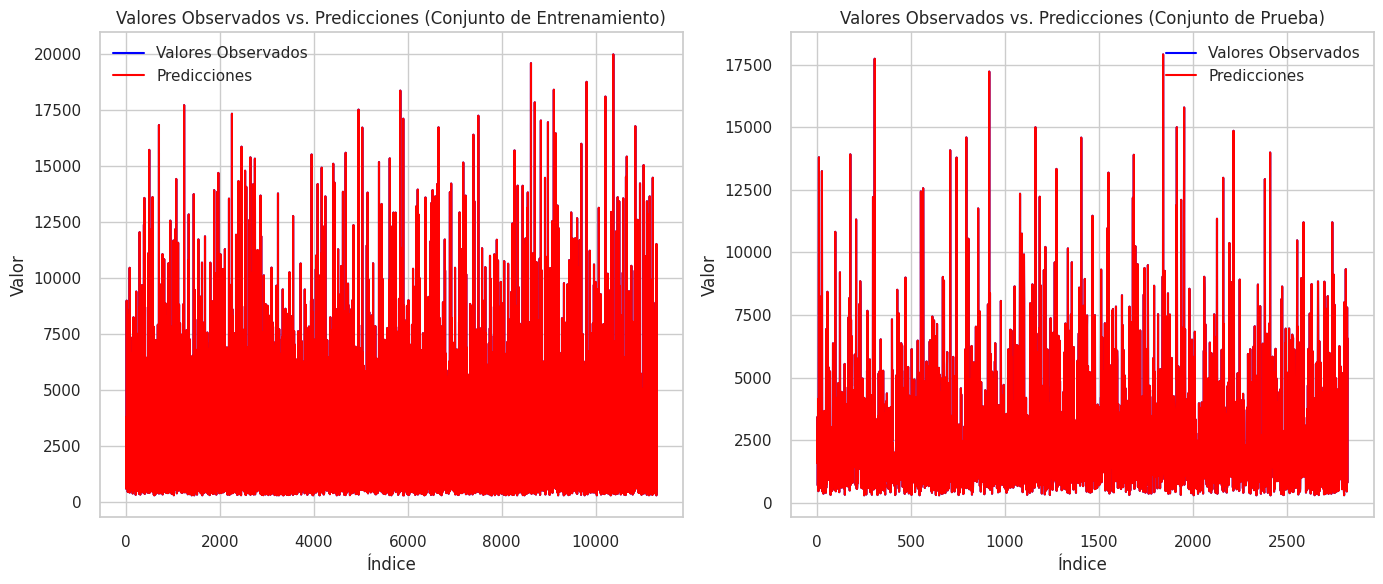

Variables X:
['APLICA_HONORARIOS MEDICOS', 'APLICA_INSUMOS Y SUMINISTROS', 'APLICA_LABORATORIOS', 'APLICA_MEDICINAS', 'APLICA_OTROS', 'APLICA_PROTESIS', 'APLICA_SERVICIOS HOSPITALARIOS', 'APLICA_TERAPIA INTENSIVA', 'Agrupacion Dx relacionados', 'Antigüedad Clase', 'Canal Venta', 'Con convenio', 'Dias hospitalizacion', 'Dx Final', 'Dx Primario', 'EmergenciaVital', 'Familia dx relacionados', 'Genero', 'Grupo Etario', 'HONORARIOS MEDICOS', 'INSUMOS Y SUMINISTROS', 'LABORATORIOS', 'MEDICINAS', 'Nivel contrato', 'OTROS', 'PROTESIS', 'Preexistencia', 'Producto', 'Provincia prestador principal', 'SERVICIOS HOSPITALARIOS', 'Severidad', 'TERAPIA INTENSIVA', 'Terapia Intensiva', 'Tipo procedimiento', 'Tipo transaccion', 'Tipo tratamiento']

Variable y:
Valor facturado total


In [156]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Suponiendo que dfmodel es tu DataFrame original
# Crear una copia del DataFrame original
df_completo = dfmodel.copy()

# Separar los predictores y la variable objetivo
X = df_completo[df_completo.columns.difference(['Valor facturado total'])]
y = df_completo['Valor facturado total']

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=123)

# Inicializar el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

# Calcular métricas de evaluación
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)

RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)

r_square_train = r2_score(y_train, predicciones_train)
r_square_test = r2_score(y_test, predicciones_test)

# Crear un DataFrame con las métricas
metricas_df = pd.DataFrame({
    'MSE': [MSE_train, MSE_test],
    'RMSE': [RMSE_train, RMSE_test],
    'MAE': [MAE_train, MAE_test],
    'R^2': [r_square_train, r_square_test]
}, index=['Entrenamiento', 'Prueba'])

# Mostrar el DataFrame con las métricas
print(metricas_df)

# Visualizar predicciones vs. observaciones en los conjuntos de entrenamiento y prueba
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(y_train.values, label='Valores Observados', color='blue')
ax1.plot(predicciones_train, label='Predicciones', color='red')
ax1.set_title('Valores Observados vs. Predicciones (Conjunto de Entrenamiento)')
ax1.legend()
ax1.set_xlabel('Índice')
ax1.set_ylabel('Valor')

ax2.plot(y_test.values, label='Valores Observados', color='blue')
ax2.plot(predicciones_test, label='Predicciones', color='red')
ax2.set_title('Valores Observados vs. Predicciones (Conjunto de Prueba)')
ax2.legend()
ax2.set_xlabel('Índice')
ax2.set_ylabel('Valor')

plt.tight_layout()
plt.show()

# Imprimir nombres de las variables
print("Variables X:")
print(df_completo[df_completo.columns.difference(['Valor facturado total'])].columns.tolist())
print("\nVariable y:")
print(y.name)



Tal como lo vimos en la primera parte, el modelo se ajusta perfectamente esto porque las variables que tienen los valores por rubros están en base al valor facturado.

Por esta razón, se debe excluir esas variables en este enfoque.


**MODELOS APLICADO A TODAS LAS VARIABLES (EXCLUTE VALORES POR RUBRO**

**REGRESION LINEAL**

Métricas para Modelo2:
Entrenamiento:
  MSE: 1.78e+06
  RMSE: 1332.38
  MAE: 913.93
  R^2: 0.6927
Prueba:
  MSE: 1.73e+06
  RMSE: 1316.42
  MAE: 910.89
  R^2: 0.6778


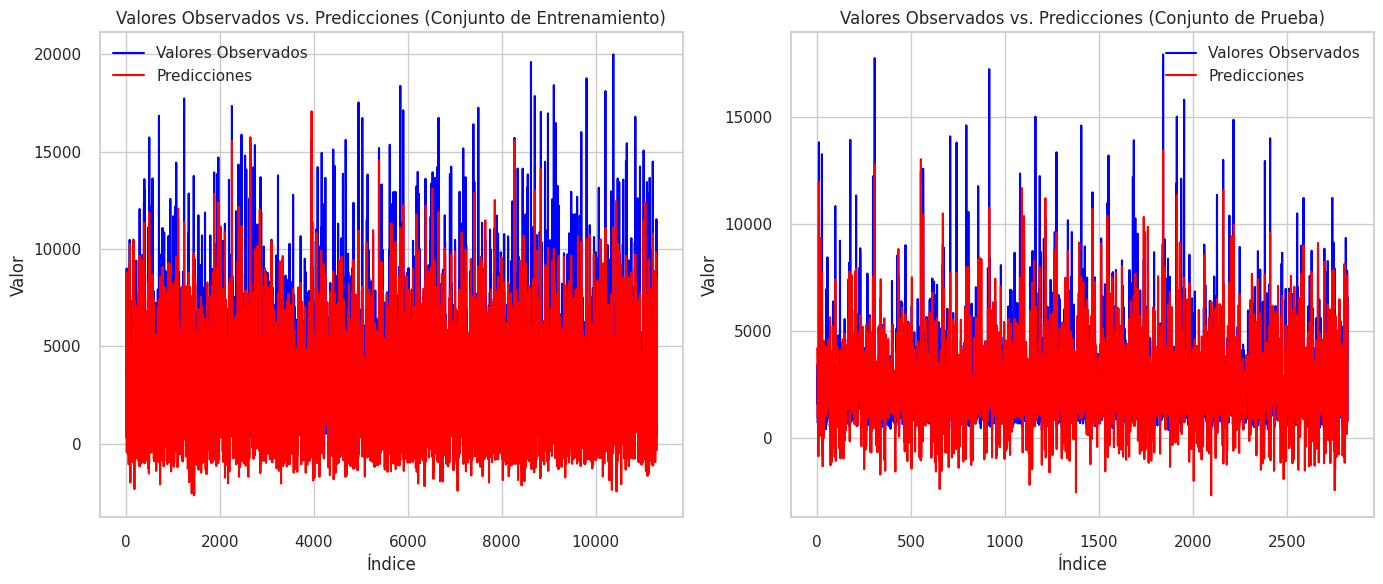

Variables X:
['APLICA_HONORARIOS MEDICOS', 'APLICA_INSUMOS Y SUMINISTROS', 'APLICA_LABORATORIOS', 'APLICA_MEDICINAS', 'APLICA_OTROS', 'APLICA_PROTESIS', 'APLICA_SERVICIOS HOSPITALARIOS', 'APLICA_TERAPIA INTENSIVA', 'Agrupacion Dx relacionados', 'Antigüedad Clase', 'Canal Venta', 'Con convenio', 'Dias hospitalizacion', 'Dx Final', 'Dx Primario', 'EmergenciaVital', 'Familia dx relacionados', 'Genero', 'Grupo Etario', 'Nivel contrato', 'Preexistencia', 'Producto', 'Provincia prestador principal', 'Severidad', 'Tipo procedimiento', 'Tipo transaccion', 'Tipo tratamiento']

Variable y:
Valor facturado total


In [157]:
# Crear una copia del DataFrame original
df_completo = dfmodel.copy()

# Variables a excluir
variables_excluir = ['PROTESIS', 'HONORARIOS MEDICOS', 'INSUMOS Y SUMINISTROS', 'LABORATORIOS', 'MEDICINAS', 'OTROS', 'SERVICIOS HOSPITALARIOS', 'TERAPIA INTENSIVA','Terapia Intensiva']

# Separar los predictores y la variable objetivo excluyendo las variables especificadas
X = df_completo[df_completo.columns.difference(['Valor facturado total'] + variables_excluir)]
y = df_completo['Valor facturado total']

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=123)

# Inicializar el modelo de regresión lineal para Modelo2
Modelo2 = LinearRegression()

# Entrenar el modelo
Modelo2.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba
predicciones_train_Modelo2 = Modelo2.predict(X_train)
predicciones_test_Modelo2 = Modelo2.predict(X_test)

# Calcular métricas de evaluación
MSE_train_Modelo2 = mean_squared_error(y_train, predicciones_train_Modelo2)
MSE_test_Modelo2 = mean_squared_error(y_test, predicciones_test_Modelo2)

RMSE_train_Modelo2 = np.sqrt(MSE_train_Modelo2)
RMSE_test_Modelo2 = np.sqrt(MSE_test_Modelo2)

MAE_train_Modelo2 = mean_absolute_error(y_train, predicciones_train_Modelo2)
MAE_test_Modelo2 = mean_absolute_error(y_test, predicciones_test_Modelo2)

r_square_train_Modelo2 = r2_score(y_train, predicciones_train_Modelo2)
r_square_test_Modelo2 = r2_score(y_test, predicciones_test_Modelo2)

# Mostrar las métricas para Modelo2
print("Métricas para Modelo2:")
print(f"Entrenamiento:")
print(f"  MSE: {MSE_train_Modelo2:.2e}")
print(f"  RMSE: {RMSE_train_Modelo2:.2f}")
print(f"  MAE: {MAE_train_Modelo2:.2f}")
print(f"  R^2: {r_square_train_Modelo2:.4f}")

print(f"Prueba:")
print(f"  MSE: {MSE_test_Modelo2:.2e}")
print(f"  RMSE: {RMSE_test_Modelo2:.2f}")
print(f"  MAE: {MAE_test_Modelo2:.2f}")
print(f"  R^2: {r_square_test_Modelo2:.4f}")

# Visualizar predicciones vs. observaciones en los conjuntos de entrenamiento y prueba
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(y_train.values, label='Valores Observados', color='blue')
ax1.plot(predicciones_train_Modelo2, label='Predicciones', color='red')
ax1.set_title('Valores Observados vs. Predicciones (Conjunto de Entrenamiento)')
ax1.legend()
ax1.set_xlabel('Índice')
ax1.set_ylabel('Valor')

ax2.plot(y_test.values, label='Valores Observados', color='blue')
ax2.plot(predicciones_test_Modelo2, label='Predicciones', color='red')
ax2.set_title('Valores Observados vs. Predicciones (Conjunto de Prueba)')
ax2.legend()
ax2.set_xlabel('Índice')
ax2.set_ylabel('Valor')

plt.tight_layout()
plt.show()

# Imprimir nombres de las variables
print("Variables X:")
print(X.columns.tolist())
print("\nVariable y:")
print(y.name)



**REGRESION LASSO**

Métricas para Modelo3:
Entrenamiento:
  MSE: 1.78e+06
  RMSE: 1332.38
  MAE: 913.91
  R^2: 0.6927
Prueba:
  MSE: 1.73e+06
  RMSE: 1316.38
  MAE: 910.85
  R^2: 0.6778


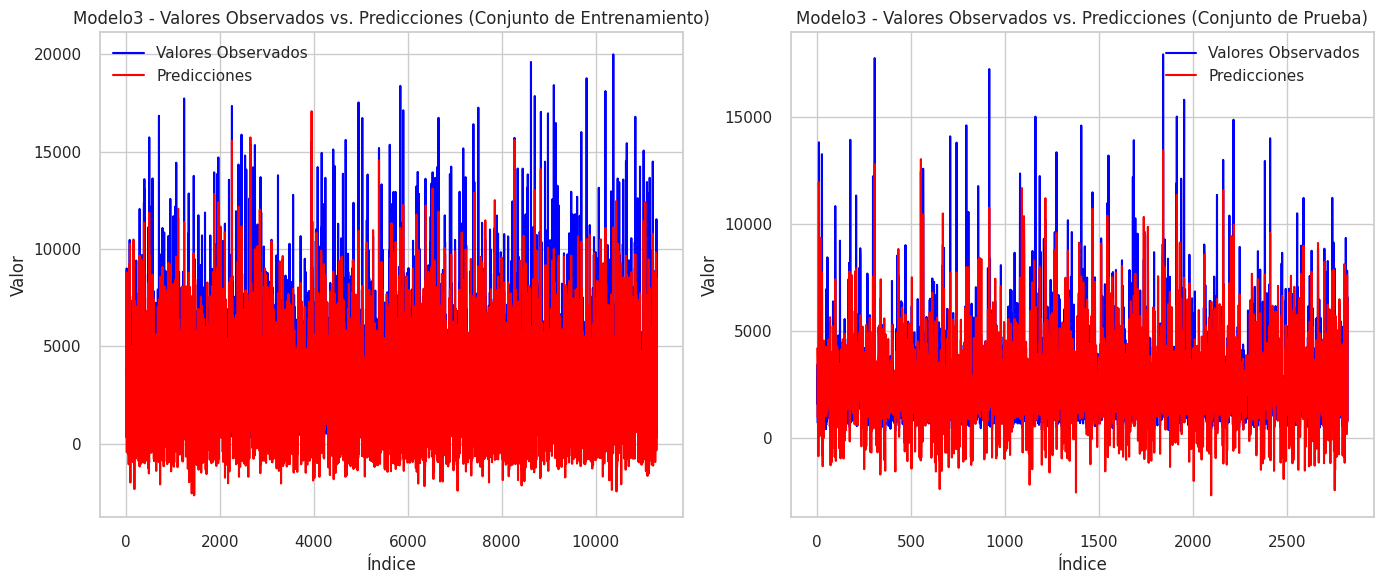

Variables X:
['APLICA_HONORARIOS MEDICOS', 'APLICA_INSUMOS Y SUMINISTROS', 'APLICA_LABORATORIOS', 'APLICA_MEDICINAS', 'APLICA_OTROS', 'APLICA_PROTESIS', 'APLICA_SERVICIOS HOSPITALARIOS', 'APLICA_TERAPIA INTENSIVA', 'Agrupacion Dx relacionados', 'Antigüedad Clase', 'Canal Venta', 'Con convenio', 'Dias hospitalizacion', 'Dx Final', 'Dx Primario', 'EmergenciaVital', 'Familia dx relacionados', 'Genero', 'Grupo Etario', 'Nivel contrato', 'Preexistencia', 'Producto', 'Provincia prestador principal', 'Severidad', 'Tipo procedimiento', 'Tipo transaccion', 'Tipo tratamiento']

Variable y:
Valor facturado total


In [158]:

# Inicializar el modelo de regresión Lasso para Modelo3
Modelo3 = Lasso(alpha=0.1)  # Puedes ajustar el parámetro alpha según sea necesario

# Entrenar el modelo
Modelo3.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba
predicciones_train_Modelo3 = Modelo3.predict(X_train)
predicciones_test_Modelo3 = Modelo3.predict(X_test)

# Calcular métricas de evaluación para Modelo3
MSE_train_Modelo3 = mean_squared_error(y_train, predicciones_train_Modelo3)
MSE_test_Modelo3 = mean_squared_error(y_test, predicciones_test_Modelo3)

RMSE_train_Modelo3 = np.sqrt(MSE_train_Modelo3)
RMSE_test_Modelo3 = np.sqrt(MSE_test_Modelo3)

MAE_train_Modelo3 = mean_absolute_error(y_train, predicciones_train_Modelo3)
MAE_test_Modelo3 = mean_absolute_error(y_test, predicciones_test_Modelo3)

r_square_train_Modelo3 = r2_score(y_train, predicciones_train_Modelo3)
r_square_test_Modelo3 = r2_score(y_test, predicciones_test_Modelo3)

# Mostrar las métricas para Modelo3
print("Métricas para Modelo3:")
print(f"Entrenamiento:")
print(f"  MSE: {MSE_train_Modelo3:.2e}")
print(f"  RMSE: {RMSE_train_Modelo3:.2f}")
print(f"  MAE: {MAE_train_Modelo3:.2f}")
print(f"  R^2: {r_square_train_Modelo3:.4f}")

print(f"Prueba:")
print(f"  MSE: {MSE_test_Modelo3:.2e}")
print(f"  RMSE: {RMSE_test_Modelo3:.2f}")
print(f"  MAE: {MAE_test_Modelo3:.2f}")
print(f"  R^2: {r_square_test_Modelo3:.4f}")

# Visualizar predicciones vs. observaciones en los conjuntos de entrenamiento y prueba para Modelo3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(y_train.values, label='Valores Observados', color='blue')
ax1.plot(predicciones_train_Modelo3, label='Predicciones', color='red')
ax1.set_title('Modelo3 - Valores Observados vs. Predicciones (Conjunto de Entrenamiento)')
ax1.legend()
ax1.set_xlabel('Índice')
ax1.set_ylabel('Valor')

ax2.plot(y_test.values, label='Valores Observados', color='blue')
ax2.plot(predicciones_test_Modelo3, label='Predicciones', color='red')
ax2.set_title('Modelo3 - Valores Observados vs. Predicciones (Conjunto de Prueba)')
ax2.legend()
ax2.set_xlabel('Índice')
ax2.set_ylabel('Valor')

plt.tight_layout()
plt.show()

# Imprimir nombres de las variables
print("Variables X:")
print(X.columns.tolist())
print("\nVariable y:")
print(y.name)


**REGRESION RIDGE**

Métricas para Modelo4:
Entrenamiento:
  MSE: 1.78e+06
  RMSE: 1332.38
  MAE: 913.93
  R^2: 0.6927
Prueba:
  MSE: 1.73e+06
  RMSE: 1316.42
  MAE: 910.89
  R^2: 0.6778


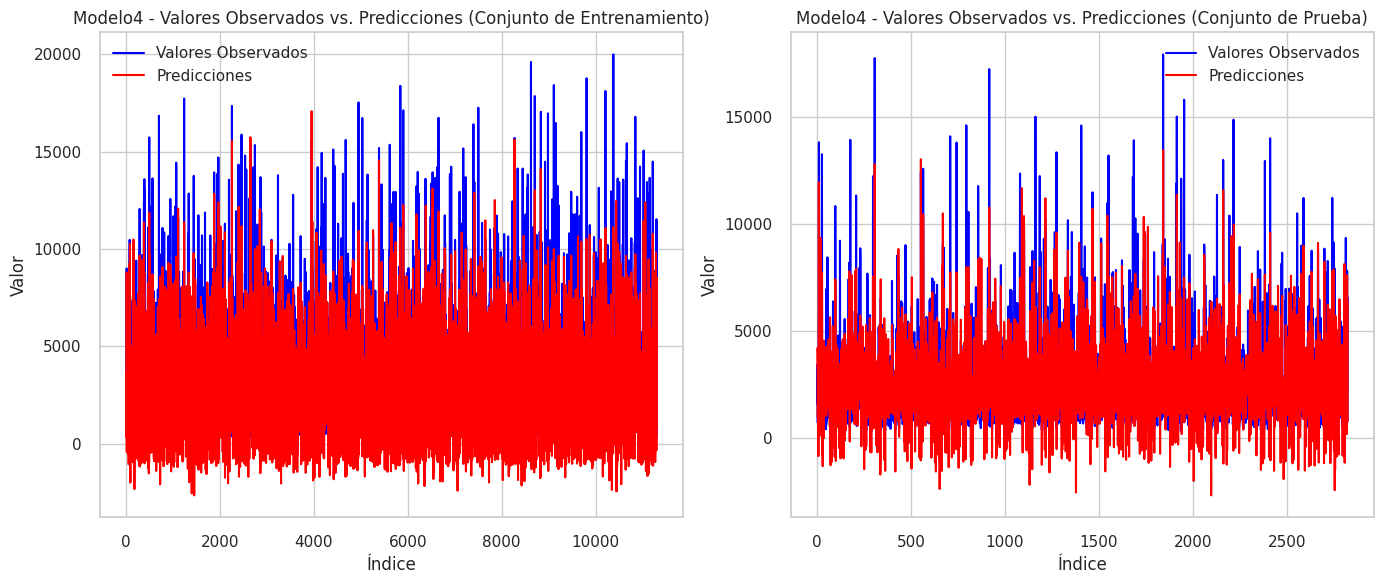

Variables X:
['APLICA_HONORARIOS MEDICOS', 'APLICA_INSUMOS Y SUMINISTROS', 'APLICA_LABORATORIOS', 'APLICA_MEDICINAS', 'APLICA_OTROS', 'APLICA_PROTESIS', 'APLICA_SERVICIOS HOSPITALARIOS', 'APLICA_TERAPIA INTENSIVA', 'Agrupacion Dx relacionados', 'Antigüedad Clase', 'Canal Venta', 'Con convenio', 'Dias hospitalizacion', 'Dx Final', 'Dx Primario', 'EmergenciaVital', 'Familia dx relacionados', 'Genero', 'Grupo Etario', 'Nivel contrato', 'Preexistencia', 'Producto', 'Provincia prestador principal', 'Severidad', 'Tipo procedimiento', 'Tipo transaccion', 'Tipo tratamiento']

Variable y:
Valor facturado total


In [159]:
# Inicializar el modelo de regresión Lasso para Modelo3
Modelo4 = Ridge(alpha=0.1)  # Puedes ajustar el parámetro alpha según sea necesario
# Entrenar el modelo
Modelo4.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba
predicciones_train_Modelo4 = Modelo4.predict(X_train)
predicciones_test_Modelo4 = Modelo4.predict(X_test)

# Calcular métricas de evaluación para Modelo4
MSE_train_Modelo4 = mean_squared_error(y_train, predicciones_train_Modelo4)
MSE_test_Modelo4 = mean_squared_error(y_test, predicciones_test_Modelo4)

RMSE_train_Modelo4 = np.sqrt(MSE_train_Modelo4)
RMSE_test_Modelo4 = np.sqrt(MSE_test_Modelo4)

MAE_train_Modelo4 = mean_absolute_error(y_train, predicciones_train_Modelo4)
MAE_test_Modelo4 = mean_absolute_error(y_test, predicciones_test_Modelo4)

r_square_train_Modelo4 = r2_score(y_train, predicciones_train_Modelo4)
r_square_test_Modelo4 = r2_score(y_test, predicciones_test_Modelo4)

# Mostrar las métricas para Modelo4
print("Métricas para Modelo4:")
print(f"Entrenamiento:")
print(f"  MSE: {MSE_train_Modelo4:.2e}")
print(f"  RMSE: {RMSE_train_Modelo4:.2f}")
print(f"  MAE: {MAE_train_Modelo4:.2f}")
print(f"  R^2: {r_square_train_Modelo4:.4f}")

print(f"Prueba:")
print(f"  MSE: {MSE_test_Modelo4:.2e}")
print(f"  RMSE: {RMSE_test_Modelo4:.2f}")
print(f"  MAE: {MAE_test_Modelo4:.2f}")
print(f"  R^2: {r_square_test_Modelo4:.4f}")

# Visualizar predicciones vs. observaciones en los conjuntos de entrenamiento y prueba para Modelo4
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(y_train.values, label='Valores Observados', color='blue')
ax1.plot(predicciones_train_Modelo4, label='Predicciones', color='red')
ax1.set_title('Modelo4 - Valores Observados vs. Predicciones (Conjunto de Entrenamiento)')
ax1.legend()
ax1.set_xlabel('Índice')
ax1.set_ylabel('Valor')

ax2.plot(y_test.values, label='Valores Observados', color='blue')
ax2.plot(predicciones_test_Modelo4, label='Predicciones', color='red')
ax2.set_title('Modelo4 - Valores Observados vs. Predicciones (Conjunto de Prueba)')
ax2.legend()
ax2.set_xlabel('Índice')
ax2.set_ylabel('Valor')

plt.tight_layout()
plt.show()

# Imprimir nombres de las variables
print("Variables X:")
print(X.columns.tolist())
print("\nVariable y:")
print(y.name)


**REGRESION LINEAL APLICANDO UN PCA**

Métricas para Modelo5:
Entrenamiento:
  MSE: 1.90e+06
  RMSE: 1378.26
  MAE: 965.45
  R^2: 0.6712
Prueba:
  MSE: 1.83e+06
  RMSE: 1352.97
  MAE: 964.85
  R^2: 0.6597


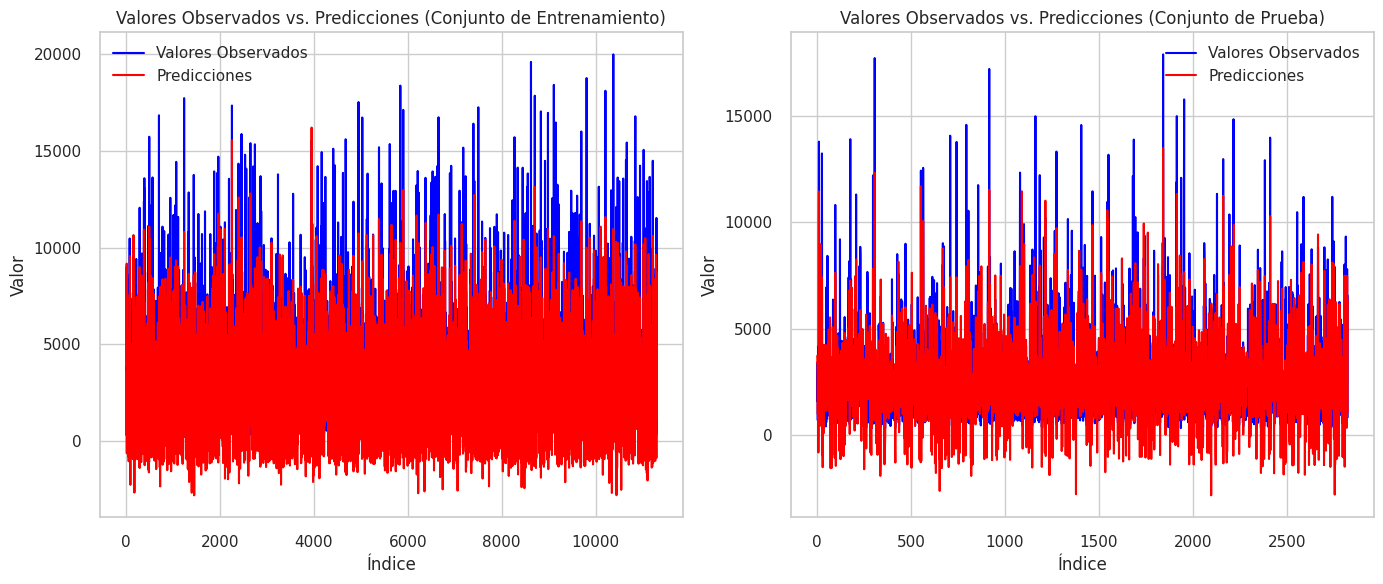

In [160]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Inicializar el modelo de regresión lineal para Modelo5
Modelo5 = LinearRegression()

# Entrenar el modelo
Modelo5.fit(X_train_pca, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba
predicciones_train_pca = Modelo5.predict(X_train_pca)
predicciones_test_pca = Modelo5.predict(X_test_pca)

# Calcular métricas de evaluación
MSE_train_Modelo5 = mean_squared_error(y_train, predicciones_train_pca)
MSE_test_Modelo5 = mean_squared_error(y_test, predicciones_test_pca)

RMSE_train_Modelo5 = np.sqrt(MSE_train_Modelo5)
RMSE_test_Modelo5 = np.sqrt(MSE_test_Modelo5)

MAE_train_Modelo5 = mean_absolute_error(y_train, predicciones_train_pca)
MAE_test_Modelo5 = mean_absolute_error(y_test, predicciones_test_pca)

r_square_train_Modelo5 = r2_score(y_train, predicciones_train_pca)
r_square_test_Modelo5 = r2_score(y_test, predicciones_test_pca)

# Imprimir las métricas para Modelo5
print("Métricas para Modelo5:")
print(f"Entrenamiento:")
print(f"  MSE: {MSE_train_Modelo5:.2e}")
print(f"  RMSE: {RMSE_train_Modelo5:.2f}")
print(f"  MAE: {MAE_train_Modelo5:.2f}")
print(f"  R^2: {r_square_train_Modelo5:.4f}")

print(f"Prueba:")
print(f"  MSE: {MSE_test_Modelo5:.2e}")
print(f"  RMSE: {RMSE_test_Modelo5:.2f}")
print(f"  MAE: {MAE_test_Modelo5:.2f}")
print(f"  R^2: {r_square_test_Modelo5:.4f}")

# Visualizar predicciones vs. observaciones en los conjuntos de entrenamiento y prueba
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(y_train.values, label='Valores Observados', color='blue')
ax1.plot(predicciones_train_pca, label='Predicciones', color='red')
ax1.set_title('Valores Observados vs. Predicciones (Conjunto de Entrenamiento)')
ax1.legend()
ax1.set_xlabel('Índice')
ax1.set_ylabel('Valor')

ax2.plot(y_test.values, label='Valores Observados', color='blue')
ax2.plot(predicciones_test_pca, label='Predicciones', color='red')
ax2.set_title('Valores Observados vs. Predicciones (Conjunto de Prueba)')
ax2.legend()
ax2.set_xlabel('Índice')
ax2.set_ylabel('Valor')

plt.tight_layout()
plt.show()


### **Evaluemos los resultados**

In [161]:
# Crear un DataFrame para almacenar las métricas de todos los modelos
metricas_modelos = pd.DataFrame({
    'MSE': [MSE_train_Modelo2, MSE_test_Modelo2, MSE_train_Modelo3, MSE_test_Modelo3, MSE_train_Modelo4, MSE_test_Modelo4, MSE_train_Modelo5, MSE_test_Modelo5],
    'RMSE': [RMSE_train_Modelo2, RMSE_test_Modelo2, RMSE_train_Modelo3, RMSE_test_Modelo3, RMSE_train_Modelo4, RMSE_test_Modelo4, RMSE_train_Modelo5, RMSE_test_Modelo5],
    'MAE': [MAE_train_Modelo2, MAE_test_Modelo2, MAE_train_Modelo3, MAE_test_Modelo3, MAE_train_Modelo4, MAE_test_Modelo4, MAE_train_Modelo5, MAE_test_Modelo5],
    'R^2': [r_square_train_Modelo2, r_square_test_Modelo2, r_square_train_Modelo3, r_square_test_Modelo3, r_square_train_Modelo4, r_square_test_Modelo4, r_square_train_Modelo5, r_square_test_Modelo5]
}, index=[
    'lr_Entrenamiento', 'lr_Prueba',
    'Lasso_Entrenamiento', 'Lasso_Prueba',
    'Ridge_Entrenamiento', 'Ridge_Prueba',
    'PCA_Entrenamiento', 'PCA_Prueba'
])

# Mostrar el DataFrame con las métricas
print("Métricas de todos los Modelos:")
print(metricas_modelos)


Métricas de todos los Modelos:
                              MSE         RMSE         MAE       R^2
lr_Entrenamiento     1.775249e+06  1332.384573  913.931034  0.692707
lr_Prueba            1.732954e+06  1316.416917  910.894286  0.677826
Lasso_Entrenamiento  1.775249e+06  1332.384797  913.909549  0.692707
Lasso_Prueba         1.732849e+06  1316.377313  910.853098  0.677846
Ridge_Entrenamiento  1.775249e+06  1332.384573  913.930920  0.692707
Ridge_Prueba         1.732950e+06  1316.415476  910.894081  0.677827
PCA_Entrenamiento    1.899591e+06  1378.256457  965.449395  0.671183
PCA_Prueba           1.830529e+06  1352.970292  964.853864  0.659686


### **MODELOS DE REGRESION CON CON VARIABLES IMPORTANTES**

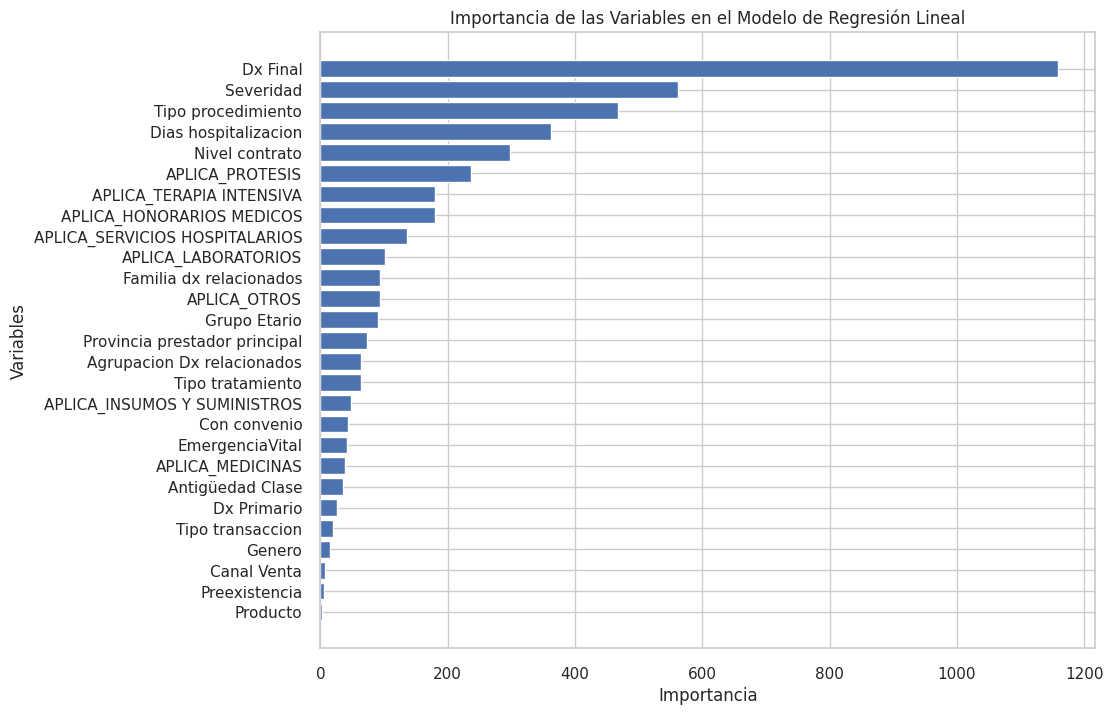

In [162]:
# Crear gráfico de importancia de las variables
importancia_variables = np.abs(Modelo2.coef_)
features = X.columns

# Crear DataFrame para organizar los datos
df_importancia = pd.DataFrame({
    'Feature': features,
    'Importance': importancia_variables
})

# Ordenar por importancia
df_importancia = df_importancia.sort_values(by='Importance', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(df_importancia['Feature'], df_importancia['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las Variables en el Modelo de Regresión Lineal')
plt.gca().invert_yaxis()
plt.show()

Métricas para Modelo5:
Entrenamiento:
  MSE: 1.79e+06
  RMSE: 1337.12
  MAE: 917.96
  R^2: 0.6905
Prueba:
  MSE: 1.75e+06
  RMSE: 1321.47
  MAE: 915.04
  R^2: 0.6753


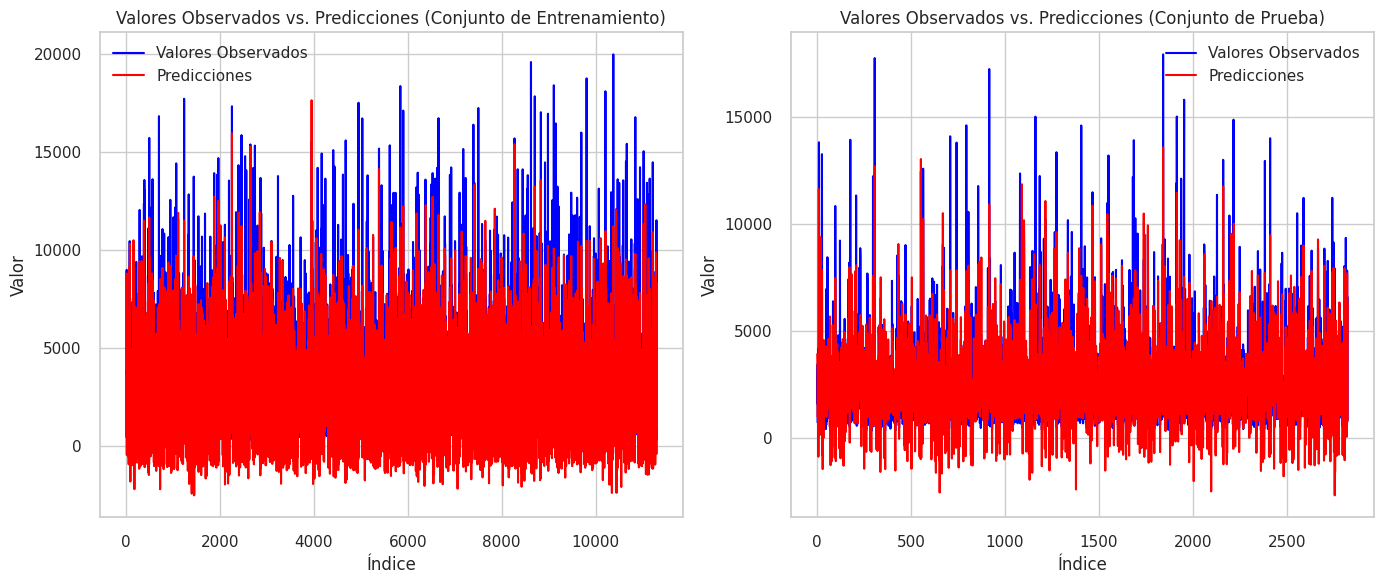

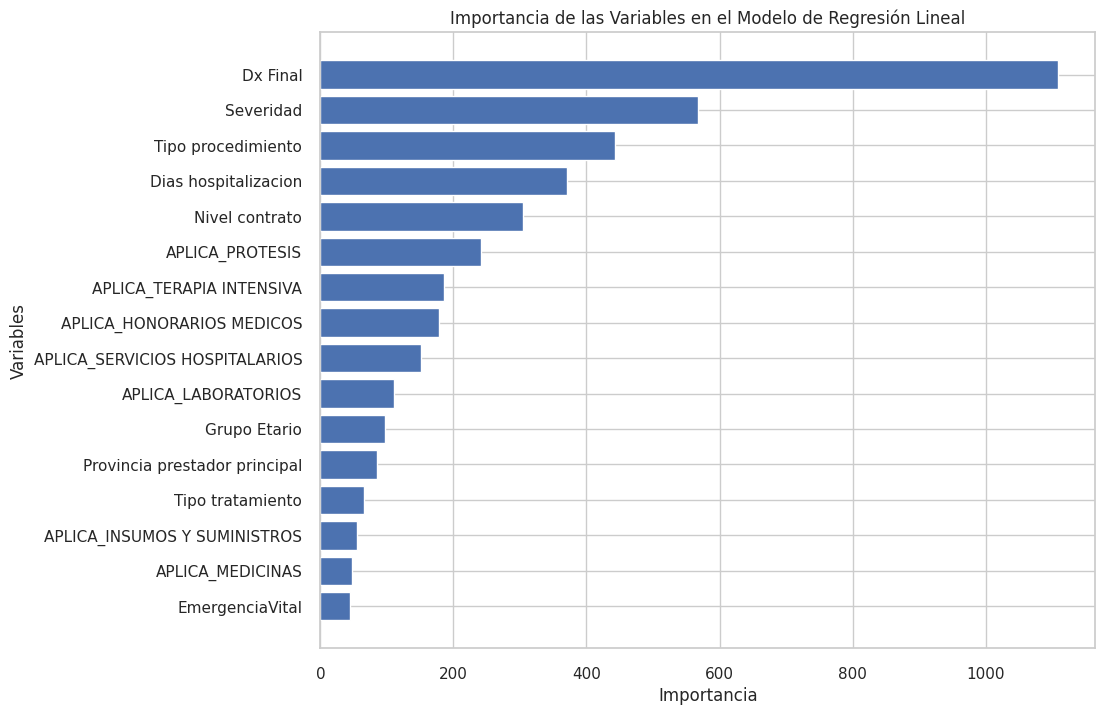

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Crear una copia del DataFrame original
df_completo = dfmodel.copy()

# Definir las variables a excluir
variables_excluir = ['Valor facturado total', 'PROTESIS', 'HONORARIOS MEDICOS', 'INSUMOS Y SUMINISTROS',
                     'LABORATORIOS', 'MEDICINAS', 'OTROS', 'SERVICIOS HOSPITALARIOS', 'TERAPIA INTENSIVA','APLICA_OTROS',
                     'Dx Primario', 'Familia dx relacionados', 'Agrupacion Dx relacionados', 'Terapia Intensiva',
                     'Producto','Canal Venta','Preexistencia','Tipo transaccion','Genero','Antigüedad Clase','Con convenio']

# Separar los predictores y la variable objetivo excluyendo las variables especificadas
X = df_completo.drop(columns=variables_excluir)
y = df_completo['Valor facturado total']

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=123)

# Inicializar el modelo de regresión lineal para Modelo5
Modelo5 = LinearRegression()

# Entrenar el modelo
Modelo5.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba
predicciones_train_Modelo5 = Modelo5.predict(X_train)
predicciones_test_Modelo5 = Modelo5.predict(X_test)

# Calcular métricas de evaluación
MSE_train_Modelo5 = mean_squared_error(y_train, predicciones_train_Modelo5)
MSE_test_Modelo5 = mean_squared_error(y_test, predicciones_test_Modelo5)

RMSE_train_Modelo5 = np.sqrt(MSE_train_Modelo5)
RMSE_test_Modelo5 = np.sqrt(MSE_test_Modelo5)

MAE_train_Modelo5 = mean_absolute_error(y_train, predicciones_train_Modelo5)
MAE_test_Modelo5 = mean_absolute_error(y_test, predicciones_test_Modelo5)

r_square_train_Modelo5 = r2_score(y_train, predicciones_train_Modelo5)
r_square_test_Modelo5 = r2_score(y_test, predicciones_test_Modelo5)

# Mostrar las métricas para Modelo5
print("Métricas para Modelo5:")
print(f"Entrenamiento:")
print(f"  MSE: {MSE_train_Modelo5:.2e}")
print(f"  RMSE: {RMSE_train_Modelo5:.2f}")
print(f"  MAE: {MAE_train_Modelo5:.2f}")
print(f"  R^2: {r_square_train_Modelo5:.4f}")

print(f"Prueba:")
print(f"  MSE: {MSE_test_Modelo5:.2e}")
print(f"  RMSE: {RMSE_test_Modelo5:.2f}")
print(f"  MAE: {MAE_test_Modelo5:.2f}")
print(f"  R^2: {r_square_test_Modelo5:.4f}")

# Visualizar predicciones vs. observaciones en los conjuntos de entrenamiento y prueba
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(y_train.values, label='Valores Observados', color='blue')
ax1.plot(predicciones_train_Modelo5, label='Predicciones', color='red')
ax1.set_title('Valores Observados vs. Predicciones (Conjunto de Entrenamiento)')
ax1.legend()
ax1.set_xlabel('Índice')
ax1.set_ylabel('Valor')

ax2.plot(y_test.values, label='Valores Observados', color='blue')
ax2.plot(predicciones_test_Modelo5, label='Predicciones', color='red')
ax2.set_title('Valores Observados vs. Predicciones (Conjunto de Prueba)')
ax2.legend()
ax2.set_xlabel('Índice')
ax2.set_ylabel('Valor')

plt.tight_layout()
plt.show()

# Crear gráfico de importancia de las variables
importancia_variables = np.abs(Modelo5.coef_)
features = X.columns

# Crear DataFrame para organizar los datos
df_importancia = pd.DataFrame({
    'Feature': features,
    'Importance': importancia_variables
})

# Ordenar por importancia
df_importancia = df_importancia.sort_values(by='Importance', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(df_importancia['Feature'], df_importancia['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las Variables en el Modelo de Regresión Lineal')
plt.gca().invert_yaxis()
plt.show()



.

### **PROPUESTA**

**MODELO DE REGRESION LINEAL APLICADO A DX CON MAYOR FRECUENCIA**

Uno de los inconvenientes que se puede presentar es que dentro de nuestro data set tengamos diagnósticos que no sean frecuentes, por lo tanto pueden dificultar nuestro análisis.

Este estudio se va a centrar en los 50 diagnosticos más frecuentes.

In [164]:
import pandas as pd

# Supongamos que df_nuevo ya está definido

# Contar el número de casos por 'Dx Final'
conteo_dx_final = df_nuevo['Dx Final'].value_counts()

# Seleccionar los 50 'Dx Final' con más casos
top_50_dx_final = conteo_dx_final.head(50).index

# Filtrar el DataFrame original para incluir solo los registros correspondientes a esos 50 'Dx Final'
df_top_50 = df_nuevo[df_nuevo['Dx Final'].isin(top_50_dx_final)]

# Mostrar el DataFrame resultante
print("DataFrame con los 50 'Dx Final' con más casos:")


# Verificar el número de registros en el nuevo DataFrame
df_top_50.head()


DataFrame con los 50 'Dx Final' con más casos:


Fecha Incurrencia Fecha inicio vigencia  Antigüedad cliente meses  \
243        2024-01-02            1994-10-31                       350   
244        2024-05-03            2021-08-16                        32   
245        2023-05-23            2019-09-16                        44   
246        2023-05-27            2019-08-26                        45   
247        2023-11-30            2017-02-06                        81   

     Edad Paciente  Grupo Etario     Genero Provincia Cliente    Producto  \
243             89   70 - + Años   Femenino         Pichincha  INDIVIDUAL   
244             67  66 - 70 Años   Femenino         Pichincha  INDIVIDUAL   
245             73   70 - + Años  Masculino         Pichincha  INDIVIDUAL   
246             63  61 - 65 Años  Masculino         Pichincha  INDIVIDUAL   
247             69  66 - 70 Años   Femenino         Pichincha  INDIVIDUAL   

    Tipo prestador principal Con convenio  ...  Año-Mes  Antigüedad Clase  \
243                 Hospital           Si  ...  2024-01   más de 36 meses   
244                 Hospital           Si  ...  2024-05     25 a 36 meses   
245                 Hospital           Si  ...  2023-05   más de 36 meses   
246                 Hospital           Si  ...  2023-05   más de 36 meses   
247                 Hospital           Si  ...  2023-11   más de 36 meses   

     APLICA_PROTESIS APLICA_HONORARIOS MEDICOS APLICA_INSUMOS Y SUMINISTROS  \
243                0                         1                            1   
244                0                         1                            1   
245                0                         1                            1   
246                0                         1                            1   
247                0                         1                            1   

    APLICA_LABORATORIOS APLICA_MEDICINAS APLICA_OTROS  \
243                   1                1            1   
244                   1                1            1   
245                   1                1            0   
246                   1                1            1   
247                   1                1            1   

    APLICA_SERVICIOS HOSPITALARIOS APLICA_TERAPIA INTENSIVA  
243                              1                        0  
244                              1                        0  
245                              1                        0  
246                              1                        0  
247                              1                        0  

[5 rows x 46 columns]

**Obtenemos los descriptivos de nuestra Variable Objetivo**


In [165]:
# Definir una función para calcular los percentiles específicos
def percentiles(x):
    return pd.Series({
        'count': x.count(),
        'mean': x.mean(),
        'std': x.std(),
        'min': x.min(),
        '25%': x.quantile(0.25),
        '50%': x.median(),
        '75%': x.quantile(0.75),
        '85%': x.quantile(0.85),
        '90%': x.quantile(0.90),
        '99%': x.quantile(0.99),
        'max': x.max()
    })

# Agrupar por 'Dx Final' y calcular las estadísticas descriptivas para 'Valor facturado total'
descriptivos_por_clase = df_top_50.groupby('Dx Final')['Valor facturado total'].apply(percentiles).unstack()

# Ordenar por 'count' en orden descendente
descriptivos_por_clase_ordenado = descriptivos_por_clase.sort_values(by='count', ascending=False)

# Mostrar el DataFrame ordenado para verificar
print("Estadísticas descriptivas del 'Valor facturado total' por clase en 'Dx Final':")
print("Descriptivos por clase ordenados por 'count' en orden descendente:")
descriptivos_por_clase_ordenado.head(100)



Estadísticas descriptivas del 'Valor facturado total' por clase en 'Dx Final':
Descriptivos por clase ordenados por 'count' en orden descendente:


count         mean  \
Dx Final                                                                  
DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN IN...  1075.0  1032.799302   
APENDICITIS AGUDA                                    595.0  3610.801176   
PARTO UNICO POR CESAREA                              535.0  1597.657308   
INFECCION DE VIAS URINARIAS, SITIO NO ESPECIFICADO   359.0  1579.030780   
COLELITIASIS                                         351.0  3056.902194   
NEUMONIA, NO ESPECIFICADA                            318.0  1736.139780   
LEIOMIOMA DEL UTERO                                  273.0  3368.266630   
DEPLECION DEL VOLUMEN                                246.0   905.932114   
CALCULO DE LA VESICULA BILIAR CON COLECISTITIS ...   243.0  3660.882675   
INFEC AGUD NO ESPECIFICADA DE LAS VIAS RESPIRAT...   202.0  1449.558812   
HIPERPLASIA DE LA PROSTATA                           176.0  4496.218182   
CALCULO DEL RINON Y DEL URETER                       162.0  4440.216852   
NEUMONIA ORGANISMO NO ESPECIFICADO                   147.0  1720.167755   
BRONCONEUMONIA, NO ESPECIFICADA                      141.0  1703.024610   
TRASTORNO INTERNO DE LA RODILLA                      131.0  5580.462214   
NEUMONIA BACTERIANA, NO ESPECIFICADA                 115.0  1984.988261   
BRONQUITIS AGUDA                                     109.0  1568.845963   
INFLUENZA DEBIDA A VIRUS DE LA INFLUENZA IDENTI...   105.0  1275.871429   
NEFRITIS TUBULOINTERSTICIAL AGUDA                    103.0  1717.974078   
INFECCION AGUDA DE LAS VIAS RESPIRATORIAS SUPER...   102.0  1241.875980   
LINFADENITIS MESENTERICA INESPECIFICA                 99.0  1158.885657   
TUMOR MALIGNO DE LA MAMA                              97.0  3685.990722   
HEMORRAGIA GASTROINTESTINAL, NO ESPECIFICADA          97.0  2350.716701   
COVID-19, VIRUS IDENTIFICADO                          97.0  1770.890825   
EMBARAZO CONFIRMADO                                   96.0  1633.588750   
NACIDO VIVO, UNICO                                    95.0   641.714947   
DOLOR ABDOMINAL Y PELVICO                             87.0  1100.248276   
ENTERITIS DEBIDA A ROTAVIRUS                          83.0  1047.766265   
TUMOR MALIGNO DE LA GLANDULA TIROIDES                 77.0  3577.412468   
SINDROME DE MANGUITO ROTATORIO                        75.0  5628.025867   
COLECISTITIS AGUDA                                    68.0  3472.083529   
ABDOMEN AGUDO                                         67.0  1174.715224   
CONSTIPACION                                          67.0   967.932090   
CALCULO DEL RIÑON                                     66.0  4359.000909   
HERNIA INGUINAL                                       65.0  2934.713846   
ENFERMEDAD DIVERTICULAR DEL INTESTINO                 64.0  2099.748906   
APENDICITIS AGUDA CON PERITONITIS GENERALIZADA        63.0  4694.060317   
TUMOR MALIGNO DEL PANCREAS                            59.0  7329.663559   
NEUMONIA DEBIDA A VIRUS SINCITIAL RESPIRATORIO        58.0  2111.242586   
ESGUINCES Y TORCEDURAS QUE COMPROMETEN EL LIGAM...    55.0  5753.904909   
TRASTORNO DE DISCO LUMBAR Y OTROS, CON RADICULO...    55.0  6897.810909   
TUMOR MALIGNO DE LA PROSTATA                          53.0  5926.656604   
TUMOR MALIGNO DEL COLON                               52.0  5766.781923   
SINUSITIS AGUDA                                       52.0  1594.509423   
INSUFICIENCIA RESPIRATORIA AGUDA                      49.0  1755.233673   
PANSINUSITIS AGUDA                                    48.0  1606.526458   
COLITIS Y GASTROENTERITIS NO INFECCIOSAS, NO ES...    48.0  1138.031042   
CALCULO DEL URETER                                    47.0  4544.157021   
FIEBRE, NO ESPECIFICADA                               47.0  1071.445106   
OTROS QUISTES OVARICOS Y LOS NO ESPECIFICADOS         45.0  2876.293111   

                                                            std      min  \
Dx Final                                                                   


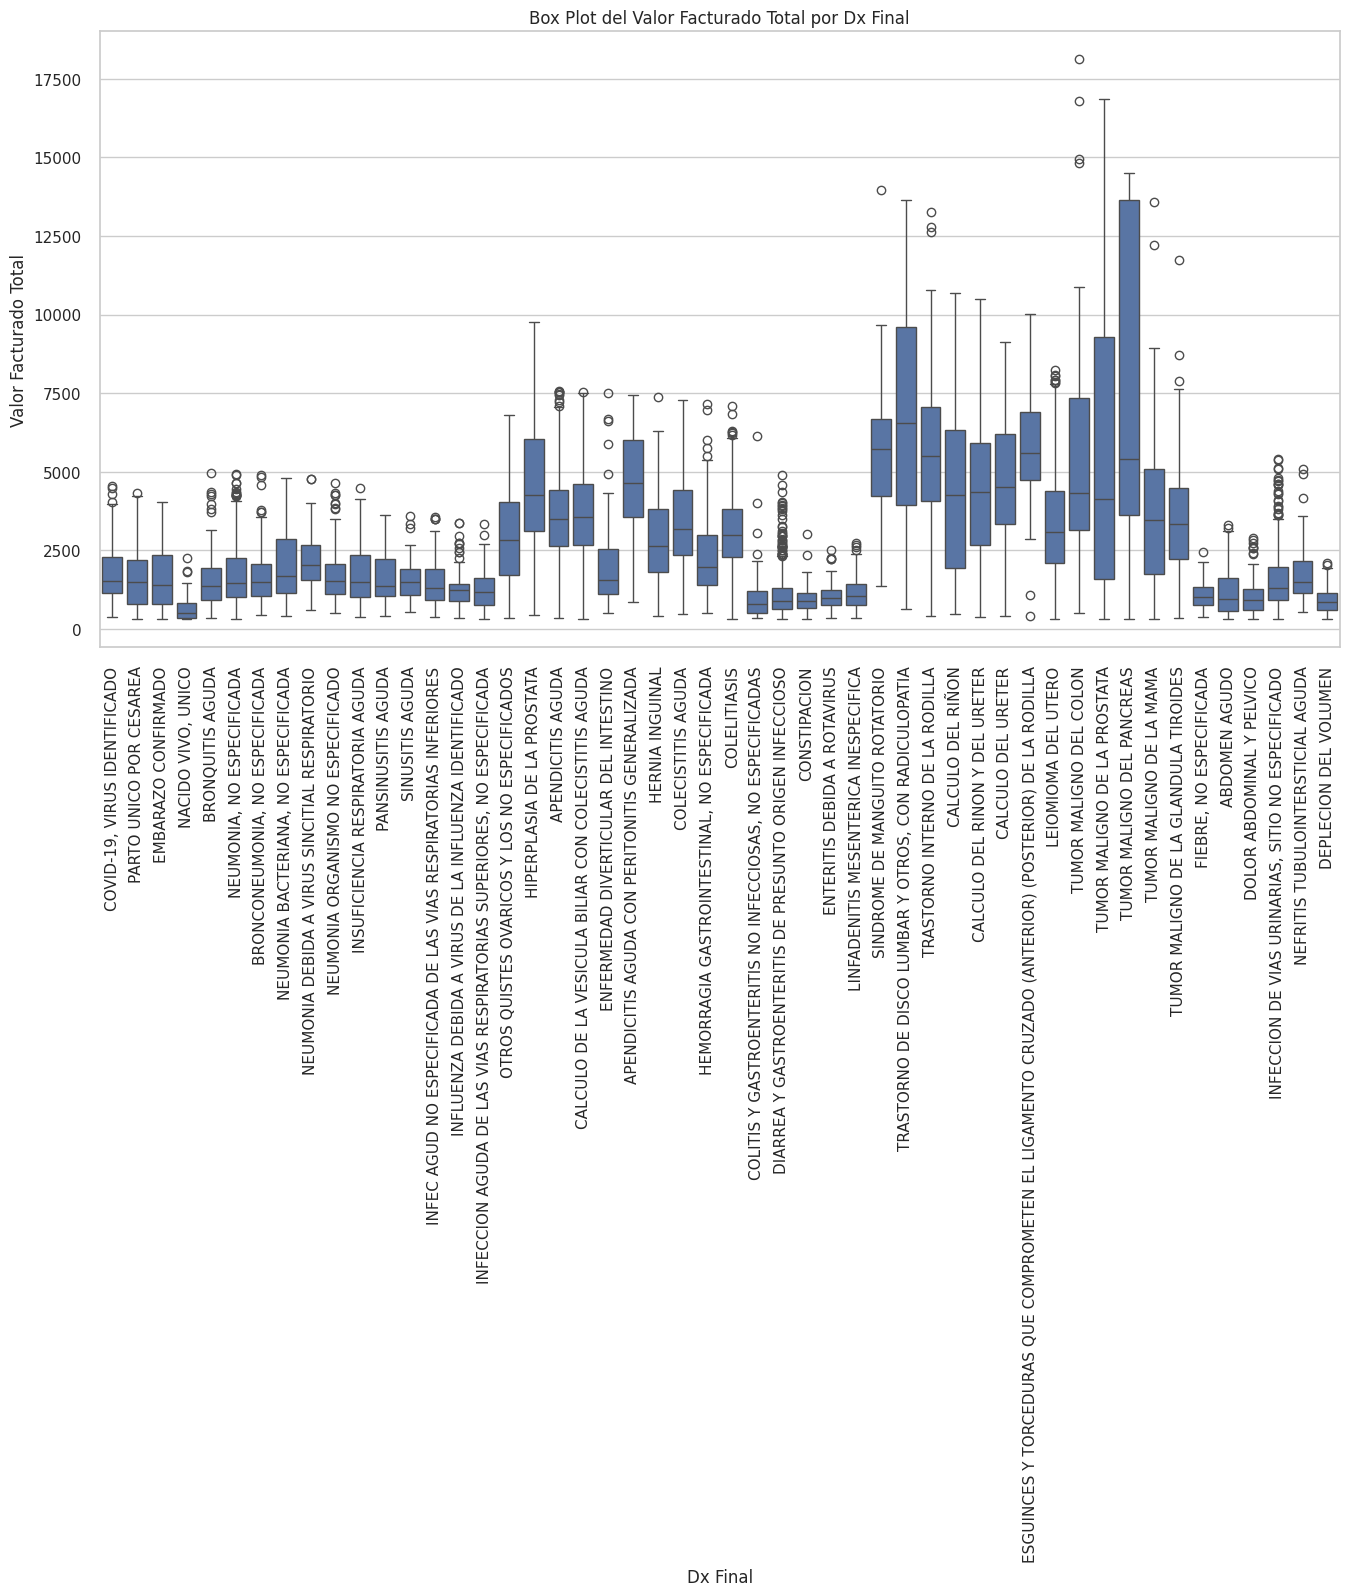

In [166]:

# Crear un box plot del 'Valor facturado total' por 'Dx Final'
plt.figure(figsize=(16, 8))
sns.boxplot(x='Dx Final', y='Valor facturado total', data=df_top_50)

# Ajustar la visualización para que se vea mejor
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.title('Box Plot del Valor Facturado Total por Dx Final')
plt.xlabel('Dx Final')
plt.ylabel('Valor Facturado Total')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**Eliminamos Outliers por Dx**

In [167]:

def eliminar_atipicos(grupo):
    # Calcular Q1 (percentil 25) y Q3 (percentil 75)
    Q1 = grupo['Valor facturado total'].quantile(0.25)
    Q3 = grupo['Valor facturado total'].quantile(0.75)

    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Calcular los límites superior e inferior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar los valores que no son atípicos
    return grupo[(grupo['Valor facturado total'] >= limite_inferior) & (grupo['Valor facturado total'] <= limite_superior)]

# Aplicar la función de eliminación de atípicos a cada grupo de 'Dx Final'
df_top = df_top_50.groupby('Dx Final').apply(eliminar_atipicos).reset_index(drop=True)

# Mostrar el DataFrame sin atípicos
print("DataFrame sin atípicos por 'Dx Final':")
df_top.head()

# Verificar el número de registros en el nuevo DataFrame
print("\nNúmero de registros en el nuevo DataFrame:", len(df_top))


DataFrame sin atípicos por 'Dx Final':

Número de registros en el nuevo DataFrame: 7314


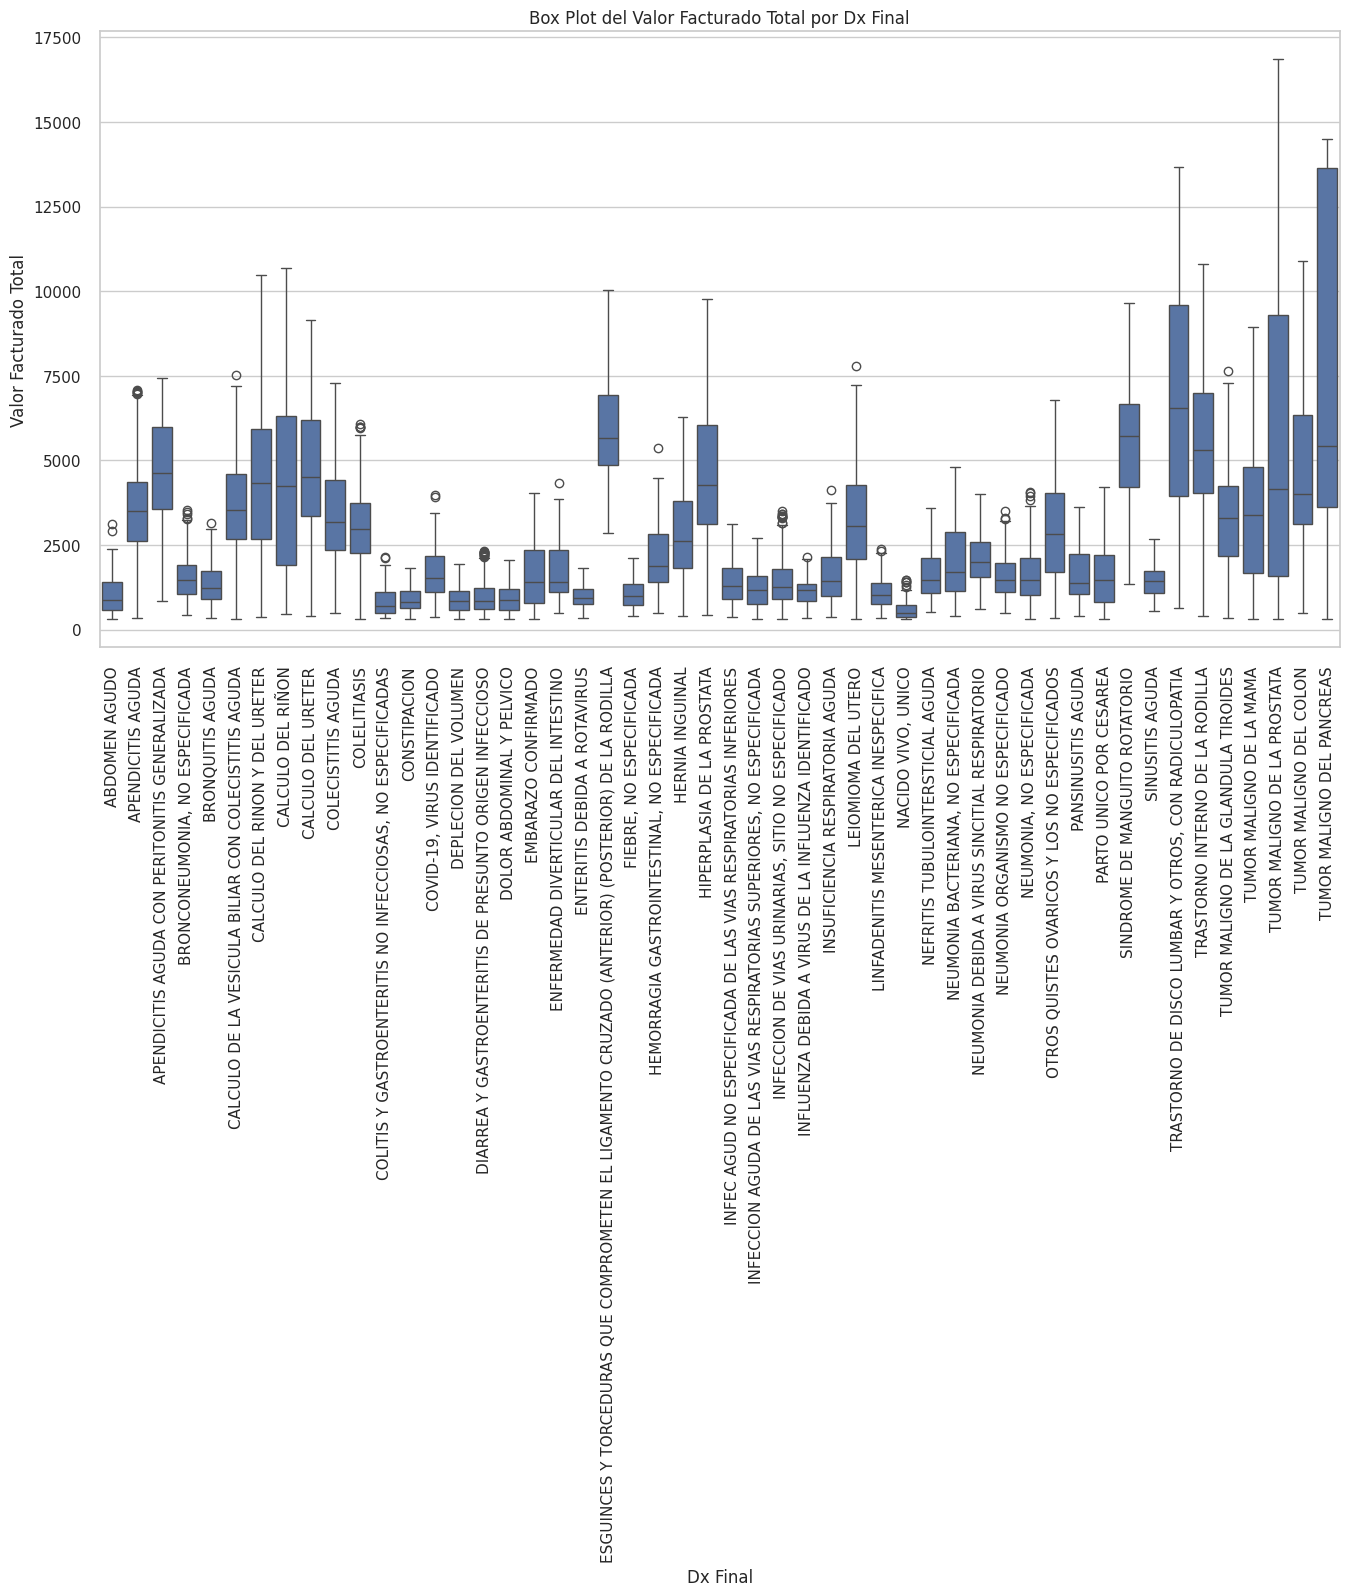

In [168]:
# Crear un box plot del 'Valor facturado total' por 'Dx Final'
plt.figure(figsize=(16, 8))
sns.boxplot(x='Dx Final', y='Valor facturado total', data=df_top)

# Ajustar la visualización para que se vea mejor
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.title('Box Plot del Valor Facturado Total por Dx Final')
plt.xlabel('Dx Final')
plt.ylabel('Valor Facturado Total')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Codificamos las variables categóricas**



In [169]:
import pandas as pd

# Supongamos que df_top es tu DataFrame original
# Cargar tu DataFrame (reemplaza esta línea con la carga de tu DataFrame real)
# df_top = pd.read_csv('ruta_a_tu_archivo.csv')  # Ejemplo de carga de datos

# Diccionarios de codificación
ordinal_encode = {
    'Preexistencia': {'No': 0, 'Si': 1},
    'EmergenciaVital': {'No': 0, 'Si': 1},
    'Terapia Intensiva': {'No': 0, 'si': 1},  # Considera la variación en minúsculas
    'Con convenio': {'No': 0, 'Si': 1}
}

specific_encoding = {
    'Grupo Etario': {
        '0 - 2 Años': 0,
        '2 - 17 Años': 1,
        '18 - 23 Años': 2,
        '24 - 31 Años': 3,
        '32 - 49 Años': 4,
        '50 - 60 Años': 5,
        '61 - 65 Años': 6,
        '66 - 70 Años': 7,
        '70 - + Años': 8
    },
    'Antigüedad Clase': {
        '0 a 6 meses': 0,
        '7 a 12 meses': 1,
        '13 a 24 meses': 2,
        '25 a 36 meses': 3,
        'más de 36 meses': 4
    },
    'Severidad': {
        'Muy Baja': 0,
        'Baja': 1,
        'Media': 2,
        'Alta': 3
    },
    'Tipo tratamiento': {
        'AGUDO': 0,
        'CRÓNICO TTO CONTINUO': 1,
        'CRÓNICO': 2,
        'OTROS': 3
    },
    'Producto': {
        'INDIVIDUAL': 1,
        'Otros': 0
    },
    'Tipo transaccion': {
        'Crédito': 1,
        'Reembolso': 0
    },
    'Tipo procedimiento': {
        'CLINICO': 0,
        'QUIRURGICO': 1
    },
    'Provincia prestador principal': {
        'Guayas': 0,
        'Pichincha': 1,
        'Otros': 2
    },
    'Provincia Cliente': {
        'Guayas': 0,
        'Pichincha': 1,
        'Otros': 2
    },
    'Genero': {
        'Femenino': 0,
        'Masculino': 1
    },
    'Canal Venta': {
        'FUERZA VENTAS': 1,
        'OTROS': 0
    },
    'Tipo prestador principal': {
        'Hospital': 1,
        'Otros': 0
    }
}

# Crear df3 copiando df_top
df3 = df_top.copy()

# Aplicar codificación binaria
for column, mapping in ordinal_encode.items():
    if column in df3.columns:
        df3[column] = df3[column].map(mapping)

# Aplicar codificación específica
for column, mapping in specific_encoding.items():
    if column in df3.columns:
        df3[column] = df3[column].map(mapping)

# Target encode para las variables con muchas clases
# Variables a aplicar target encoding
variables_target_encoding = ['Dx Final', 'Dx Primario', 'Familia dx relacionados', 'Agrupacion Dx relacionados']

# Aplicar target encoding a cada variable en la lista
for var in variables_target_encoding:
    mean_target_encoding = df3.groupby(var)['Valor facturado total'].mean()
    df3[var] = df3[var].map(mean_target_encoding)

# Eliminar columnas específicas
columns_to_drop = [
    'Fecha Incurrencia',
    'Fecha inicio vigencia',
    'Antigüedad cliente meses',
    'Edad Paciente',
    'Provincia Cliente',
    'Tipo prestador principal',
    'Año-Mes',
    'Valor cubierto total',
    'Valor pagado total'
]
df3.drop(columns=columns_to_drop, inplace=True)

# Mostrar las primeras filas del DataFrame resultante
df3.head()


Grupo Etario  Genero  Producto  Con convenio  \
0             8       1         1             1   
1             4       0         1             1   
2             4       1         1             1   
3             2       1         1             1   
4             1       1         1             1   

   Provincia prestador principal  Dias hospitalizacion  Nivel contrato  \
0                              0                     4               7   
1                              1                     2               3   
2                              1                     1               3   
3                              0                     5               4   
4                              2                     4               3   

   Canal Venta  Severidad  Dx Primario  ...  Valor facturado total  \
0            1          1  1020.013889  ...                3104.97   
1            1          1  1020.013889  ...                2926.25   
2            1          1  1020.013889  ...                2371.67   
3            0          1  1020.013889  ...                2298.62   
4            1          1  1020.013889  ...                2276.78   

   Antigüedad Clase  APLICA_PROTESIS  APLICA_HONORARIOS MEDICOS  \
0                 4                0                          0   
1                 2                0                          1   
2                 1                0                          1   
3                 4                0                          1   
4                 4                0                          1   

   APLICA_INSUMOS Y SUMINISTROS  APLICA_LABORATORIOS  APLICA_MEDICINAS  \
0                             1                    0                 0   
1                             1                    1                 1   
2                             1                    1                 1   
3                             1                    1                 1   
4                             1                    1                 1   

   APLICA_OTROS  APLICA_SERVICIOS HOSPITALARIOS  APLICA_TERAPIA INTENSIVA  
0             0                               0                         0  
1             0                               1                         0  
2             0                               1                         0  
3             0                               1                         0  
4             0                               1                         0  

[5 rows x 37 columns]

In [170]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7314 entries, 0 to 7313
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Grupo Etario                    7314 non-null   int64  
 1   Genero                          7314 non-null   int64  
 2   Producto                        7314 non-null   int64  
 3   Con convenio                    7314 non-null   int64  
 4   Provincia prestador principal   7314 non-null   int64  
 5   Dias hospitalizacion            7314 non-null   int64  
 6   Nivel contrato                  7314 non-null   int64  
 7   Canal Venta                     7314 non-null   int64  
 8   Severidad                       7314 non-null   int64  
 9   Dx Primario                     7314 non-null   float64
 10  Dx Final                        7314 non-null   float64
 11  Familia dx relacionados         7314 non-null   float64
 12  Agrupacion Dx relacionados      73

**Corremos el modelo**

Métricas para Modelo6:
Entrenamiento:
  MSE: 1.38e+06
  RMSE: 1173.40
  MAE: 747.24
  R^2: 0.6570
Prueba:
  MSE: 1.44e+06
  RMSE: 1201.89
  MAE: 753.28
  R^2: 0.6573


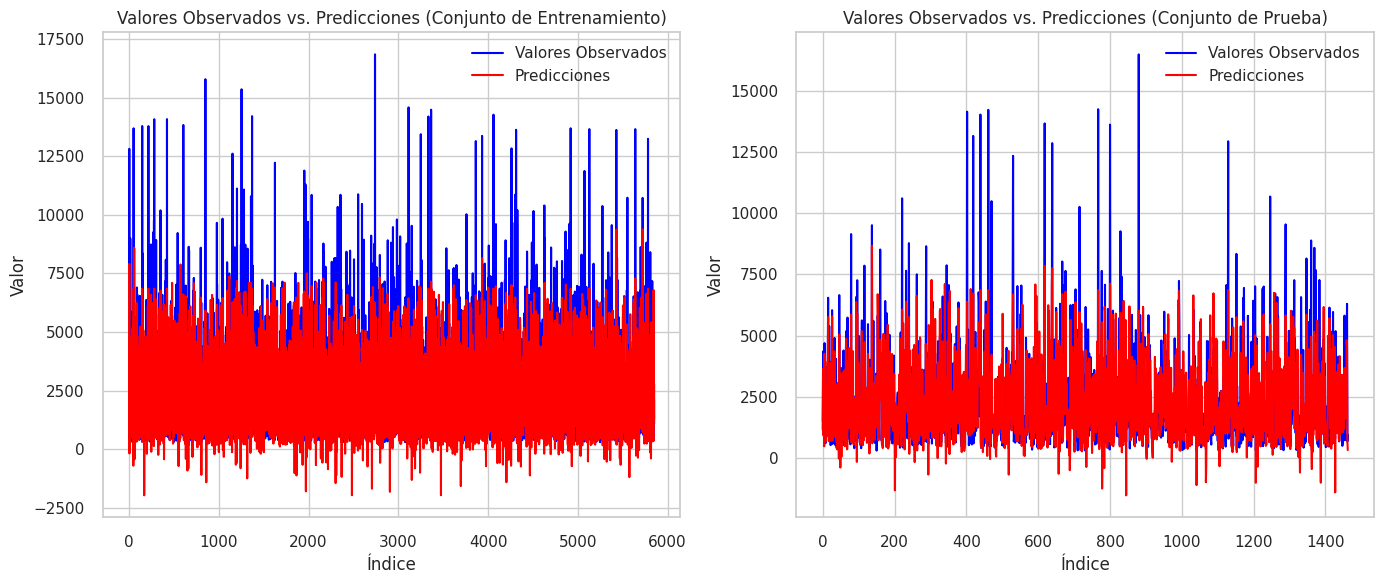

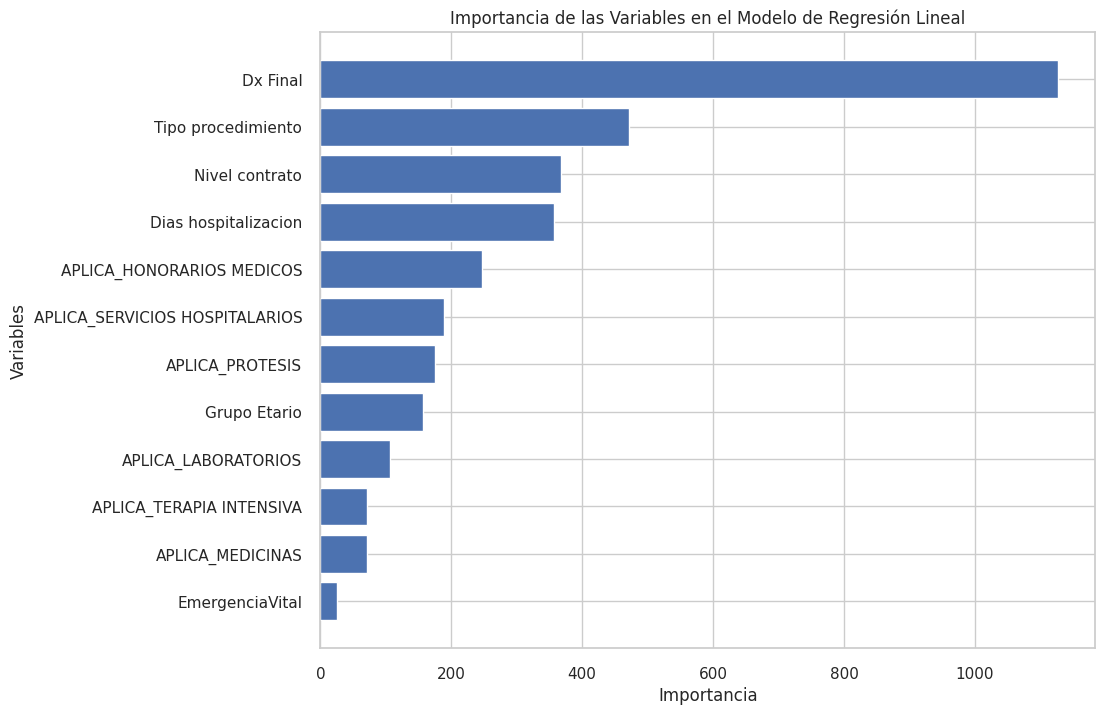

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir las variables a incluir como predictores
variables_incluir = [
    'Dx Final', 'Dias hospitalizacion', 'Nivel contrato', 'Grupo Etario',
    'APLICA_SERVICIOS HOSPITALARIOS', 'APLICA_HONORARIOS MEDICOS', 'APLICA_PROTESIS','APLICA_TERAPIA INTENSIVA','APLICA_MEDICINAS','APLICA_LABORATORIOS',
    'Tipo procedimiento', 'EmergenciaVital'
]

# Separar los predictores y la variable objetivo
X = df3[variables_incluir]
y = df3['Valor facturado total']

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=123)

# Inicializar el modelo de regresión lineal para Modelo6
Modelo6 = LinearRegression()

# Entrenar el modelo
Modelo6.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba
predicciones_train_Modelo6 = Modelo6.predict(X_train)
predicciones_test_Modelo6 = Modelo6.predict(X_test)

# Calcular métricas de evaluación
MSE_train_Modelo6 = mean_squared_error(y_train, predicciones_train_Modelo6)
MSE_test_Modelo6 = mean_squared_error(y_test, predicciones_test_Modelo6)

RMSE_train_Modelo6 = np.sqrt(MSE_train_Modelo6)
RMSE_test_Modelo6 = np.sqrt(MSE_test_Modelo6)

MAE_train_Modelo6 = mean_absolute_error(y_train, predicciones_train_Modelo6)
MAE_test_Modelo6 = mean_absolute_error(y_test, predicciones_test_Modelo6)

r_square_train_Modelo6 = r2_score(y_train, predicciones_train_Modelo6)
r_square_test_Modelo6 = r2_score(y_test, predicciones_test_Modelo6)

# Mostrar las métricas para Modelo6
print("Métricas para Modelo6:")
print(f"Entrenamiento:")
print(f"  MSE: {MSE_train_Modelo6:.2e}")
print(f"  RMSE: {RMSE_train_Modelo6:.2f}")
print(f"  MAE: {MAE_train_Modelo6:.2f}")
print(f"  R^2: {r_square_train_Modelo6:.4f}")

print(f"Prueba:")
print(f"  MSE: {MSE_test_Modelo6:.2e}")
print(f"  RMSE: {RMSE_test_Modelo6:.2f}")
print(f"  MAE: {MAE_test_Modelo6:.2f}")
print(f"  R^2: {r_square_test_Modelo6:.4f}")

# Visualizar predicciones vs. observaciones en los conjuntos de entrenamiento y prueba
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(y_train.values, label='Valores Observados', color='blue')
ax1.plot(predicciones_train_Modelo6, label='Predicciones', color='red')
ax1.set_title('Valores Observados vs. Predicciones (Conjunto de Entrenamiento)')
ax1.legend()
ax1.set_xlabel('Índice')
ax1.set_ylabel('Valor')

ax2.plot(y_test.values, label='Valores Observados', color='blue')
ax2.plot(predicciones_test_Modelo6, label='Predicciones', color='red')
ax2.set_title('Valores Observados vs. Predicciones (Conjunto de Prueba)')
ax2.legend()
ax2.set_xlabel('Índice')
ax2.set_ylabel('Valor')

plt.tight_layout()
plt.show()

# Crear gráfico de importancia de las variables
importancia_variables = np.abs(Modelo6.coef_)
features = X.columns

# Crear DataFrame para organizar los datos
df_importancia = pd.DataFrame({
    'Feature': features,
    'Importance': importancia_variables
})

# Ordenar por importancia
df_importancia = df_importancia.sort_values(by='Importance', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(df_importancia['Feature'], df_importancia['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las Variables en el Modelo de Regresión Lineal')
plt.gca().invert_yaxis()
plt.show()


Podemos observar que al aplicar un modelo al top de diagnósticos, y a pocas variables, tiene un rendimiento inferior.

### **ANALISIS DE MODELOS DE REGRESION CON PYCARET**

In [172]:
import numpy as np
import pandas as pd
from pycaret.regression import *

# Crear una copia del DataFrame original
df_model = dfmodel.copy()

# Definir las variables a excluir
variables_excluir = ['PROTESIS', 'HONORARIOS MEDICOS', 'INSUMOS Y SUMINISTROS',
                     'LABORATORIOS', 'MEDICINAS', 'OTROS', 'SERVICIOS HOSPITALARIOS', 'TERAPIA INTENSIVA', 'APLICA_OTROS',
                     'Dx Primario', 'Familia dx relacionados', 'Agrupacion Dx relacionados', 'Terapia Intensiva',
                     'Producto', 'Canal Venta', 'Preexistencia', 'Tipo transaccion', 'Genero', 'Antigüedad Clase', 'Con convenio']

# Excluir las variables no deseadas
df_model = df_model.drop(columns=variables_excluir)

# Configurar PyCaret
exp = setup(df_model, target='Valor facturado total', session_id=123)

# Comparar modelos y seleccionar el mejor
best_model = compare_models()

# Imprimir las métricas del mejor modelo
metrics = pull()



Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Seún esta librería PyCaret, los modelos de Light Gradient Boosting Machine y 	Gradient Boosting Regressor tienen un mejor rendimiento, se sugiere explorar más a fondo estas técnicas para mejorar el rendimiento a futuro